# INTRO

## Notebook for applying Data Assimilation on seasonal data (Lutetian reconstructions)

### Assemble data in the proxy domain using offline (block update) assimilation instead of point-by-point
### Assemble data in SST (D47), SAT (D47), SSS (d18Oc) and precipitation domain

Author: **N.J. de Winter** (*n.j.de.winter@vu.nl*)<br>
Assistant Professor Vrije Universiteit Amsterdam

**References used in coding**

*Data assimiliation*
- Steiger, N.J., Hakim, G.J., Steig, E.J., Battisti, D.S., Roe, G.H., 2014. Assimilation of Time-Averaged Pseudoproxies for Climate Reconstruction. Journal of Climate 27, 426–441. https://doi.org/10.1175/JCLI-D-12-00693.1
- Hakim, G.J., Emile-Geay, J., Steig, E.J., Noone, D., Anderson, D.M., Tardif, R., Steiger, N., Perkins, W.A., 2016. The last millennium climate reanalysis project: Framework and first results. Journal of Geophysical Research: Atmospheres 121, 6745–6764. https://doi.org/10.1002/2016JD024751
- King, J., Tierney, J., Osman, M., Judd, E.J., Anchukaitis, K.J., 2023. DASH: a MATLAB toolbox for paleoclimate data assimilation. Geoscientific Model Development 16, 5653–5683. https://doi.org/10.5194/gmd-16-5653-2023
- Judd, E.J., Tierney, J.E., Lunt, D.J., Montañez, I.P., Huber, B.T., Wing, S.L., Valdes, P.J., 2024. A 485-million-year history of Earth’s surface temperature. Science 385, eadk3705. https://doi.org/10.1126/science.adk3705

*Data sources*
- Van Horebeek, N., de Winter, N. J., Baatsen, M., Ziegler, M., Speijer, R. P., Vellekoop, J.: A European Monsoon-like climate in a Warmhouse World, Nature Communications, *in review*, 2025.
- Baatsen, M., von der Heydt, A.S., Huber, M., Kliphuis, M.A., Bijl, P.K., Sluijs, A., Dijkstra, H.A., 2020. The middle to late Eocene greenhouse climate modelled using the CESM 1.0.5. Climate of the Past 16, 2573–2597. https://doi.org/10.5194/cp-16-2573-2020

*Calibration equations*
- Harwood, A. J. P., Dennis, P. F., Marca, A. D., Pilling, G. M., and Millner, R. S.: The oxygen isotope composition of water masses within the North Sea, Estuarine, Coastal and Shelf Science, 78, 353–359, https://doi.org/10.1016/j.ecss.2007.12.010, 2008.
- Daëron, M. and Vermeesch, P.: Omnivariant generalized least squares regression: Theory, geochronological applications, and making the case for reconciled Δ47 calibrations, Chemical Geology, 121881, https://doi.org/10.1016/j.chemgeo.2023.121881, 2023.
- Grossman, E. L. and Ku, T.-L.: Oxygen and carbon isotope fractionation in biogenic aragonite: temperature effects, Chemical Geology: Isotope Geoscience section, 59, 59–74, 1986.
- Gonfiantini, R., Stichler, W., and Rozanski, K.: Standards and intercomparison materials distributed by the International Atomic Energy Agency for stable isotope measurements, 1995.
- Dettman, D. L., Reische, A. K., and Lohmann, K. C.: Controls on the stable isotope composition of seasonal growth bands in aragonitic fresh-water bivalves (Unionidae), Geochimica et Cosmochimica Acta, 63, 1049–1057, 1999.

## Load packages

In [1]:
# Load packages
import numpy as np # The 'numpy' package is needed for matrix operations and calculations
import pandas as pd # The 'pandas' package helps us to import and manage data
import math as math # Math package for data cleaning
from scipy import stats # Import scipy.package for confidence intervals
from sklearn.preprocessing import StandardScaler # Import the package for standardizing data
import D47calib as D47c # Import the package for treating clumped isotope data by Daëron and Vermeesch (2023; https://github.com/mdaeron/D47calib)
import matplotlib.pyplot as plt # The 'matplotlib' package contains tools needed to plot our data and results
import seaborn as sns # The 'seaborn' package is used to make our plots look nicer (e.g. enable heatmaps)
import warnings # The 'warnings' package is used to suppress warnings that might occur during the calculations
%matplotlib inline

# PRIOR - MONTHLY
## Load monthly SAT model data

In [2]:
# Load model SAT data as prior and show data structure
Lutetian_CESM_4PIC_SAT = pd.read_csv('Lutetian case/CESM_4PIC_SAT_Individual_values.csv') # Load the data from CESM model with 4x pre-industrial CO2 into Python and in the Jupyter environment.
print(Lutetian_CESM_4PIC_SAT.head())
Lutetian_CESM_2PIC_SAT = pd.read_csv('Lutetian case/CESM_2PIC_SAT_Individual_values.csv') # Load the data from CESM model with 2x pre-industrial CO2 into Python and in the Jupyter environment.
print(Lutetian_CESM_2PIC_SAT.head())

   Month  Temperature
0      1    11.282648
1      1    21.823206
2      1    21.909296
3      1    22.503198
4      1    21.393762
   Month  Temperature
0      1     8.079706
1      1    18.723108
2      1    18.902612
3      1    19.552850
4      1    18.329370


## Load monthly SST model data

In [3]:
# Load model SST data as prior and show data structure
Lutetian_CESM_4PIC_SST = pd.read_csv('Lutetian case/CESM_4PIC_SST_Individual_values.csv') # Load the data from CESM model with 4x pre-industrial CO2 into Python and in the Jupyter environment.
print(Lutetian_CESM_4PIC_SST.head())
Lutetian_CESM_2PIC_SST = pd.read_csv('Lutetian case/CESM_2PIC_SST_Individual_values.csv') # Load the data from CESM model with 2x pre-industrial CO2 into Python and in the Jupyter environment.
print(Lutetian_CESM_2PIC_SST.head())

   Month        SST
0      1  25.653111
1      1  25.308791
2      1  24.928478
3      1  18.123590
4      1  18.129648
   Month        SST
0      1  22.904200
1      1  22.584154
2      1  22.211651
3      1  14.667439
4      1  14.675111


## Load monthly SSS model data

In [4]:
# Load model SSS data as prior and show data structure
Lutetian_CESM_4PIC_SSS = pd.read_csv('Lutetian case/CESM_4PIC_SSS_Individual_values.csv') # Load the data from CESM model with 4x pre-industrial CO2 into Python and in the Jupyter environment.
print(Lutetian_CESM_4PIC_SSS.head())
Lutetian_CESM_2PIC_SSS = pd.read_csv('Lutetian case/CESM_2PIC_SSS_Individual_values.csv') # Load the data from CESM model with 2x pre-industrial CO2 into Python and in the Jupyter environment.
print(Lutetian_CESM_2PIC_SSS.head())

   Month        SSS
0      1  35.445849
1      1  35.447266
2      1  35.370330
3      1  27.677744
4      1  27.647815
   Month        SSS
0      1  35.611739
1      1  35.605736
2      1  35.525519
3      1  28.101734
4      1  28.084953


## Load monthly precipitation model data

In [5]:
# Load model precipitation data as prior and show data structure
Lutetian_CESM_4PIC_prec = pd.read_csv('Lutetian case/CESM_4PIC_Precipitation_Individual_values.csv') # Load the data from CESM model with 4x pre-industrial CO2 into Python and in the Jupyter environment.
print(Lutetian_CESM_4PIC_prec.head())
Lutetian_CESM_2PIC_prec = pd.read_csv('Lutetian case/CESM_2PIC_Precipitation_Individual_values.csv') # Load the data from CESM model with 2x pre-industrial CO2 into Python and in the Jupyter environment.
print(Lutetian_CESM_2PIC_prec.head())

   Month  Precipitation
0      1       0.352807
1      1       0.114865
2      1       0.225590
3      1       0.224708
4      1       0.214614
   Month  Precipitation
0      1       0.409879
1      1       0.126338
2      1       0.220611
3      1       0.221189
4      1       0.202024


### Combine climate data by modelname

In [6]:
# For CESM model with 4x pre-industrial CO2, combine the datasets of SAT, SST, SSS and prec into one dataset for further analysis

# Add a column to number the rows within each month consecutively
Lutetian_CESM_4PIC_SAT['Cell'] = Lutetian_CESM_4PIC_SAT.groupby('Month').cumcount() + 1
Lutetian_CESM_4PIC_SST['Cell'] = Lutetian_CESM_4PIC_SST.groupby('Month').cumcount() + 1
Lutetian_CESM_4PIC_SSS['Cell'] = Lutetian_CESM_4PIC_SSS.groupby('Month').cumcount() + 1
Lutetian_CESM_4PIC_prec['Cell'] = Lutetian_CESM_4PIC_prec.groupby('Month').cumcount() + 1

# Pivot the datasets to create separate columns for each month with 2-letter abbreviations
month_abbreviations = ['ja', 'fb', 'mr', 'ar', 'my', 'jn', 'jl', 'ag', 'sp', 'ot', 'nv', 'dc']
Lutetian_CESM_4PIC_SAT_wide = Lutetian_CESM_4PIC_SAT.pivot(index='Cell', columns='Month', values='Temperature')
Lutetian_CESM_4PIC_SAT_wide.columns = [month_abbreviations[col - 1] for col in Lutetian_CESM_4PIC_SAT_wide.columns]
Lutetian_CESM_4PIC_SST_wide = Lutetian_CESM_4PIC_SST.pivot(index='Cell', columns='Month', values='SST')
Lutetian_CESM_4PIC_SST_wide.columns = [month_abbreviations[col - 1] for col in Lutetian_CESM_4PIC_SST_wide.columns]
Lutetian_CESM_4PIC_SSS_wide = Lutetian_CESM_4PIC_SSS.pivot(index='Cell', columns='Month', values='SSS')
Lutetian_CESM_4PIC_SSS_wide.columns = [month_abbreviations[col - 1] for col in Lutetian_CESM_4PIC_SSS_wide.columns]
Lutetian_CESM_4PIC_prec_wide = Lutetian_CESM_4PIC_prec.pivot(index='Cell', columns='Month', values='Precipitation')
Lutetian_CESM_4PIC_prec_wide.columns = [month_abbreviations[col - 1] for col in Lutetian_CESM_4PIC_prec_wide.columns]

# Reset the index to make 'Cell' a column again
Lutetian_CESM_4PIC_SAT_wide.reset_index(inplace = True)
Lutetian_CESM_4PIC_SST_wide.reset_index(inplace = True)
Lutetian_CESM_4PIC_SSS_wide.reset_index(inplace = True)
Lutetian_CESM_4PIC_prec_wide.reset_index(inplace = True)

# Merge the datasets of SAT, SST, SSS and prec, force suffixes to be added to the column names
# Merge in two steps to circumvent different numbers of cells due to differing spatial resolution in air and ocean models
Lutetian_CESM_4PIC_model = pd.merge(
    # Merge SAT and prec data
    pd.merge(
        Lutetian_CESM_4PIC_SAT_wide.rename(columns = {c: c+'_SAT' for c in Lutetian_CESM_4PIC_SAT_wide.columns if c != 'Cell'}),
        Lutetian_CESM_4PIC_prec_wide.rename(columns = {c: c+'_precip' for c in Lutetian_CESM_4PIC_prec_wide.columns if c != 'Cell'}),
        on = 'Cell',
        how = 'outer'
    ),
    # Merge SST and SSS data
    pd.merge(
        Lutetian_CESM_4PIC_SST_wide.rename(columns = {c: c+'_SST' for c in Lutetian_CESM_4PIC_SST_wide.columns if c != 'Cell'}),
        Lutetian_CESM_4PIC_SSS_wide.rename(columns = {c: c+'_SSS' for c in Lutetian_CESM_4PIC_SSS_wide.columns if c != 'Cell'}),
        on = 'Cell',
        how = 'outer'
    ),
    on = 'Cell',
    how = 'outer'
)

# Display the combined dataset
print("CESM 4x pre-industrial CO2 combined dataset:")
print(Lutetian_CESM_4PIC_model.head())

# For CESM model with 2x pre-industrial CO2, combine the datasets of SAT, SST, SSS and prec into one dataset for further analysis

# Add a column to number the rows within each month consecutively
Lutetian_CESM_2PIC_SAT['Cell'] = Lutetian_CESM_2PIC_SAT.groupby('Month').cumcount() + 1
Lutetian_CESM_2PIC_SST['Cell'] = Lutetian_CESM_2PIC_SST.groupby('Month').cumcount() + 1
Lutetian_CESM_2PIC_SSS['Cell'] = Lutetian_CESM_2PIC_SSS.groupby('Month').cumcount() + 1
Lutetian_CESM_2PIC_prec['Cell'] = Lutetian_CESM_2PIC_prec.groupby('Month').cumcount() + 1

# Pivot the datasets to create separate columns for each month with 2-letter abbreviations
Lutetian_CESM_2PIC_SAT_wide = Lutetian_CESM_2PIC_SAT.pivot(index='Cell', columns='Month', values='Temperature')
Lutetian_CESM_2PIC_SAT_wide.columns = [month_abbreviations[col - 1] for col in Lutetian_CESM_2PIC_SAT_wide.columns]
Lutetian_CESM_2PIC_SST_wide = Lutetian_CESM_2PIC_SST.pivot(index='Cell', columns='Month', values='SST')
Lutetian_CESM_2PIC_SST_wide.columns = [month_abbreviations[col - 1] for col in Lutetian_CESM_2PIC_SST_wide.columns]
Lutetian_CESM_2PIC_SSS_wide = Lutetian_CESM_2PIC_SSS.pivot(index='Cell', columns='Month', values='SSS')
Lutetian_CESM_2PIC_SSS_wide.columns = [month_abbreviations[col - 1] for col in Lutetian_CESM_2PIC_SSS_wide.columns]
Lutetian_CESM_2PIC_prec_wide = Lutetian_CESM_2PIC_prec.pivot(index='Cell', columns='Month', values='Precipitation')
Lutetian_CESM_2PIC_prec_wide.columns = [month_abbreviations[col - 1] for col in Lutetian_CESM_2PIC_prec_wide.columns]

# Reset the index to make 'Cell' a column again
Lutetian_CESM_2PIC_SAT_wide.reset_index(inplace = True)
Lutetian_CESM_2PIC_SST_wide.reset_index(inplace = True)
Lutetian_CESM_2PIC_SSS_wide.reset_index(inplace = True)
Lutetian_CESM_2PIC_prec_wide.reset_index(inplace = True)

# Merge the datasets of SAT, SST, SSS and prec, force suffixes to be added to the column names
# Merge in two steps to circumvent different numbers of cells due to differing spatial resolution in air and ocean models
Lutetian_CESM_2PIC_model = pd.merge(
    # Merge SAT and prec data
    pd.merge(
        Lutetian_CESM_2PIC_SAT_wide.rename(columns = {c: c+'_SAT' for c in Lutetian_CESM_2PIC_SAT_wide.columns if c != 'Cell'}),
        Lutetian_CESM_2PIC_prec_wide.rename(columns = {c: c+'_precip' for c in Lutetian_CESM_2PIC_prec_wide.columns if c != 'Cell'}),
        on = 'Cell',
        how = 'outer'
    ),
    # Merge SST and SSS data
    pd.merge(
        Lutetian_CESM_2PIC_SST_wide.rename(columns = {c: c+'_SST' for c in Lutetian_CESM_2PIC_SST_wide.columns if c != 'Cell'}),
        Lutetian_CESM_2PIC_SSS_wide.rename(columns = {c: c+'_SSS' for c in Lutetian_CESM_2PIC_SSS_wide.columns if c != 'Cell'}),
        on = 'Cell',
        how = 'outer'
    ),
    on = 'Cell',
    how = 'outer'
)

# Display the combined dataset
print("CESM 2x pre-industrial CO2 combined dataset:")
print(Lutetian_CESM_2PIC_model.head())

CESM 4x pre-industrial CO2 combined dataset:
   Cell     ja_SAT     fb_SAT     mr_SAT     ar_SAT     my_SAT     jn_SAT  \
0     1  11.282648  12.089380  13.829187  16.709039  22.411493  27.940820   
1     2  21.823206  22.185327  23.480707  25.735864  30.242242  35.107660   
2     3  21.909296  22.198022  23.222040  25.234583  29.434015  34.056543   
3     4  22.503198  22.530481  23.346246  25.152704  28.970605  33.480951   
4     5  21.393762  21.576868  22.996118  25.669275  30.826440  36.038263   

      jl_SAT     ag_SAT     sp_SAT  ...     mr_SSS     ar_SSS     my_SSS  \
0  30.968195  31.072290  26.694391  ...  35.461410  35.476315  35.502321   
1  38.680688  39.036523  35.629755  ...  35.474837  35.491815  35.518168   
2  38.089227  38.691492  35.554956  ...  35.391840  35.407201  35.434341   
3  37.780298  38.492792  35.470605  ...  27.740462  27.669306  27.565980   
4  40.872888  40.882013  36.701257  ...  27.695703  27.609018  27.476092   

      jn_SSS     jl_SSS     ag_SSS 

## Calculate the monthly prior for model SST, SAT, SSS and precipitation values

In [7]:
# Create list of month names
months = ['ja', 'fb', 'mr', 'ar', 'my', 'jn', 'jl', 'ag', 'sp', 'ot', 'nv', 'dc']

# Start by calculating prior means and covariances for CESM model with 4x pre-industrial CO2

# Prior SST, SAT, SSS & precipitation estimates from climate models (mean)
mu_prior_CESM_4PIC_SAT_monthly = np.array(Lutetian_CESM_4PIC_model[[f"{month}_SAT" for month in months]].mean(axis=0, skipna=True))
mu_prior_CESM_4PIC_SST_monthly = np.array(Lutetian_CESM_4PIC_model[[f"{month}_SST" for month in months]].mean(axis=0, skipna=True))
mu_prior_CESM_4PIC_SSS_monthly = np.array(Lutetian_CESM_4PIC_model[[f"{month}_SSS" for month in months]].mean(axis=0, skipna=True))
mu_prior_CESM_4PIC_precip_monthly = np.array(Lutetian_CESM_4PIC_model[[f"{month}_precip" for month in months]].mean(axis=0, skipna=True))

# Covariance between months in prior SST, SAT, SSS, and precip estimates from climate models (covariance matrix)
cov_prior_CESM_4PIC_SAT_monthly = np.cov(Lutetian_CESM_4PIC_model[[f"{month}_SAT" for month in months]].dropna(), rowvar=False)
cov_prior_CESM_4PIC_SST_monthly = np.cov(Lutetian_CESM_4PIC_model[[f"{month}_SST" for month in months]].dropna(), rowvar=False)
cov_prior_CESM_4PIC_SSS_monthly = np.cov(Lutetian_CESM_4PIC_model[[f"{month}_SSS" for month in months]].dropna(), rowvar=False)
cov_prior_CESM_4PIC_precip_monthly = np.cov(Lutetian_CESM_4PIC_model[[f"{month}_precip" for month in months]].dropna(), rowvar=False)

# Store copy of original prior means to keep when later updating the prior
mu_prior_CESM_4PIC_SAT_monthly_original, cov_prior_CESM_4PIC_SAT_monthly_original = mu_prior_CESM_4PIC_SAT_monthly.copy(), cov_prior_CESM_4PIC_SAT_monthly.copy()
mu_prior_CESM_4PIC_SST_monthly_original, cov_prior_CESM_4PIC_SST_monthly_original = mu_prior_CESM_4PIC_SST_monthly.copy(), cov_prior_CESM_4PIC_SST_monthly.copy()
mu_prior_CESM_4PIC_SSS_monthly_original, cov_prior_CESM_4PIC_SSS_monthly_original = mu_prior_CESM_4PIC_SSS_monthly.copy(), cov_prior_CESM_4PIC_SSS_monthly.copy()
mu_prior_CESM_4PIC_precip_monthly_original, cov_prior_CESM_4PIC_precip_monthly_original = mu_prior_CESM_4PIC_precip_monthly.copy(), cov_prior_CESM_4PIC_precip_monthly.copy()

# Extract the standard deviations (uncertainty) from the covariance matrix
std_prior_CESM_4PIC_SAT_monthly = np.sqrt(np.diag(cov_prior_CESM_4PIC_SAT_monthly))
std_prior_CESM_4PIC_SST_monthly = np.sqrt(np.diag(cov_prior_CESM_4PIC_SST_monthly))
std_prior_CESM_4PIC_SSS_monthly = np.sqrt(np.diag(cov_prior_CESM_4PIC_SSS_monthly))
std_prior_CESM_4PIC_precip_monthly = np.sqrt(np.diag(cov_prior_CESM_4PIC_precip_monthly))

print("CESM model with 4x pre-industrial CO2 prior means and standard deviations:")
print("SAT Monthly Means:", mu_prior_CESM_4PIC_SAT_monthly)
print("SAT Monthly Std Devs:", std_prior_CESM_4PIC_SAT_monthly)
print("SST Monthly Means:", mu_prior_CESM_4PIC_SST_monthly)
print("SST Monthly Std Devs:", std_prior_CESM_4PIC_SST_monthly)
print("SSS Monthly Means:", mu_prior_CESM_4PIC_SSS_monthly)
print("SSS Monthly Std Devs:", std_prior_CESM_4PIC_SSS_monthly)
print("Precip Monthly Means:", mu_prior_CESM_4PIC_precip_monthly)
print("Precip Monthly Std Devs:", std_prior_CESM_4PIC_precip_monthly)

# Now calculate prior means and covariances for CESM model with 2x pre-industrial CO2
# Prior SST, SAT, SSS & precipitation estimates from climate models (mean)
mu_prior_CESM_2PIC_SAT_monthly = np.array(Lutetian_CESM_2PIC_model[[f"{month}_SAT" for month in months]].mean(axis=0, skipna=True))
mu_prior_CESM_2PIC_SST_monthly = np.array(Lutetian_CESM_2PIC_model[[f"{month}_SST" for month in months]].mean(axis=0, skipna=True))
mu_prior_CESM_2PIC_SSS_monthly = np.array(Lutetian_CESM_2PIC_model[[f"{month}_SSS" for month in months]].mean(axis=0, skipna=True))
mu_prior_CESM_2PIC_precip_monthly = np.array(Lutetian_CESM_2PIC_model[[f"{month}_precip" for month in months]].mean(axis=0, skipna=True))

# Covariance between months in prior SST, SAT, SSS, and precip estimates from climate models (covariance matrix)
cov_prior_CESM_2PIC_SAT_monthly = np.cov(Lutetian_CESM_2PIC_model[[f"{month}_SAT" for month in months]].dropna(), rowvar=False)
cov_prior_CESM_2PIC_SST_monthly = np.cov(Lutetian_CESM_2PIC_model[[f"{month}_SST" for month in months]].dropna(), rowvar=False)
cov_prior_CESM_2PIC_SSS_monthly = np.cov(Lutetian_CESM_2PIC_model[[f"{month}_SSS" for month in months]].dropna(), rowvar=False)
cov_prior_CESM_2PIC_precip_monthly = np.cov(Lutetian_CESM_2PIC_model[[f"{month}_precip" for month in months]].dropna(), rowvar=False)

# Store copy of original prior means to keep when later updating the prior
mu_prior_CESM_2PIC_SAT_monthly_original, cov_prior_CESM_2PIC_SAT_monthly_original = mu_prior_CESM_2PIC_SAT_monthly.copy(), cov_prior_CESM_2PIC_SAT_monthly.copy()
mu_prior_CESM_2PIC_SST_monthly_original, cov_prior_CESM_2PIC_SST_monthly_original = mu_prior_CESM_2PIC_SST_monthly.copy(), cov_prior_CESM_2PIC_SST_monthly.copy()
mu_prior_CESM_2PIC_SSS_monthly_original, cov_prior_CESM_2PIC_SSS_monthly_original = mu_prior_CESM_2PIC_SSS_monthly.copy(), cov_prior_CESM_2PIC_SSS_monthly.copy()
mu_prior_CESM_2PIC_precip_monthly_original, cov_prior_CESM_2PIC_precip_monthly_original = mu_prior_CESM_2PIC_precip_monthly.copy(), cov_prior_CESM_2PIC_precip_monthly.copy()

# Extract the standard deviations (uncertainty) from the covariance matrix
std_prior_CESM_2PIC_SAT_monthly = np.sqrt(np.diag(cov_prior_CESM_2PIC_SAT_monthly))
std_prior_CESM_2PIC_SST_monthly = np.sqrt(np.diag(cov_prior_CESM_2PIC_SST_monthly))
std_prior_CESM_2PIC_SSS_monthly = np.sqrt(np.diag(cov_prior_CESM_2PIC_SSS_monthly))
std_prior_CESM_2PIC_precip_monthly = np.sqrt(np.diag(cov_prior_CESM_2PIC_precip_monthly))

print("---")
print("CESM model with 2x pre-industrial CO2 prior means and standard deviations:")
print("SAT Monthly Means:", mu_prior_CESM_2PIC_SAT_monthly)
print("SAT Monthly Std Devs:", std_prior_CESM_2PIC_SAT_monthly)
print("SST Monthly Means:", mu_prior_CESM_2PIC_SST_monthly)
print("SST Monthly Std Devs:", std_prior_CESM_2PIC_SST_monthly)
print("SSS Monthly Means:", mu_prior_CESM_2PIC_SSS_monthly)
print("SSS Monthly Std Devs:", std_prior_CESM_2PIC_SSS_monthly)
print("Precip Monthly Means:", mu_prior_CESM_2PIC_precip_monthly)
print("Precip Monthly Std Devs:", std_prior_CESM_2PIC_precip_monthly)

CESM model with 4x pre-industrial CO2 prior means and standard deviations:
SAT Monthly Means: [16.27954224 17.01156006 18.66868896 21.54889648 27.12244995 32.0811853
 35.76927734 35.78623779 32.02878784 25.72896606 20.42561768 17.17369751]
SAT Monthly Std Devs: [3.46377896 3.10594374 2.78918732 2.54271169 2.46488387 2.73331005
 2.85535749 2.646315   2.52596201 3.00791784 3.58824735 3.69933077]
SST Monthly Means: [23.86139364 23.17810472 23.14772474 23.92908666 26.57514352 30.58667586
 34.10417351 35.48879139 34.18526063 31.27739675 28.24302759 25.51228172]
SST Monthly Std Devs: [2.83903042 2.98635231 2.95864974 2.74006009 2.42216397 2.22547687
 2.02150675 1.9040936  1.73710814 1.64930877 2.07319756 2.54273385]
SSS Monthly Means: [34.48952147 34.48138433 34.46366809 34.44571124 34.43899317 34.43806975
 34.41677989 34.40664036 34.40840345 34.436755   34.46977234 34.49277948]
SSS Monthly Std Devs: [3.01539682 2.98680818 2.97232063 2.97675101 3.00281989 3.03418516
 3.0716477  3.107458   3.

## Plot the monthly priors for all model values

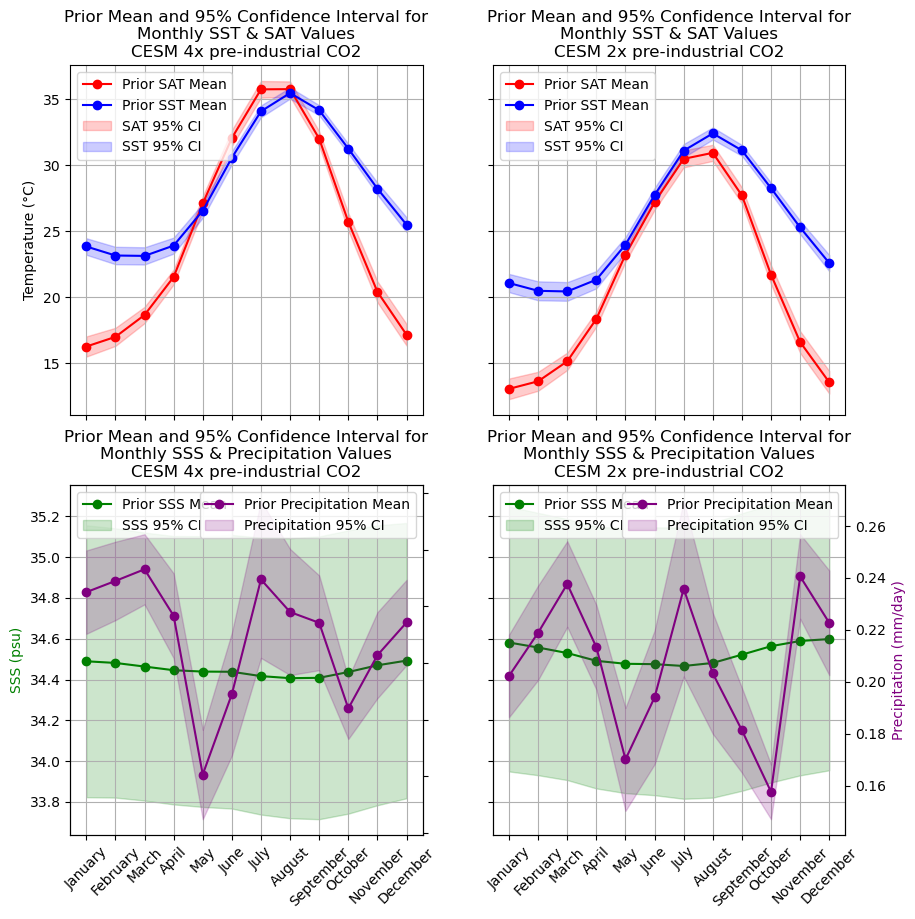

In [8]:
# Set dimensions of data
n_models_CESM_4PIC_monthly = len(Lutetian_CESM_4PIC_model["Cell"])  # Find the total number of models
n_models_CESM_2PIC_monthly = len(Lutetian_CESM_2PIC_model["Cell"])  # Find the total number of models

# Create a monthly scale for the x-axis
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']  # List full month names
months_scale = np.arange(len(months)) + 1  # Create monthly scale

# Create the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey="row")

# Panel 1: Plot the prior distribution for SST and SAT for CESM model with 4x pre-industrial CO2
axes[0, 0].plot(months_scale, mu_prior_CESM_4PIC_SAT_monthly, label='Prior SAT Mean', marker='o', color='r')
axes[0, 0].plot(months_scale, mu_prior_CESM_4PIC_SST_monthly, label='Prior SST Mean', marker='o', color='b')

# Add 95% confidence intervals for SAT
axes[0, 0].fill_between(
    months_scale,
    mu_prior_CESM_4PIC_SAT_monthly - stats.t.ppf(1 - 0.025, n_models_CESM_4PIC_monthly) * std_prior_CESM_4PIC_SAT_monthly / np.sqrt(n_models_CESM_4PIC_monthly),
    mu_prior_CESM_4PIC_SAT_monthly + stats.t.ppf(1 - 0.025, n_models_CESM_4PIC_monthly) * std_prior_CESM_4PIC_SAT_monthly / np.sqrt(n_models_CESM_4PIC_monthly),
    alpha=0.2, color='r', label='SAT 95% CI'
)

# Add 95% confidence intervals for SST
axes[0, 0].fill_between(
    months_scale,
    mu_prior_CESM_4PIC_SST_monthly - stats.t.ppf(1 - 0.025, n_models_CESM_4PIC_monthly) * std_prior_CESM_4PIC_SST_monthly / np.sqrt(n_models_CESM_4PIC_monthly),
    mu_prior_CESM_4PIC_SST_monthly + stats.t.ppf(1 - 0.025, n_models_CESM_4PIC_monthly) * std_prior_CESM_4PIC_SST_monthly / np.sqrt(n_models_CESM_4PIC_monthly),
    alpha=0.2, color='b', label='SST 95% CI'
)

# axes[0, 0].set_ylim(10, 40)  # Set lower limit of temperature y-axis to 15 and upper limit to 40
axes[0, 0].set_title('Prior Mean and 95% Confidence Interval for\nMonthly SST & SAT Values\nCESM 4x pre-industrial CO2')
axes[0, 0].set_ylabel('Temperature (°C)')
axes[0, 0].legend(loc = "upper left")
axes[0, 0].grid(True)

# Panel 2: Plot the prior distribution for SSS and precipitation for CESM model with 4x pre-industrial CO2
axes[1, 0].plot(months_scale, mu_prior_CESM_4PIC_SSS_monthly, label='Prior SSS Mean', marker='o', color='g')
ax2 = axes[1, 0].twinx()  # Create a secondary y-axis for precipitation
ax2.plot(months_scale, mu_prior_CESM_4PIC_precip_monthly, label='Prior Precipitation Mean', marker='o', color='purple')

# Add 95% confidence intervals for SSS
axes[1, 0].fill_between(
    months_scale,
    mu_prior_CESM_4PIC_SSS_monthly - stats.t.ppf(1 - 0.025, n_models_CESM_4PIC_monthly) * std_prior_CESM_4PIC_SSS_monthly / np.sqrt(n_models_CESM_4PIC_monthly),
    mu_prior_CESM_4PIC_SSS_monthly + stats.t.ppf(1 - 0.025, n_models_CESM_4PIC_monthly) * std_prior_CESM_4PIC_SSS_monthly / np.sqrt(n_models_CESM_4PIC_monthly),
    alpha=0.2, color='g', label='SSS 95% CI'
)

# Add 95% confidence intervals for precipitation
ax2.fill_between(
    months_scale,
    mu_prior_CESM_4PIC_precip_monthly - stats.t.ppf(1 - 0.025, n_models_CESM_4PIC_monthly) * std_prior_CESM_4PIC_precip_monthly / np.sqrt(n_models_CESM_4PIC_monthly),
    mu_prior_CESM_4PIC_precip_monthly + stats.t.ppf(1 - 0.025, n_models_CESM_4PIC_monthly) * std_prior_CESM_4PIC_precip_monthly / np.sqrt(n_models_CESM_4PIC_monthly),
    alpha=0.2, color='purple', label='Precipitation 95% CI'
)

axes[1, 0].set_ylabel('SSS (psu)', color='g')
# axes[1, 0].set_ylim(33.5, 36)  # Set lower limit of SSS y-axis to 33.5 and upper limit to 36
ax2.set_ylabel('')
# ax2.set_ylim(0, 0.3)  # Set lower limit of precipitation y-axis to 0 and upper limit to 0.3
ax2.set_yticklabels([]) # Hide y-tick labels for SSS to reduce clutter
axes[1, 0].set_title('Prior Mean and 95% Confidence Interval for\nMonthly SSS & Precipitation Values\nCESM 4x pre-industrial CO2')
axes[1, 0].legend(loc='upper left')
ax2.legend(loc='upper right')
axes[1, 0].grid(True)

# Panel 3: Plot the prior distribution for SST and SAT for CESM model with 2x pre-industrial CO2
axes[0, 1].plot(months_scale, mu_prior_CESM_2PIC_SAT_monthly, label='Prior SAT Mean', marker='o', color='r')
axes[0, 1].plot(months_scale, mu_prior_CESM_2PIC_SST_monthly, label='Prior SST Mean', marker='o', color='b')

# Add 95% confidence intervals for SAT
axes[0, 1].fill_between(
    months_scale,
    mu_prior_CESM_2PIC_SAT_monthly - stats.t.ppf(1 - 0.025, n_models_CESM_2PIC_monthly) * std_prior_CESM_2PIC_SAT_monthly / np.sqrt(n_models_CESM_2PIC_monthly),
    mu_prior_CESM_2PIC_SAT_monthly + stats.t.ppf(1 - 0.025, n_models_CESM_2PIC_monthly) * std_prior_CESM_2PIC_SAT_monthly / np.sqrt(n_models_CESM_2PIC_monthly),
    alpha=0.2, color='r', label='SAT 95% CI'
)

# Add 95% confidence intervals for SST
axes[0, 1].fill_between(
    months_scale,
    mu_prior_CESM_2PIC_SST_monthly - stats.t.ppf(1 - 0.025, n_models_CESM_2PIC_monthly) * std_prior_CESM_2PIC_SST_monthly / np.sqrt(n_models_CESM_2PIC_monthly),
    mu_prior_CESM_2PIC_SST_monthly + stats.t.ppf(1 - 0.025, n_models_CESM_2PIC_monthly) * std_prior_CESM_2PIC_SST_monthly / np.sqrt(n_models_CESM_2PIC_monthly),
    alpha=0.2, color='b', label='SST 95% CI'
)

# axes[0, 1].set_ylim(10, 40)  # Set lower limit of temperature y-axis to 15 and upper limit to 40
axes[0, 1].set_title('Prior Mean and 95% Confidence Interval for\nMonthly SST & SAT Values\nCESM 2x pre-industrial CO2')
axes[0, 1].set_ylabel('')
axes[0, 1].legend(loc = "upper left")
axes[0, 1].grid(True)

# Panel 4: Plot the prior distribution for SSS and precipitation for CESM model with 2x pre-industrial CO2
axes[1, 1].plot(months_scale, mu_prior_CESM_2PIC_SSS_monthly, label='Prior SSS Mean', marker='o', color='g')
ax4 = axes[1, 1].twinx() # Create a secondary y-axis for precipitation
ax4.plot(months_scale, mu_prior_CESM_2PIC_precip_monthly, label='Prior Precipitation Mean', marker='o', color='purple')

# Add 95% confidence intervals for SSS
axes[1, 1].fill_between(
    months_scale,
    mu_prior_CESM_2PIC_SSS_monthly - stats.t.ppf(1 - 0.025, n_models_CESM_2PIC_monthly) * std_prior_CESM_2PIC_SSS_monthly / np.sqrt(n_models_CESM_2PIC_monthly),
    mu_prior_CESM_2PIC_SSS_monthly + stats.t.ppf(1 - 0.025, n_models_CESM_4PIC_monthly) * std_prior_CESM_4PIC_SSS_monthly / np.sqrt(n_models_CESM_4PIC_monthly),
    alpha=0.2, color='g', label='SSS 95% CI'
)

# Add 95% confidence intervals for precipitation
ax4.fill_between(
    months_scale,
    mu_prior_CESM_2PIC_precip_monthly - stats.t.ppf(1 - 0.025, n_models_CESM_2PIC_monthly) * std_prior_CESM_2PIC_precip_monthly / np.sqrt(n_models_CESM_2PIC_monthly),
    mu_prior_CESM_2PIC_precip_monthly + stats.t.ppf(1 - 0.025, n_models_CESM_2PIC_monthly) * std_prior_CESM_2PIC_precip_monthly / np.sqrt(n_models_CESM_2PIC_monthly),
    alpha=0.2, color='purple', label='Precipitation 95% CI'
)

axes[1, 1].set_ylabel('')
# axes[1, 1].set_ylim(33.5, 36)  # Set lower limit of SSS y-axis to 33.5 and upper limit to 36
# axes[1, 1].set_yticklabels([])  # Hide SSS y-axis tick labels
ax4.set_ylabel('Precipitation (mm/day)', color='purple')
# ax4.set_ylim(0, 0.3)  # Set lower limit of precipitation y-axis to 0 and upper limit to 0.3
axes[1, 1].set_title('Prior Mean and 95% Confidence Interval for\nMonthly SSS & Precipitation Values\nCESM 2x pre-industrial CO2')
axes[1, 1].legend(loc="upper left")
ax4.legend(loc="upper right")
axes[1, 1].grid(True)

# Update the x-axis with month names
for ax in axes[1, :]:
    ax.set_xticks(months_scale)
    ax.set_xticklabels(month_names, rotation=45)

### Convert SAT and SST model data to D47 domain using the regression by Daëron and Vermeesch (2023) and propagate uncertainty in the calibration

In [9]:
# Apply T47()-function from the D47calib package to all SAT columns

# First for the CESM model with 4x pre-industrial CO2
# Identify the SAT and SST columns
SAT_CESM_4PIC_columns = [col for col in Lutetian_CESM_4PIC_model.columns if col.endswith('_SAT')]
SST_CESM_4PIC_columns = [col for col in Lutetian_CESM_4PIC_model.columns if col.endswith('_SST')]

# Apply the conversion function to the SAT columns and add new columns for D47 and D47_SE
for col in SAT_CESM_4PIC_columns:
    base_col_name = col.replace('_SAT', '') # Remove the '_SAT' suffix from the column name
    Lutetian_CESM_4PIC_model[f'{base_col_name}_SAT_D47'], Lutetian_CESM_4PIC_model[f'{base_col_name}_SAT_D47_SE'] = zip(*Lutetian_CESM_4PIC_model[col].apply(
        lambda x: D47c.OGLS23.T47(T = x) if not pd.isna(x) else (np.nan, np.nan)
    )) # Use zip() to unpack the tuple returned by the apply() method and apply the T47()-function to each value in the column
for col in SST_CESM_4PIC_columns:
    base_col_name = col.replace('_SST', '') # Remove the '_SST' suffix from the column name
    Lutetian_CESM_4PIC_model[f'{base_col_name}_SST_D47'], Lutetian_CESM_4PIC_model[f'{base_col_name}_SST_D47_SE'] = zip(*Lutetian_CESM_4PIC_model[col].apply(
        lambda x: D47c.OGLS23.T47(T = x) if not pd.isna(x) else (np.nan, np.nan)
    )) # Use zip() to unpack the tuple returned by the apply() method and apply the T47()-function to each value in the column

# Display the combined data with D47 and D47_SE columns
D47_CESM_4PIC_columns = [col for col in Lutetian_CESM_4PIC_model.columns if col.endswith('_D47')]
D47_se_CESM_4PIC_columns = [col for col in Lutetian_CESM_4PIC_model.columns if '_D47_SE' in col]
print("D47 values for all CESM model 4x preindustrial pCO2 outcomes:\n", Lutetian_CESM_4PIC_model[D47_CESM_4PIC_columns].head())
print("Calibration standard errors for all CESM model 4x preindustrial pCO2 outcomes:\n", Lutetian_CESM_4PIC_model[D47_se_CESM_4PIC_columns].head())

# Then for the CESM model with 2x pre-industrial CO2
# Identify the SAT and SST columns
SAT_CESM_2PIC_columns = [col for col in Lutetian_CESM_2PIC_model.columns if col.endswith('_SAT')]
SST_CESM_2PIC_columns = [col for col in Lutetian_CESM_2PIC_model.columns if col.endswith('_SST')]

# Apply the conversion function to the SAT columns and add new columns for D47 and D47_SE
for col in SAT_CESM_2PIC_columns:
    base_col_name = col.replace('_SAT', '') # Remove the '_SAT' suffix from the column name
    Lutetian_CESM_2PIC_model[f'{base_col_name}_SAT_D47'], Lutetian_CESM_2PIC_model[f'{base_col_name}_SAT_D47_SE'] = zip(*Lutetian_CESM_2PIC_model[col].apply(
        lambda x: D47c.OGLS23.T47(T = x) if not pd.isna(x) else (np.nan, np.nan)
    )) # Use zip() to unpack the tuple returned by the apply() method and apply the T47()-function to each value in the column
for col in SST_CESM_2PIC_columns:
    base_col_name = col.replace('_SST', '') # Remove the '_SST' suffix from the column name
    Lutetian_CESM_2PIC_model[f'{base_col_name}_SST_D47'], Lutetian_CESM_2PIC_model[f'{base_col_name}_SST_D47_SE'] = zip(*Lutetian_CESM_2PIC_model[col].apply(
        lambda x: D47c.OGLS23.T47(T = x) if not pd.isna(x) else (np.nan, np.nan)
    )) # Use zip() to unpack the tuple returned by the apply() method and apply the T47()-function to each value in the column

# Display the combined data with D47 and D47_SE columns
D47_CESM_2PIC_columns = [col for col in Lutetian_CESM_2PIC_model.columns if col.endswith('_D47')]
D47_se_CESM_2PIC_columns = [col for col in Lutetian_CESM_2PIC_model.columns if '_D47_SE' in col]
print("D47 values for all CESM model 2x preindustrial pCO2 outcomes:\n", Lutetian_CESM_2PIC_model[D47_CESM_2PIC_columns].head())
print("Calibration standard errors for all CESM model 2x preindustrial pCO2 outcomes:\n", Lutetian_CESM_2PIC_model[D47_se_CESM_2PIC_columns].head())

D47 values for all CESM model 4x preindustrial pCO2 outcomes:
    ja_SAT_D47  fb_SAT_D47  mr_SAT_D47  ar_SAT_D47  my_SAT_D47  jn_SAT_D47  \
0    0.637865    0.635067    0.629115    0.619502    0.601307    0.584664   
1    0.603134    0.602008    0.598014    0.591188    0.578009    0.564439   
2    0.602866    0.601969    0.598808    0.592691    0.580329    0.567315   
3    0.601023    0.600939    0.598426    0.592938    0.581667    0.568903   
4    0.604475    0.603903    0.599502    0.591387    0.576345    0.561918   

   jl_SAT_D47  ag_SAT_D47  sp_SAT_D47  ot_SAT_D47  ...  mr_SST_D47  \
0    0.575942    0.575647    0.588334    0.607248  ...    0.593324   
1    0.554885    0.553952    0.563022    0.577000  ...    0.594240   
2    0.556444    0.554857    0.563225    0.577214  ...    0.595136   
3    0.557261    0.555379    0.563453    0.576950  ...    0.618591   
4    0.549188    0.549164    0.560136    0.577425  ...    0.618968   

   ar_SST_D47  my_SST_D47  jn_SST_D47  jl_SST_D47  ag

### Estimate seawater oxygen isotope value from salinity based on modern North Sea d18Ow-salinity relationship by Harwood et al. (2007)

In [10]:
# Apply the d18Ow-SSS function from Harwood et al. (2007) to all SSS columns

# First for the CESM model with 4x pre-industrial CO2
# Identify the SSS columns
SSS_CESM_4PIC_columns = [col for col in Lutetian_CESM_4PIC_model.columns if col.endswith('_SSS')]

# Apply the conversion function to the SSS columns and add new columns for d18Ow and d18Ow_SE
for col in SSS_CESM_4PIC_columns:
    base_col_name = col.replace('_SSS', '')  # Remove the '_SSS' suffix from the column name
    Lutetian_CESM_4PIC_model[f'{base_col_name}_SSS_d18Ow'] = Lutetian_CESM_4PIC_model[col].apply(
        lambda x: -9.300 + 0.274 * x if not pd.isna(x) else np.nan  # Calculate d18Ow
    )

# Display the combined data with d18Ow and d18Ow_SE columns
d18Ow_CESM_4PIC_columns = [col for col in Lutetian_CESM_4PIC_model.columns if col.endswith('_d18Ow')]
print("d18Ow values for all model outcomes:\n", Lutetian_CESM_4PIC_model[d18Ow_CESM_4PIC_columns].head())

# Then for the CESM model with 2x pre-industrial CO2
# Identify the SSS columns
SSS_CESM_2PIC_columns = [col for col in Lutetian_CESM_2PIC_model.columns if col.endswith('_SSS')]

# Apply the conversion function to the SSS columns and add new columns for d18Ow and d18Ow_SE
for col in SSS_CESM_2PIC_columns:
    base_col_name = col.replace('_SSS', '')  # Remove the '_SSS' suffix from the column name
    Lutetian_CESM_2PIC_model[f'{base_col_name}_SSS_d18Ow'] = Lutetian_CESM_2PIC_model[col].apply(
        lambda x: -9.300 + 0.274 * x if not pd.isna(x) else np.nan  # Calculate d18Ow
    )

# Display the combined data with d18Ow and d18Ow_SE columns
d18Ow_CESM_2PIC_columns = [col for col in Lutetian_CESM_2PIC_model.columns if col.endswith('_d18Ow')]
print("d18Ow values for all model outcomes:\n", Lutetian_CESM_2PIC_model[d18Ow_CESM_2PIC_columns].head())

d18Ow values for all model outcomes:
    ja_SSS_d18Ow  fb_SSS_d18Ow  mr_SSS_d18Ow  ar_SSS_d18Ow  my_SSS_d18Ow  \
0      0.412163      0.417397      0.416426      0.420510      0.427636   
1      0.412551      0.419215      0.420105      0.424757      0.431978   
2      0.391470      0.397124      0.397364      0.401573      0.409009   
3     -1.716298     -1.696593     -1.699113     -1.718610     -1.746921   
4     -1.724499     -1.705170     -1.711377     -1.735129     -1.771551   

   jn_SSS_d18Ow  jl_SSS_d18Ow  ag_SSS_d18Ow  sp_SSS_d18Ow  ot_SSS_d18Ow  \
0      0.433800      0.432326      0.418661      0.386762      0.361828   
1      0.436819      0.435099      0.426873      0.402075      0.378333   
2      0.412444      0.409529      0.403192      0.382842      0.365661   
3     -1.771086     -1.798713     -1.820124     -1.836465     -1.833743   
4     -1.802794     -1.832529     -1.854027     -1.869227     -1.862037   

   nv_SSS_d18Ow  dc_SSS_d18Ow  
0      0.371852      0.39583

### Calculate carbonate oxygen isotope value from SST and seawater oxygen isotope data using Grossman and Ku (1986) with the VPDB-VSMOW scale correction by Gonfiantini et al. (1995) and Dettman et al. (1999)

In [11]:
# Start with calculating d18Oc values for CESM model with 4x pre-industrial CO2
# Iterate over each model and calculate d18Oc values
for index, row in Lutetian_CESM_4PIC_model.iterrows():
    # Iterate over each month
    for month in months:
        SST = row[f"{month}_SST"]
        d18Ow = row[f"{month}_SSS_d18Ow"]
        if not pd.isna(SST) and not pd.isna(d18Ow):
            d18Oc = (20.6 - SST) / 4.34 + (d18Ow - 0.27)
        else:
            d18Oc = np.nan
        # Add the calculated d18Oc value to the DataFrame
        Lutetian_CESM_4PIC_model.loc[index, f"{month}_d18Oc"] = d18Oc

# Display the updated DataFrame
print(Lutetian_CESM_4PIC_model.head())

# Now calculating d18Oc values for CESM model with 2x pre-industrial CO2
# Iterate over each model and calculate d18Oc values
for index, row in Lutetian_CESM_2PIC_model.iterrows():
    # Iterate over each month
    for month in months:
        SST = row[f"{month}_SST"]
        d18Ow = row[f"{month}_SSS_d18Ow"]
        if not pd.isna(SST) and not pd.isna(d18Ow):
            d18Oc = (20.6 - SST) / 4.34 + (d18Ow - 0.27)
        else:
            d18Oc = np.nan
        # Add the calculated d18Oc value to the DataFrame
        Lutetian_CESM_2PIC_model.loc[index, f"{month}_d18Oc"] = d18Oc

# Display the updated DataFrame
print(Lutetian_CESM_2PIC_model.head())


   Cell     ja_SAT     fb_SAT     mr_SAT     ar_SAT     my_SAT     jn_SAT  \
0     1  11.282648  12.089380  13.829187  16.709039  22.411493  27.940820   
1     2  21.823206  22.185327  23.480707  25.735864  30.242242  35.107660   
2     3  21.909296  22.198022  23.222040  25.234583  29.434015  34.056543   
3     4  22.503198  22.530481  23.346246  25.152704  28.970605  33.480951   
4     5  21.393762  21.576868  22.996118  25.669275  30.826440  36.038263   

      jl_SAT     ag_SAT     sp_SAT  ...  mr_d18Oc  ar_d18Oc  my_d18Oc  \
0  30.968195  31.072290  26.694391  ... -0.873077 -1.040673 -1.619817   
1  38.680688  39.036523  35.629755  ... -0.799470 -0.929937 -1.466061   
2  38.089227  38.691492  35.554956  ... -0.754007 -0.877557 -1.403951   
3  37.780298  38.492792  35.470605  ... -1.136514 -1.384207 -2.130491   
4  40.872888  40.882013  36.701257  ... -1.122320 -1.360099 -2.106644   

   jn_d18Oc  jl_d18Oc  ag_d18Oc  sp_d18Oc  ot_d18Oc  nv_d18Oc  dc_d18Oc  
0 -2.513306 -3.213928 -3

### Calculate the monthly prior for model SST- and SAT-derived D47 values and SSS-derived seawater oxygen isotope values with propagated uncertainty

In [12]:
# Set the weights of the data based on the standard errors
weights_monthly_CESM_4PIC_SST_D47 = 1 / Lutetian_CESM_4PIC_model[[f"{month}_SST_D47_SE" for month in months]] ** 2
weights_monthly_CESM_4PIC_SAT_D47 = 1 / Lutetian_CESM_4PIC_model[[f"{month}_SAT_D47_SE" for month in months]] ** 2
weights_monthly_CESM_2PIC_SST_D47 = 1 / Lutetian_CESM_2PIC_model[[f"{month}_SST_D47_SE" for month in months]] ** 2
weights_monthly_CESM_2PIC_SAT_D47 = 1 / Lutetian_CESM_2PIC_model[[f"{month}_SAT_D47_SE" for month in months]] ** 2

# Change the column suffixes from "_D47_SE" to "_D47" in weights_monthly_CESM_4PIC_SST_D47 to match the headers of the D47 matrix later for multiplication
weights_monthly_CESM_4PIC_SST_D47.columns = [col.replace('_SST_D47_SE', '_SST_D47') for col in weights_monthly_CESM_4PIC_SST_D47.columns]
weights_monthly_CESM_4PIC_SAT_D47.columns = [col.replace('_SAT_D47_SE', '_SAT_D47') for col in weights_monthly_CESM_4PIC_SAT_D47.columns]
weights_monthly_CESM_2PIC_SST_D47.columns = [col.replace('_SST_D47_SE', '_SST_D47') for col in weights_monthly_CESM_2PIC_SST_D47.columns]
weights_monthly_CESM_2PIC_SAT_D47.columns = [col.replace('_SAT_D47_SE', '_SAT_D47') for col in weights_monthly_CESM_2PIC_SAT_D47.columns]

# Prior D47 estimates from CESM model with 4x preindustrial pCO2 (weighted mean)
mu_prior_CESM_4PIC_SST_D47_monthly = np.array((Lutetian_CESM_4PIC_model[[f"{month}_SST_D47" for month in months]] * weights_monthly_CESM_4PIC_SST_D47).sum(axis = 0, skipna = True) / weights_monthly_CESM_4PIC_SST_D47.sum(axis = 0, skipna = True)) # Calculate weighted monthly mean D47 values and convert to numpy array
mu_prior_CESM_4PIC_SAT_D47_monthly = np.array((Lutetian_CESM_4PIC_model[[f"{month}_SAT_D47" for month in months]] * weights_monthly_CESM_4PIC_SAT_D47).sum(axis = 0, skipna = True) / weights_monthly_CESM_4PIC_SAT_D47.sum(axis = 0, skipna = True)) # Calculate weighted monthly mean D47 values and convert to numpy array
mu_prior_CESM_2PIC_SST_D47_monthly = np.array((Lutetian_CESM_2PIC_model[[f"{month}_SST_D47" for month in months]] * weights_monthly_CESM_2PIC_SST_D47).sum(axis = 0, skipna = True) / weights_monthly_CESM_2PIC_SST_D47.sum(axis = 0, skipna = True)) # Calculate weighted monthly mean D47 values and convert to numpy array
mu_prior_CESM_2PIC_SAT_D47_monthly = np.array((Lutetian_CESM_2PIC_model[[f"{month}_SAT_D47" for month in months]] * weights_monthly_CESM_2PIC_SAT_D47).sum(axis = 0, skipna = True) / weights_monthly_CESM_2PIC_SAT_D47.sum(axis = 0, skipna = True)) # Calculate weighted monthly mean D47 values and convert to numpy array

# Calculate simple (unweighted) mean for monthly d18Ow values
mu_prior_CESM_4PIC_SSS_d18Ow_monthly = np.array(Lutetian_CESM_4PIC_model[[f"{month}_SSS_d18Ow" for month in months]].mean(axis=0, skipna=True))
mu_prior_CESM_2PIC_SSS_d18Ow_monthly = np.array(Lutetian_CESM_2PIC_model[[f"{month}_SSS_d18Ow" for month in months]].mean(axis=0, skipna=True))
mu_prior_CESM_4PIC_d18Oc_monthly = np.array(Lutetian_CESM_4PIC_model[[f"{month}_d18Oc" for month in months]].mean(axis=0, skipna=True))
mu_prior_CESM_2PIC_d18Oc_monthly = np.array(Lutetian_CESM_2PIC_model[[f"{month}_d18Oc" for month in months]].mean(axis=0, skipna=True))

# Decompose variance within and between model outcomes
CESM_4PIC_model_variances_SST = Lutetian_CESM_4PIC_model[[f"{month}_SST_D47" for month in months]].var(axis = 0, ddof = 1)  # Compute variance across models
CESM_4PIC_model_variances_SAT = Lutetian_CESM_4PIC_model[[f"{month}_SAT_D47" for month in months]].var(axis = 0, ddof = 1)  # Compute variance across models
CESM_4PIC_model_variances_d18Ow = Lutetian_CESM_4PIC_model[[f"{month}_SSS_d18Ow" for month in months]].var(axis = 0, ddof = 1)  # Compute variance across models
CESM_4PIC_model_variances_d18Oc = Lutetian_CESM_4PIC_model[[f"{month}_d18Oc" for month in months]].var(axis = 0, ddof = 1)  # Compute variance across models
CESM_4PIC_calibration_variances_SST = (Lutetian_CESM_4PIC_model[[f"{month}_SST_D47_SE" for month in months]] ** 2).mean(axis = 0, skipna = True)  # Compute variance on measurements
CESM_4PIC_calibration_variances_SAT = (Lutetian_CESM_4PIC_model[[f"{month}_SAT_D47_SE" for month in months]] ** 2).mean(axis = 0, skipna = True)  # Compute variance on measurements

CESM_2PIC_model_variances_SST = Lutetian_CESM_2PIC_model[[f"{month}_SST_D47" for month in months]].var(axis = 0, ddof = 1)  # Compute variance across models
CESM_2PIC_model_variances_SAT = Lutetian_CESM_2PIC_model[[f"{month}_SAT_D47" for month in months]].var(axis = 0, ddof = 1)  # Compute variance across models
CESM_2PIC_model_variances_d18Ow = Lutetian_CESM_2PIC_model[[f"{month}_SSS_d18Ow" for month in months]].var(axis = 0, ddof = 1)  # Compute variance across models
CESM_2PIC_model_variances_d18Oc = Lutetian_CESM_2PIC_model[[f"{month}_d18Oc" for month in months]].var(axis = 0, ddof = 1)  # Compute variance across models
CESM_2PIC_calibration_variances_SST = (Lutetian_CESM_2PIC_model[[f"{month}_SST_D47_SE" for month in months]] ** 2).mean(axis = 0, skipna = True)  # Compute variance on measurements
CESM_2PIC_calibration_variances_SAT = (Lutetian_CESM_2PIC_model[[f"{month}_SAT_D47_SE" for month in months]] ** 2).mean(axis = 0, skipna = True)  # Compute variance on measurements

# Covariance between months in prior D47 estimates from CESM model with 4x preindustrial pCO2 (weighted covariance matrix)
cov_raw_CESM_4PIC_monthly_SST = np.cov(Lutetian_CESM_4PIC_model[[f"{month}_SST_D47" for month in months]].dropna(), rowvar = False)  # Compute the covariance matrix for the raw data (without measurement uncertainty)
cov_raw_CESM_4PIC_monthly_SAT = np.cov(Lutetian_CESM_4PIC_model[[f"{month}_SAT_D47" for month in months]].dropna(), rowvar = False)  # Compute the covariance matrix for the raw data (without measurement uncertainty)
cov_raw_CESM_4PIC_monthly_d18Ow = np.cov(Lutetian_CESM_4PIC_model[[f"{month}_SSS_d18Ow" for month in months]].dropna(), rowvar = False)  # Compute the covariance matrix for the raw data (without measurement uncertainty)
cov_raw_CESM_4PIC_monthly_d18Oc = np.cov(Lutetian_CESM_4PIC_model[[f"{month}_d18Oc" for month in months]].dropna(), rowvar = False)  # Compute the covariance matrix for the raw data (without measurement uncertainty)
cov_prior_CESM_4PIC_SST_D47_monthly = cov_raw_CESM_4PIC_monthly_SST.copy() # Copy covariance matrix to add uncertainty coming from the measurements
cov_prior_CESM_4PIC_SAT_D47_monthly = cov_raw_CESM_4PIC_monthly_SAT.copy() # Copy covariance matrix to add uncertainty coming from the measurements
np.fill_diagonal(cov_prior_CESM_4PIC_SST_D47_monthly, np.diagonal(cov_raw_CESM_4PIC_monthly_SST) + CESM_4PIC_calibration_variances_SST)  # Add diagonal terms for measurement uncertainties (which have no covariance between models)
np.fill_diagonal(cov_prior_CESM_4PIC_SAT_D47_monthly, np.diagonal(cov_raw_CESM_4PIC_monthly_SAT) + CESM_4PIC_calibration_variances_SAT)  # Add diagonal terms for measurement uncertainties (which have no covariance between models)

cov_raw_CESM_2PIC_monthly_SST = np.cov(Lutetian_CESM_2PIC_model[[f"{month}_SST_D47" for month in months]].dropna(), rowvar = False)  # Compute the covariance matrix for the raw data (without measurement uncertainty)
cov_raw_CESM_2PIC_monthly_SAT = np.cov(Lutetian_CESM_2PIC_model[[f"{month}_SAT_D47" for month in months]].dropna(), rowvar = False)  # Compute the covariance matrix for the raw data (without measurement uncertainty)
cov_raw_CESM_2PIC_monthly_d18Ow = np.cov(Lutetian_CESM_2PIC_model[[f"{month}_SSS_d18Ow" for month in months]].dropna(), rowvar = False)  # Compute the covariance matrix for the raw data (without measurement uncertainty)
cov_raw_CESM_2PIC_monthly_d18Oc = np.cov(Lutetian_CESM_2PIC_model[[f"{month}_d18Oc" for month in months]].dropna(), rowvar = False)  # Compute the covariance matrix for the raw data (without measurement uncertainty)
cov_prior_CESM_2PIC_SST_D47_monthly = cov_raw_CESM_2PIC_monthly_SST.copy() # Copy covariance matrix to add uncertainty coming from the measurements
cov_prior_CESM_2PIC_SAT_D47_monthly = cov_raw_CESM_2PIC_monthly_SAT.copy() # Copy covariance matrix to add uncertainty coming from the measurements
np.fill_diagonal(cov_prior_CESM_2PIC_SST_D47_monthly, np.diagonal(cov_raw_CESM_2PIC_monthly_SST) + CESM_2PIC_calibration_variances_SST)  # Add diagonal terms for measurement uncertainties (which have no covariance between models)
np.fill_diagonal(cov_prior_CESM_2PIC_SAT_D47_monthly, np.diagonal(cov_raw_CESM_2PIC_monthly_SAT) + CESM_2PIC_calibration_variances_SAT)  # Add diagonal terms for measurement

# Store copy of original prior means to keep when later updating the prior
mu_prior_CESM_4PIC_SST_D47_monthly_original, cov_prior_CESM_4PIC_SST_D47_monthly_original = mu_prior_CESM_4PIC_SST_D47_monthly.copy(), cov_prior_CESM_4PIC_SST_D47_monthly.copy()
mu_prior_CESM_4PIC_SAT_D47_monthly_original, cov_prior_CESM_4PIC_SAT_D47_monthly_original = mu_prior_CESM_4PIC_SAT_D47_monthly.copy(), cov_prior_CESM_4PIC_SAT_D47_monthly.copy()
mu_prior_CESM_4PIC_SSS_d18Ow_monthly_original, cov_prior_CESM_4PIC_SSS_d18Ow_monthly_original = mu_prior_CESM_4PIC_SSS_d18Ow_monthly.copy(), cov_raw_CESM_4PIC_monthly_d18Ow.copy()
mu_prior_CESM_4PIC_d18Oc_monthly_original, cov_prior_CESM_4PIC_d18Oc_monthly_original = mu_prior_CESM_4PIC_d18Oc_monthly.copy(), cov_raw_CESM_4PIC_monthly_d18Oc.copy()

mu_prior_CESM_2PIC_SST_D47_monthly_original, cov_prior_CESM_2PIC_SST_D47_monthly_original = mu_prior_CESM_2PIC_SST_D47_monthly.copy(), cov_prior_CESM_2PIC_SST_D47_monthly.copy()
mu_prior_CESM_2PIC_SAT_D47_monthly_original, cov_prior_CESM_2PIC_SAT_D47_monthly_original = mu_prior_CESM_2PIC_SAT_D47_monthly.copy(), cov_prior_CESM_2PIC_SAT_D47_monthly.copy()
mu_prior_CESM_2PIC_SSS_d18Ow_monthly_original, cov_prior_CESM_2PIC_SSS_d18Ow_monthly_original = mu_prior_CESM_2PIC_SSS_d18Ow_monthly.copy(), cov_raw_CESM_2PIC_monthly_d18Ow.copy()
mu_prior_CESM_2PIC_d18Oc_monthly_original, cov_prior_CESM_2PIC_d18Oc_monthly_original = mu_prior_CESM_2PIC_d18Oc_monthly.copy(), cov_raw_CESM_2PIC_monthly_d18Oc.copy()

# Extract the standard deviations (uncertainty) from the covariance matrix
std_prior_CESM_4PIC_SST_D47_monthly = np.sqrt(np.diag(cov_prior_CESM_4PIC_SST_D47_monthly))
std_prior_CESM_4PIC_SAT_D47_monthly = np.sqrt(np.diag(cov_prior_CESM_4PIC_SAT_D47_monthly))
std_prior_CESM_4PIC_SSS_d18Ow_monthly = np.sqrt(np.diag(cov_raw_CESM_4PIC_monthly_d18Ow))
std_prior_CESM_4PIC_d18Oc_monthly = np.sqrt(np.diag(cov_raw_CESM_4PIC_monthly_d18Oc))

std_prior_CESM_2PIC_SST_D47_monthly = np.sqrt(np.diag(cov_prior_CESM_2PIC_SST_D47_monthly))
std_prior_CESM_2PIC_SAT_D47_monthly = np.sqrt(np.diag(cov_prior_CESM_2PIC_SAT_D47_monthly))
std_prior_CESM_2PIC_SSS_d18Ow_monthly = np.sqrt(np.diag(cov_raw_CESM_2PIC_monthly_d18Ow))
std_prior_CESM_2PIC_d18Oc_monthly = np.sqrt(np.diag(cov_raw_CESM_2PIC_monthly_d18Oc))

# Print the results
print("Prior D47 estimates from SST in CESM model with 4x preindustrial pCO2 (weighted mean):")
print(mu_prior_CESM_4PIC_SST_D47_monthly)
print("Prior D47 estimates from SST in CESM model with 2x preindustrial pCO2 (weighted mean):")
print(mu_prior_CESM_2PIC_SST_D47_monthly)
print("Prior D47 estimates from SST in CESM model with 4x preindustrial pCO2 (weighted covariance matrix):")
print(std_prior_CESM_4PIC_SST_D47_monthly)
print("Prior D47 estimates from SST in CESM model with 2x preindustrial pCO2 (weighted covariance matrix):")
print(std_prior_CESM_2PIC_SST_D47_monthly)
print("Prior D47 estimates from SAT in CESM model with 4x preindustrial pCO2 (weighted mean):")
print(mu_prior_CESM_4PIC_SAT_D47_monthly)
print("Prior D47 estimates from SAT in CESM model with 2x preindustrial pCO2 (weighted mean):")
print(mu_prior_CESM_2PIC_SAT_D47_monthly)
print("Prior D47 estimates from SAT in CESM model with 4x preindustrial pCO2 (weighted covariance matrix):")
print(std_prior_CESM_4PIC_SAT_D47_monthly)
print("Prior D47 estimates from SAT in CESM model with 2x preindustrial pCO2 (weighted covariance matrix):")
print(std_prior_CESM_2PIC_SAT_D47_monthly)
print("Prior d18Ow estimates from SSS in CESM model with 4x preindustrial pCO2 (weighted mean):")
print(mu_prior_CESM_4PIC_SSS_d18Ow_monthly)
print("Prior d18Ow estimates from SSS in CESM model with 2x preindustrial pCO2 (weighted mean):")
print(mu_prior_CESM_2PIC_SSS_d18Ow_monthly)
print("Prior d18Ow estimates from SSS in CESM model with 4x preindustrial pCO2 (weighted covariance matrix):")
print(std_prior_CESM_4PIC_SSS_d18Ow_monthly)
print("Prior d18Ow estimates from SSS in CESM model with 2x preindustrial pCO2 (weighted covariance matrix):")
print(std_prior_CESM_2PIC_SSS_d18Ow_monthly)
print("Prior d18Oc estimates from SST and d18Ow in CESM model with 4x preindustrial pCO2 (weighted mean):")
print(mu_prior_CESM_4PIC_d18Oc_monthly)
print("Prior d18Oc estimates from SST and d18Ow in CESM model with 2x preindustrial pCO2 (weighted mean):")
print(mu_prior_CESM_2PIC_d18Oc_monthly)
print("Prior d18Oc estimates from SST and d18Ow in CESM model with 4x preindustrial pCO2 (weighted covariance matrix):")
print(std_prior_CESM_4PIC_d18Oc_monthly)
print("Prior d18Oc estimates from SST and d18Ow in CESM model with 2x preindustrial pCO2 (weighted covariance matrix):")
print(std_prior_CESM_2PIC_d18Oc_monthly)

Prior D47 estimates from SST in CESM model with 4x preindustrial pCO2 (weighted mean):
[0.59656789 0.59858139 0.59867924 0.59638204 0.58858685 0.57705811
 0.56727922 0.56351195 0.5670409  0.57510508 0.58376364 0.59171077]
Prior D47 estimates from SST in CESM model with 2x preindustrial pCO2 (weighted mean):
[0.60489442 0.60666426 0.60683094 0.60417118 0.59618643 0.58512465
 0.5755485  0.57189757 0.57548974 0.58366672 0.59236182 0.60038379]
Prior D47 estimates from SST in CESM model with 4x preindustrial pCO2 (weighted covariance matrix):
[0.00890411 0.00944467 0.00936157 0.00859554 0.00739686 0.00653869
 0.00575527 0.00534817 0.00493985 0.00482531 0.00621776 0.00782822]
Prior D47 estimates from SST in CESM model with 2x preindustrial pCO2 (weighted covariance matrix):
[0.01009378 0.01057793 0.01042161 0.00955301 0.00826056 0.00738042
 0.0066458  0.00598658 0.00544544 0.0055813  0.00709986 0.00884544]
Prior D47 estimates from SAT in CESM model with 4x preindustrial pCO2 (weighted mean):

### Plot the monthly prior for model SST- and SAT-derived D47 values, model SSS-derived carbonate d18O values and precipitation with propagated uncertainty

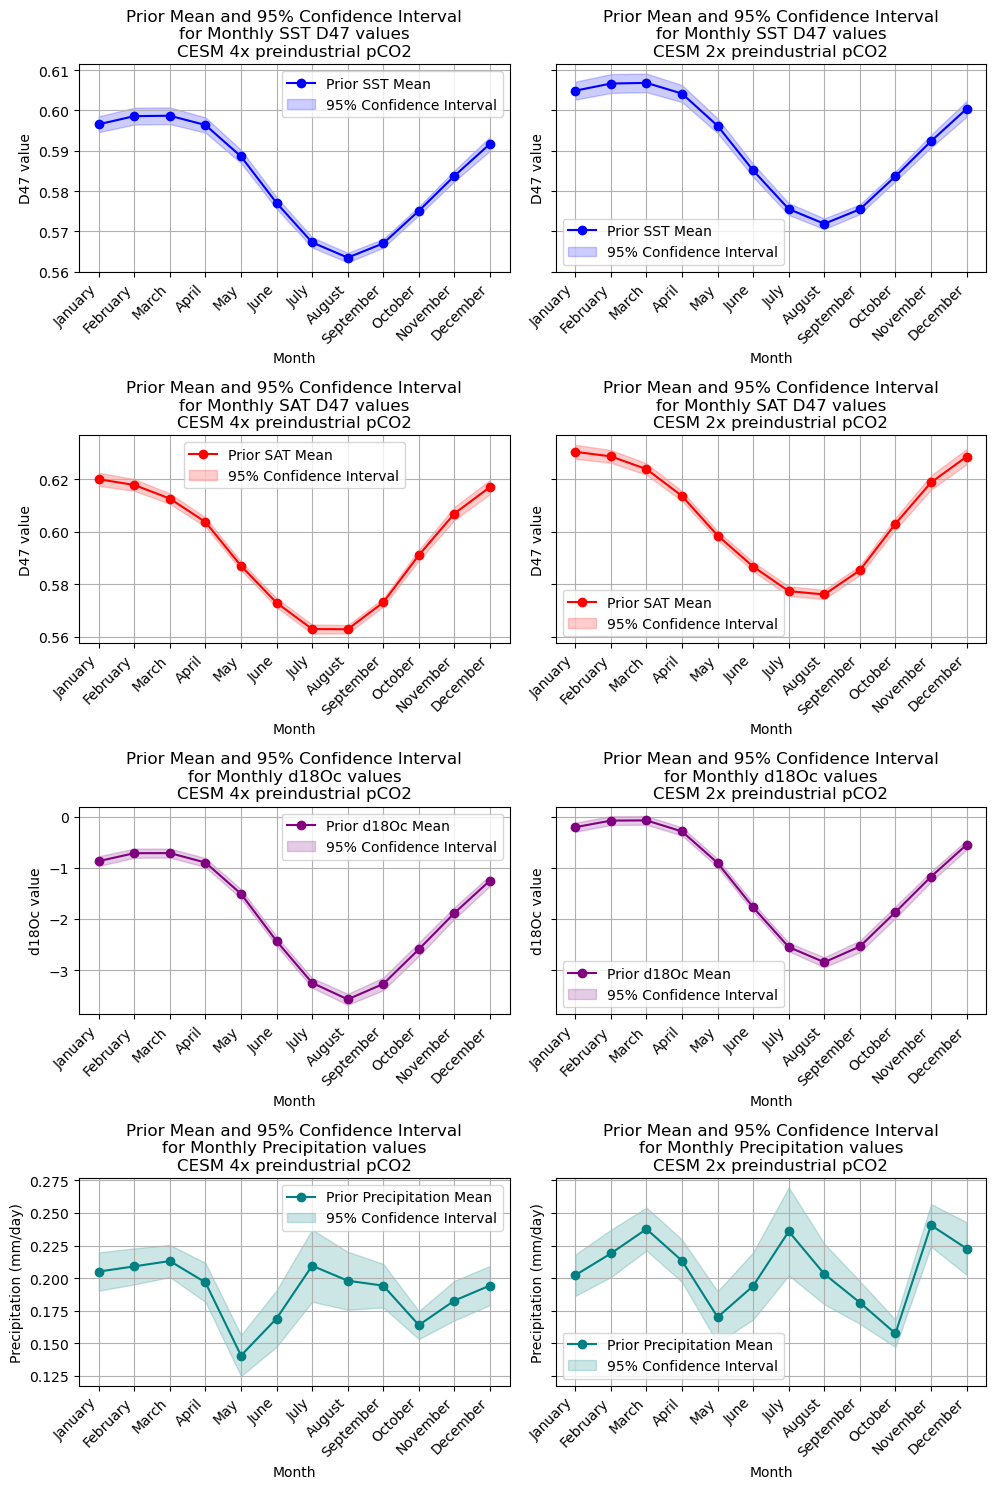

In [13]:
# Plot monthly prior distribution
fig, axes = plt.subplots(4, 2, figsize=(10, 15), sharey="row")  # Adjust the figure to have 2x2 grid

# Start with priors for CESM model with 4x pre-industrial CO2

# Plot the prior distribution for SST
axes[0, 0].plot(months_scale, mu_prior_CESM_4PIC_SST_D47_monthly, label='Prior SST Mean', color='b', marker='o')
axes[0, 0].fill_between(months_scale,
                        mu_prior_CESM_4PIC_SST_D47_monthly - stats.t.ppf(1 - 0.025, n_models_CESM_4PIC_monthly) * std_prior_CESM_4PIC_SST_D47_monthly / np.sqrt(n_models_CESM_4PIC_monthly),
                        mu_prior_CESM_4PIC_SST_D47_monthly + stats.t.ppf(1 - 0.025, n_models_CESM_4PIC_monthly) * std_prior_CESM_4PIC_SST_D47_monthly / np.sqrt(n_models_CESM_4PIC_monthly),
                        color='b', alpha=0.2, label='95% Confidence Interval')
axes[0, 0].set_xticks(months_scale)
axes[0, 0].set_xticklabels(month_names, rotation=45, ha="right")
axes[0, 0].set_title('Prior Mean and 95% Confidence Interval\nfor Monthly SST D47 values\nCESM 4x preindustrial pCO2')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('D47 value')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Plot the prior distribution for SAT
axes[1, 0].plot(months_scale, mu_prior_CESM_4PIC_SAT_D47_monthly, label='Prior SAT Mean', color='r', marker='o')
axes[1, 0].fill_between(months_scale,
                        mu_prior_CESM_4PIC_SAT_D47_monthly - stats.t.ppf(1 - 0.025, n_models_CESM_4PIC_monthly) * std_prior_CESM_4PIC_SAT_D47_monthly / np.sqrt(n_models_CESM_4PIC_monthly),
                        mu_prior_CESM_4PIC_SAT_D47_monthly + stats.t.ppf(1 - 0.025, n_models_CESM_4PIC_monthly) * std_prior_CESM_4PIC_SAT_D47_monthly / np.sqrt(n_models_CESM_4PIC_monthly),
                        color='r', alpha=0.2, label='95% Confidence Interval')
axes[1, 0].set_xticks(months_scale)
axes[1, 0].set_xticklabels(month_names, rotation=45, ha="right")
axes[1, 0].set_title('Prior Mean and 95% Confidence Interval\nfor Monthly SAT D47 values\nCESM 4x preindustrial pCO2')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('D47 value')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Plot the prior distribution for d18Oc
axes[2, 0].plot(months_scale, mu_prior_CESM_4PIC_d18Oc_monthly, label='Prior d18Oc Mean', color='purple', marker='o')
axes[2, 0].fill_between(months_scale,
                        mu_prior_CESM_4PIC_d18Oc_monthly - stats.t.ppf(1 - 0.025, n_models_CESM_4PIC_monthly) * std_prior_CESM_4PIC_d18Oc_monthly / np.sqrt(n_models_CESM_4PIC_monthly),
                        mu_prior_CESM_4PIC_d18Oc_monthly + stats.t.ppf(1 - 0.025, n_models_CESM_4PIC_monthly) * std_prior_CESM_4PIC_d18Oc_monthly / np.sqrt(n_models_CESM_4PIC_monthly),
                        color='purple', alpha=0.2, label='95% Confidence Interval')
axes[2, 0].set_xticks(months_scale)
axes[2, 0].set_xticklabels(month_names, rotation=45, ha="right")
axes[2, 0].set_title('Prior Mean and 95% Confidence Interval\nfor Monthly d18Oc values\nCESM 4x preindustrial pCO2')
axes[2, 0].set_xlabel('Month')
axes[2, 0].set_ylabel('d18Oc value')
axes[2, 0].legend()
axes[2, 0].grid(True)

# Plot the prior distribution for precipitation
axes[3, 0].plot(months_scale, mu_prior_CESM_4PIC_precip_monthly, label='Prior Precipitation Mean', color='teal', marker='o')
axes[3, 0].fill_between(months_scale,
                        mu_prior_CESM_4PIC_precip_monthly - stats.t.ppf(1 - 0.025, n_models_CESM_4PIC_monthly) * std_prior_CESM_4PIC_precip_monthly / np.sqrt(n_models_CESM_4PIC_monthly),
                        mu_prior_CESM_4PIC_precip_monthly + stats.t.ppf(1 - 0.025, n_models_CESM_4PIC_monthly) * std_prior_CESM_4PIC_precip_monthly / np.sqrt(n_models_CESM_4PIC_monthly),
                        color='teal', alpha=0.2, label='95% Confidence Interval')
axes[3, 0].set_xticks(months_scale)
axes[3, 0].set_xticklabels(month_names, rotation=45, ha="right")
axes[3, 0].set_title('Prior Mean and 95% Confidence Interval\nfor Monthly Precipitation values\nCESM 4x preindustrial pCO2')
axes[3, 0].set_xlabel('Month')
axes[3, 0].set_ylabel('Precipitation (mm/day)')
axes[3, 0].legend()
axes[3, 0].grid(True)

# Now for priors for CESM model with 2x pre-industrial CO2
# Plot the prior distribution for SST
axes[0, 1].plot(months_scale, mu_prior_CESM_2PIC_SST_D47_monthly, label='Prior SST Mean', color='b', marker='o')
axes[0, 1].fill_between(months_scale,
                        mu_prior_CESM_2PIC_SST_D47_monthly - stats.t.ppf(1 - 0.025, n_models_CESM_2PIC_monthly) * std_prior_CESM_2PIC_SST_D47_monthly / np.sqrt(n_models_CESM_2PIC_monthly),
                        mu_prior_CESM_2PIC_SST_D47_monthly + stats.t.ppf(1 - 0.025, n_models_CESM_2PIC_monthly) * std_prior_CESM_2PIC_SST_D47_monthly / np.sqrt(n_models_CESM_2PIC_monthly),
                        color='b', alpha=0.2, label='95% Confidence Interval')
axes[0, 1].set_xticks(months_scale)
axes[0, 1].set_xticklabels(month_names, rotation=45, ha="right")
axes[0, 1].set_title('Prior Mean and 95% Confidence Interval\nfor Monthly SST D47 values\nCESM 2x preindustrial pCO2')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('D47 value')
axes[0, 1].legend()
axes[0, 1].grid(True)

# Plot the prior distribution for SAT
axes[1, 1].plot(months_scale, mu_prior_CESM_2PIC_SAT_D47_monthly, label='Prior SAT Mean', color='r', marker='o')
axes[1, 1].fill_between(months_scale,
                        mu_prior_CESM_2PIC_SAT_D47_monthly - stats.t.ppf(1 - 0.025, n_models_CESM_2PIC_monthly) * std_prior_CESM_2PIC_SAT_D47_monthly / np.sqrt(n_models_CESM_2PIC_monthly),
                        mu_prior_CESM_2PIC_SAT_D47_monthly + stats.t.ppf(1 - 0.025, n_models_CESM_2PIC_monthly) * std_prior_CESM_2PIC_SAT_D47_monthly / np.sqrt(n_models_CESM_2PIC_monthly),
                        color='r', alpha=0.2, label='95% Confidence Interval')
axes[1, 1].set_xticks(months_scale)
axes[1, 1].set_xticklabels(month_names, rotation=45, ha="right")
axes[1, 1].set_title('Prior Mean and 95% Confidence Interval\nfor Monthly SAT D47 values\nCESM 2x preindustrial pCO2')
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('D47 value')
axes[1, 1].legend()
axes[1, 1].grid(True)

# Plot the prior distribution for d18Oc
axes[2, 1].plot(months_scale, mu_prior_CESM_2PIC_d18Oc_monthly, label='Prior d18Oc Mean', color='purple', marker='o')
axes[2, 1].fill_between(months_scale,
                        mu_prior_CESM_2PIC_d18Oc_monthly - stats.t.ppf(1 - 0.025, n_models_CESM_2PIC_monthly) * std_prior_CESM_2PIC_d18Oc_monthly / np.sqrt(n_models_CESM_2PIC_monthly),
                        mu_prior_CESM_2PIC_d18Oc_monthly + stats.t.ppf(1 - 0.025, n_models_CESM_2PIC_monthly) * std_prior_CESM_2PIC_d18Oc_monthly / np.sqrt(n_models_CESM_2PIC_monthly),
                        color='purple', alpha=0.2, label='95% Confidence Interval')
axes[2, 1].set_xticks(months_scale)
axes[2, 1].set_xticklabels(month_names, rotation=45, ha="right")
axes[2, 1].set_title('Prior Mean and 95% Confidence Interval\nfor Monthly d18Oc values\nCESM 2x preindustrial pCO2')
axes[2, 1].set_xlabel('Month')
axes[2, 1].set_ylabel('d18Oc value')
axes[2, 1].legend()
axes[2, 1].grid(True)

# Plot the prior distribution for precipitation
axes[3, 1].plot(months_scale, mu_prior_CESM_2PIC_precip_monthly, label='Prior Precipitation Mean', color='teal', marker='o')
axes[3, 1].fill_between(months_scale,
                        mu_prior_CESM_2PIC_precip_monthly - stats.t.ppf(1 - 0.025, n_models_CESM_2PIC_monthly) * std_prior_CESM_2PIC_precip_monthly / np.sqrt(n_models_CESM_2PIC_monthly),
                        mu_prior_CESM_2PIC_precip_monthly + stats.t.ppf(1 - 0.025, n_models_CESM_2PIC_monthly) * std_prior_CESM_2PIC_precip_monthly / np.sqrt(n_models_CESM_2PIC_monthly),
                        color='teal', alpha=0.2, label='95% Confidence Interval')
axes[3, 1].set_xticks(months_scale)
axes[3, 1].set_xticklabels(month_names, rotation=45, ha="right")
axes[3, 1].set_title('Prior Mean and 95% Confidence Interval\nfor Monthly Precipitation values\nCESM 2x preindustrial pCO2')
axes[3, 1].set_xlabel('Month')
axes[3, 1].set_ylabel('Precipitation (mm/day)')
axes[3, 1].legend()
axes[3, 1].grid(True)

# Update the layout and show the plot
plt.tight_layout()
plt.show()

## Calculate the monthly covariance matrix for D47 values of SST and SAT, d18Oc and precipitation

### First for CESM model with 4x pre-industrial CO2

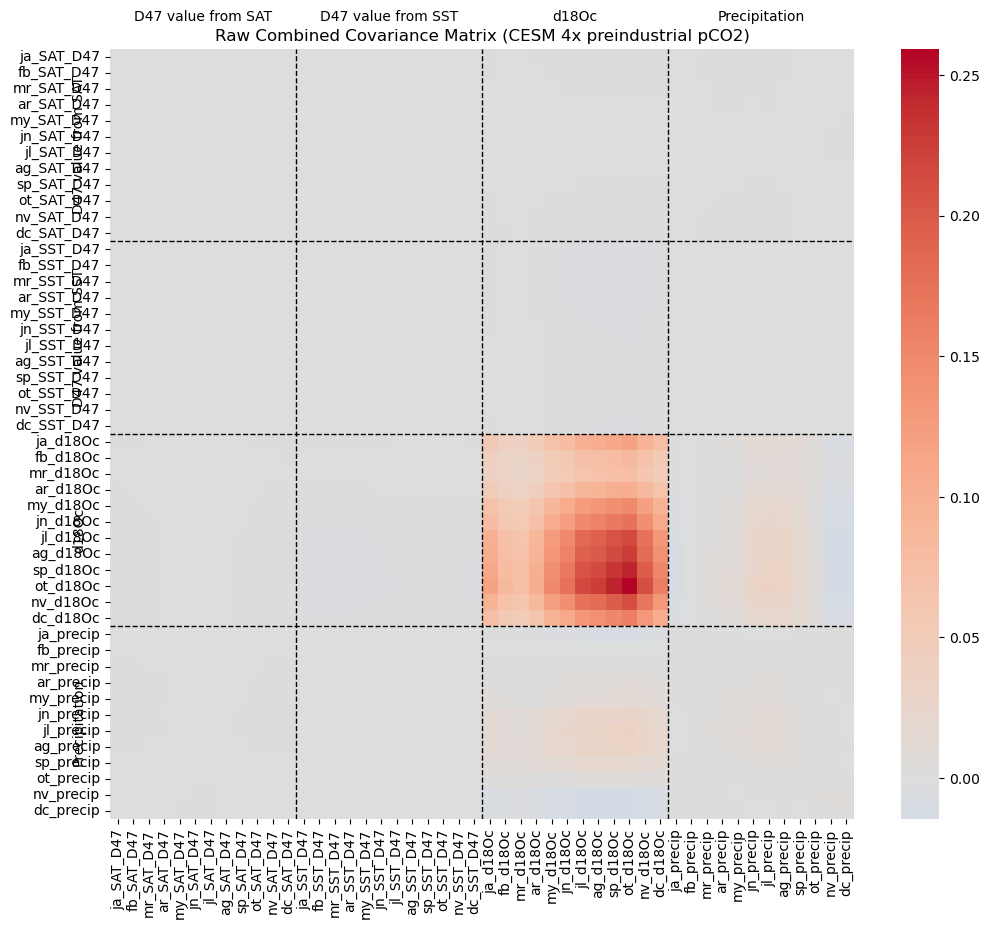

In [14]:
# Define column names for SAT, SST, d18Oc, and precipitation
SAT_D47_CESM_4PIC_columns_monthly = [f"{month}_SAT_D47" for month in months]
SST_D47_CESM_4PIC_columns_monthly = [f"{month}_SST_D47" for month in months]
d18Oc_CESM_4PIC_columns_monthly = [f"{month}_d18Oc" for month in months]
precip_CESM_4PIC_columns_monthly = [f"{month}_precip" for month in months]

# Extract the relevant columns for SAT, SST D47, d18Oc, and precipitation
SAT_D47_CESM_4PIC_columns_monthly = [f"{month}_SAT_D47" for month in months]
SST_D47_CESM_4PIC_columns_monthly = [f"{month}_SST_D47" for month in months]
d18Oc_CESM_4PIC_columns_monthly = [f"{month}_d18Oc" for month in months]
precip_CESM_4PIC_columns_monthly = [f"{month}_precip" for month in months]

# Combine the relevant columns into a single dataframe
combined_data_CESM_4PIC_monthly = Lutetian_CESM_4PIC_model[SAT_D47_CESM_4PIC_columns_monthly + SST_D47_CESM_4PIC_columns_monthly + d18Oc_CESM_4PIC_columns_monthly + precip_CESM_4PIC_columns_monthly]

# Calculate the covariance matrix for the combined data
cov_combined_CESM_4PIC_monthly = np.cov(combined_data_CESM_4PIC_monthly.dropna(), rowvar=False)

# Plot the heatmap of the raw combined covariance matrix
plt.figure(figsize=(12, 10))
sns.heatmap(
    cov_combined_CESM_4PIC_monthly,  # Use the raw covariance matrix
    annot=False,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    xticklabels=SAT_D47_CESM_4PIC_columns_monthly + SST_D47_CESM_4PIC_columns_monthly + d18Oc_CESM_4PIC_columns_monthly + precip_CESM_4PIC_columns_monthly,
    yticklabels=SAT_D47_CESM_4PIC_columns_monthly + SST_D47_CESM_4PIC_columns_monthly + d18Oc_CESM_4PIC_columns_monthly + precip_CESM_4PIC_columns_monthly
)

# Add titles to the axes per parameter
plt.axvline(x=len(SAT_D47_CESM_4PIC_columns_monthly), color='black', linestyle='--', linewidth=1)
plt.axvline(x=len(SAT_D47_CESM_4PIC_columns_monthly) + len(SST_D47_CESM_4PIC_columns_monthly), color='black', linestyle='--', linewidth=1)
plt.axvline(x=len(SAT_D47_CESM_4PIC_columns_monthly) + len(SST_D47_CESM_4PIC_columns_monthly) + len(d18Oc_CESM_4PIC_columns_monthly), color='black', linestyle='--', linewidth=1)

plt.axhline(y=len(SAT_D47_CESM_4PIC_columns_monthly), color='black', linestyle='--', linewidth=1)
plt.axhline(y=len(SAT_D47_CESM_4PIC_columns_monthly) + len(SST_D47_CESM_4PIC_columns_monthly), color='black', linestyle='--', linewidth=1)
plt.axhline(y=len(SAT_D47_CESM_4PIC_columns_monthly) + len(SST_D47_CESM_4PIC_columns_monthly) + len(d18Oc_CESM_4PIC_columns_monthly), color='black', linestyle='--', linewidth=1)

# Add parameter labels
plt.text(len(SAT_D47_CESM_4PIC_columns_monthly) / 2, -2, 'D47 value from SAT', ha='center', va='center', fontsize=10)
plt.text(len(SAT_D47_CESM_4PIC_columns_monthly) + len(SST_D47_CESM_4PIC_columns_monthly) / 2, -2, 'D47 value from SST', ha='center', va='center', fontsize=10)
plt.text(len(SAT_D47_CESM_4PIC_columns_monthly) + len(SST_D47_CESM_4PIC_columns_monthly) + len(d18Oc_CESM_4PIC_columns_monthly) / 2, -2, 'd18Oc', ha='center', va='center', fontsize=10)
plt.text(len(SAT_D47_CESM_4PIC_columns_monthly) + len(SST_D47_CESM_4PIC_columns_monthly) + len(d18Oc_CESM_4PIC_columns_monthly) + len(precip_CESM_4PIC_columns_monthly) / 2, -2, 'Precipitation', ha='center', va='center', fontsize=10)

plt.text(-2, len(SAT_D47_CESM_4PIC_columns_monthly) / 2, 'D47 value from SAT', ha='center', va='center', rotation=90, fontsize=10)
plt.text(-2, len(SAT_D47_CESM_4PIC_columns_monthly) + len(SST_D47_CESM_4PIC_columns_monthly) / 2, 'D47 value from SST', ha='center', va='center', rotation=90, fontsize=10)
plt.text(-2, len(SAT_D47_CESM_4PIC_columns_monthly) + len(SST_D47_CESM_4PIC_columns_monthly) + len(d18Oc_CESM_4PIC_columns_monthly) / 2, 'd18Oc', ha='center', va='center', rotation=90, fontsize=10)
plt.text(-2, len(SAT_D47_CESM_4PIC_columns_monthly) + len(SST_D47_CESM_4PIC_columns_monthly) + len(d18Oc_CESM_4PIC_columns_monthly) + len(precip_CESM_4PIC_columns_monthly) / 2, 'Precipitation', ha='center', va='center', rotation=90, fontsize=10)

plt.title("Raw Combined Covariance Matrix (CESM 4x preindustrial pCO2)")
plt.show()

### Then for CESM model with 2x pre-industrial CO2

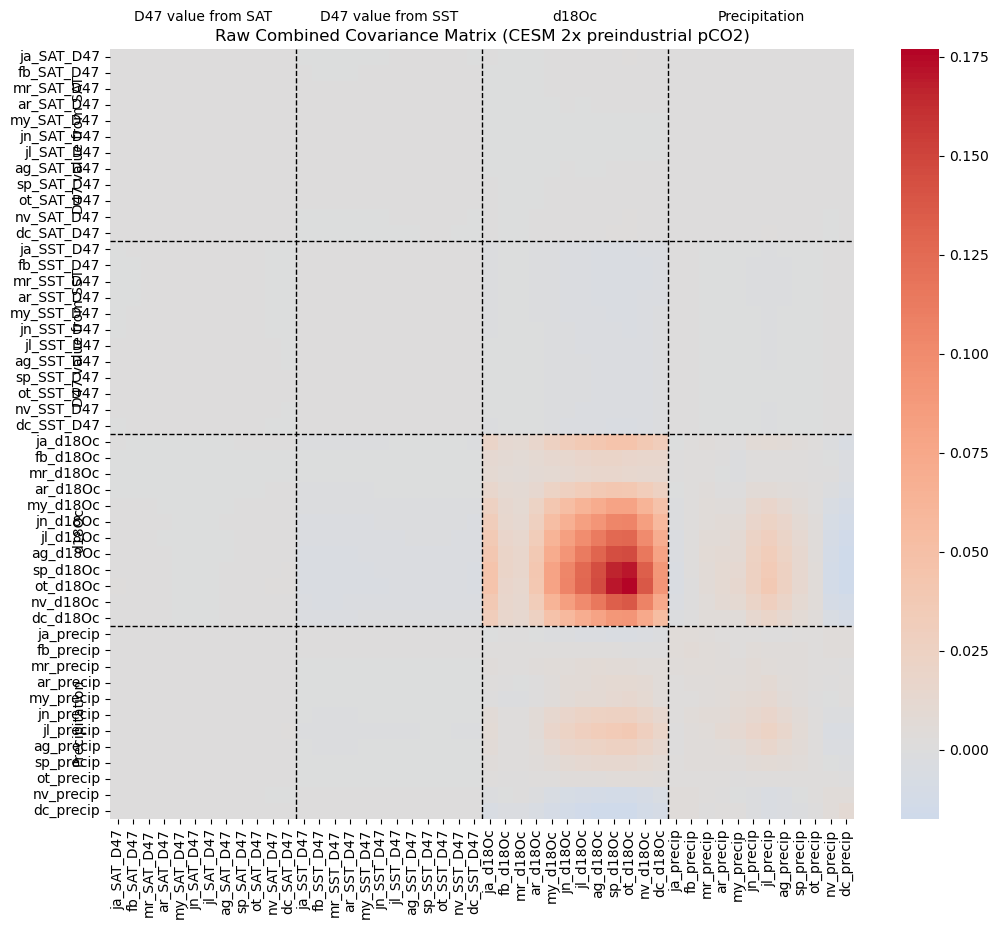

In [15]:
# Define column names for SAT, SST, d18Oc, and precipitation
SAT_D47_CESM_2PIC_columns_monthly = [f"{month}_SAT_D47" for month in months]
SST_D47_CESM_2PIC_columns_monthly = [f"{month}_SST_D47" for month in months]
d18Oc_CESM_2PIC_columns_monthly = [f"{month}_d18Oc" for month in months]
precip_CESM_2PIC_columns_monthly = [f"{month}_precip" for month in months]

# Extract the relevant columns for SAT, SST D47, d18Oc, and precipitation
SAT_D47_CESM_2PIC_columns_monthly = [f"{month}_SAT_D47" for month in months]
SST_D47_CESM_2PIC_columns_monthly = [f"{month}_SST_D47" for month in months]
d18Oc_CESM_2PIC_columns_monthly = [f"{month}_d18Oc" for month in months]
precip_CESM_2PIC_columns_monthly = [f"{month}_precip" for month in months]

# Combine the relevant columns into a single dataframe
combined_data_CESM_2PIC_monthly = Lutetian_CESM_2PIC_model[SAT_D47_CESM_2PIC_columns_monthly + SST_D47_CESM_2PIC_columns_monthly + d18Oc_CESM_2PIC_columns_monthly + precip_CESM_2PIC_columns_monthly]

# Calculate the covariance matrix for the combined data
cov_combined_CESM_2PIC_monthly = np.cov(combined_data_CESM_2PIC_monthly.dropna(), rowvar=False)

# Plot the heatmap of the raw combined covariance matrix
plt.figure(figsize=(12, 10))
sns.heatmap(
    cov_combined_CESM_2PIC_monthly,  # Use the raw covariance matrix
    annot=False,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    xticklabels=SAT_D47_CESM_2PIC_columns_monthly + SST_D47_CESM_2PIC_columns_monthly + d18Oc_CESM_2PIC_columns_monthly + precip_CESM_2PIC_columns_monthly,
    yticklabels=SAT_D47_CESM_2PIC_columns_monthly + SST_D47_CESM_2PIC_columns_monthly + d18Oc_CESM_2PIC_columns_monthly + precip_CESM_2PIC_columns_monthly
)

# Add titles to the axes per parameter
plt.axvline(x=len(SAT_D47_CESM_2PIC_columns_monthly), color='black', linestyle='--', linewidth=1)
plt.axvline(x=len(SAT_D47_CESM_2PIC_columns_monthly) + len(SST_D47_CESM_2PIC_columns_monthly), color='black', linestyle='--', linewidth=1)
plt.axvline(x=len(SAT_D47_CESM_2PIC_columns_monthly) + len(SST_D47_CESM_2PIC_columns_monthly) + len(d18Oc_CESM_2PIC_columns_monthly), color='black', linestyle='--', linewidth=1)

plt.axhline(y=len(SAT_D47_CESM_2PIC_columns_monthly), color='black', linestyle='--', linewidth=1)
plt.axhline(y=len(SAT_D47_CESM_2PIC_columns_monthly) + len(SST_D47_CESM_2PIC_columns_monthly), color='black', linestyle='--', linewidth=1)
plt.axhline(y=len(SAT_D47_CESM_2PIC_columns_monthly) + len(SST_D47_CESM_2PIC_columns_monthly) + len(d18Oc_CESM_2PIC_columns_monthly), color='black', linestyle='--', linewidth=1)

# Add parameter labels
plt.text(len(SAT_D47_CESM_2PIC_columns_monthly) / 2, -2, 'D47 value from SAT', ha='center', va='center', fontsize=10)
plt.text(len(SAT_D47_CESM_2PIC_columns_monthly) + len(SST_D47_CESM_2PIC_columns_monthly) / 2, -2, 'D47 value from SST', ha='center', va='center', fontsize=10)
plt.text(len(SAT_D47_CESM_2PIC_columns_monthly) + len(SST_D47_CESM_2PIC_columns_monthly) + len(d18Oc_CESM_2PIC_columns_monthly) / 2, -2, 'd18Oc', ha='center', va='center', fontsize=10)
plt.text(len(SAT_D47_CESM_2PIC_columns_monthly) + len(SST_D47_CESM_2PIC_columns_monthly) + len(d18Oc_CESM_2PIC_columns_monthly) + len(precip_CESM_2PIC_columns_monthly) / 2, -2, 'Precipitation', ha='center', va='center', fontsize=10)

plt.text(-2, len(SAT_D47_CESM_2PIC_columns_monthly) / 2, 'D47 value from SAT', ha='center', va='center', rotation=90, fontsize=10)
plt.text(-2, len(SAT_D47_CESM_2PIC_columns_monthly) + len(SST_D47_CESM_2PIC_columns_monthly) / 2, 'D47 value from SST', ha='center', va='center', rotation=90, fontsize=10)
plt.text(-2, len(SAT_D47_CESM_2PIC_columns_monthly) + len(SST_D47_CESM_2PIC_columns_monthly) + len(d18Oc_CESM_2PIC_columns_monthly) / 2, 'd18Oc', ha='center', va='center', rotation=90, fontsize=10)
plt.text(-2, len(SAT_D47_CESM_2PIC_columns_monthly) + len(SST_D47_CESM_2PIC_columns_monthly) + len(d18Oc_CESM_2PIC_columns_monthly) + len(precip_CESM_2PIC_columns_monthly) / 2, 'Precipitation', ha='center', va='center', rotation=90, fontsize=10)

plt.title("Raw Combined Covariance Matrix (CESM 2x preindustrial pCO2)")
plt.show()

## Plot normalized monthly covariance matrix between D47 values of SST and SAT, d18Oc and precipitation

### First for CESM with 4x preindustrial pCO2

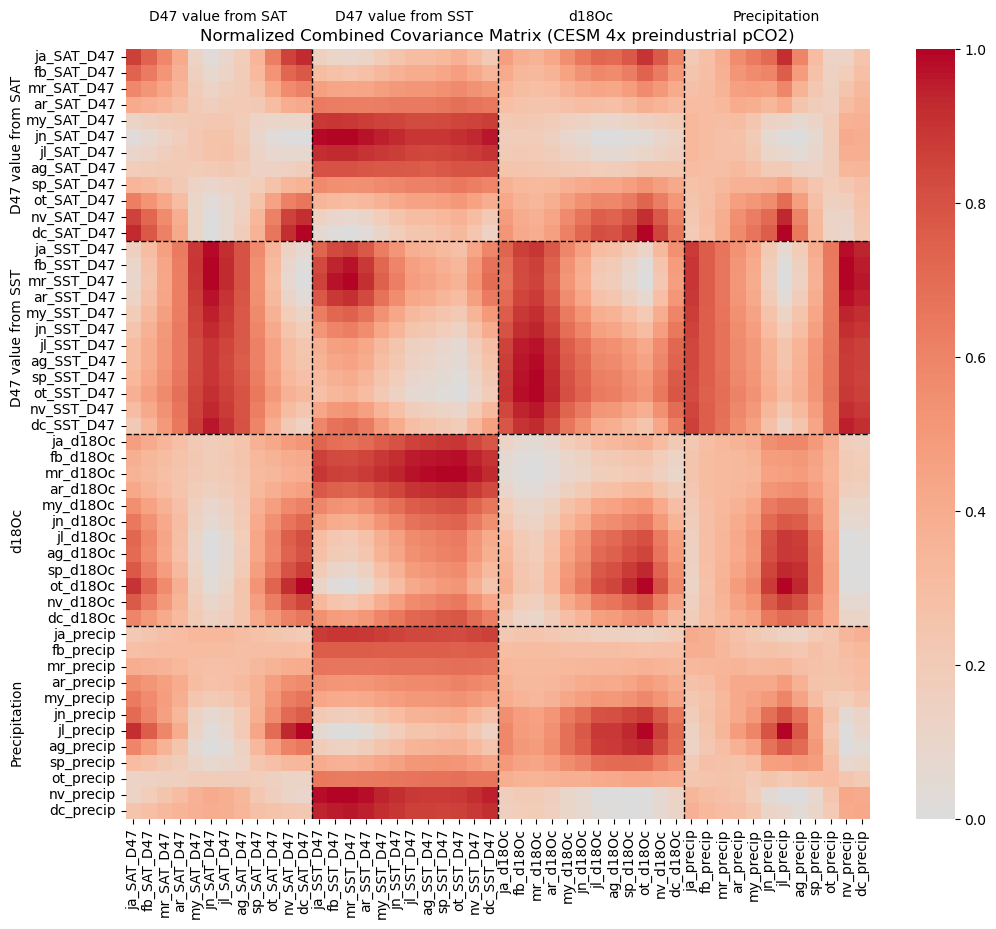

In [16]:
# Normalize each submatrix independently for better visualization
def normalize_matrix(matrix):
    min_val = np.min(matrix)
    max_val = np.max(matrix)
    return (matrix - min_val) / (max_val - min_val)

# Extract the relevant columns for SAT, SST D47, d18Oc, and precipitation
SAT_D47_CESM_4PIC_columns_monthly = [f"{month}_SAT_D47" for month in months]
SST_D47_CESM_4PIC_columns_monthly = [f"{month}_SST_D47" for month in months]
d18Oc_CESM_4PIC_columns_monthly = [f"{month}_d18Oc" for month in months]
precip_CESM_4PIC_columns_monthly = [f"{month}_precip" for month in months]

# Combine the relevant columns into a single dataframe
combined_data_CESM_4PIC_monthly = Lutetian_CESM_4PIC_model[SAT_D47_CESM_4PIC_columns_monthly + SST_D47_CESM_4PIC_columns_monthly + d18Oc_CESM_4PIC_columns_monthly + precip_CESM_4PIC_columns_monthly]

# Calculate the covariance matrix for the combined data
cov_combined_CESM_4PIC_monthly = np.cov(combined_data_CESM_4PIC_monthly.dropna(), rowvar=False)

# Extract the covariance matrices for SAT D47, SST D47, d18Oc, and precipitation
cov_CESM_4PIC_SAT_D47_monthly = cov_combined_CESM_4PIC_monthly[:len(months), :len(months)]
cov_CESM_4PIC_SST_D47_monthly = cov_combined_CESM_4PIC_monthly[len(months):2*len(months), len(months):2*len(months)]
cov_CESM_4PIC_d18Oc_monthly = cov_combined_CESM_4PIC_monthly[2*len(months):3*len(months), 2*len(months):3*len(months)]
cov_CESM_4PIC_precip_monthly = cov_combined_CESM_4PIC_monthly[3*len(months):, 3*len(months):]

# Extract the cross-covariance matrices
cross_cov_CESM_4PIC_SAT_SST_D47_monthly = cov_combined_CESM_4PIC_monthly[:len(months), len(months):2*len(months)]
cross_cov_CESM_4PIC_SAT_d18Oc_monthly = cov_combined_CESM_4PIC_monthly[:len(months), 2*len(months):3*len(months)]
cross_cov_CESM_4PIC_SAT_precip_monthly = cov_combined_CESM_4PIC_monthly[:len(months), 3*len(months):]
cross_cov_CESM_4PIC_SST_d18Oc_monthly = cov_combined_CESM_4PIC_monthly[len(months):2*len(months), 2*len(months):3*len(months)]
cross_cov_CESM_4PIC_SST_precip_monthly = cov_combined_CESM_4PIC_monthly[len(months):2*len(months), 3*len(months):]
cross_cov_CESM_4PIC_d18Oc_precip_monthly = cov_combined_CESM_4PIC_monthly[2*len(months):3*len(months), 3*len(months):]

# Normalize each submatrix
normalized_cov_CESM_4PIC_SAT_D47_monthly = normalize_matrix(cov_CESM_4PIC_SAT_D47_monthly)
normalized_cov_CESM_4PIC_SST_D47_monthly = normalize_matrix(cov_CESM_4PIC_SST_D47_monthly)
normalized_cov_CESM_4PIC_d18Oc_monthly = normalize_matrix(cov_CESM_4PIC_d18Oc_monthly)
normalized_cov_CESM_4PIC_precip_monthly = normalize_matrix(cov_CESM_4PIC_precip_monthly)

# Normalize each cross-covariance matrix
normalized_cross_cov_CESM_4PIC_SAT_SST_D47_monthly = normalize_matrix(cross_cov_CESM_4PIC_SAT_SST_D47_monthly)
normalized_cross_cov_CESM_4PIC_SAT_d18Oc_monthly = normalize_matrix(cross_cov_CESM_4PIC_SAT_d18Oc_monthly)
normalized_cross_cov_CESM_4PIC_SAT_precip_monthly = normalize_matrix(cross_cov_CESM_4PIC_SAT_precip_monthly)
normalized_cross_cov_CESM_4PIC_SST_d18Oc_monthly = normalize_matrix(cross_cov_CESM_4PIC_SST_d18Oc_monthly)
normalized_cross_cov_CESM_4PIC_SST_precip_monthly = normalize_matrix(cross_cov_CESM_4PIC_SST_precip_monthly)
normalized_cross_cov_CESM_4PIC_d18Oc_precip_monthly = normalize_matrix(cross_cov_CESM_4PIC_d18Oc_precip_monthly)

# Combine the normalized submatrices into a single normalized covariance matrix
normalized_cov_combined_CESM_4PIC_monthly = np.block([
    [normalized_cov_CESM_4PIC_SAT_D47_monthly, normalized_cross_cov_CESM_4PIC_SAT_SST_D47_monthly, normalized_cross_cov_CESM_4PIC_SAT_d18Oc_monthly, normalized_cross_cov_CESM_4PIC_SAT_precip_monthly],
    [normalized_cross_cov_CESM_4PIC_SAT_SST_D47_monthly.T, normalized_cov_CESM_4PIC_SST_D47_monthly, normalized_cross_cov_CESM_4PIC_SST_d18Oc_monthly, normalized_cross_cov_CESM_4PIC_SST_precip_monthly],
    [normalized_cross_cov_CESM_4PIC_SAT_d18Oc_monthly.T, normalized_cross_cov_CESM_4PIC_SST_d18Oc_monthly.T, normalized_cov_CESM_4PIC_d18Oc_monthly, normalized_cross_cov_CESM_4PIC_d18Oc_precip_monthly],
    [normalized_cross_cov_CESM_4PIC_SAT_precip_monthly.T, normalized_cross_cov_CESM_4PIC_SST_precip_monthly.T, normalized_cross_cov_CESM_4PIC_d18Oc_precip_monthly.T, normalized_cov_CESM_4PIC_precip_monthly]
])

# Plot the heatmap of the normalized combined covariance matrix
plt.figure(figsize=(12, 10))
sns.heatmap(
    normalized_cov_combined_CESM_4PIC_monthly,
    annot=False,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    xticklabels=SAT_D47_CESM_4PIC_columns_monthly + SST_D47_CESM_4PIC_columns_monthly + d18Oc_CESM_4PIC_columns_monthly + precip_CESM_4PIC_columns_monthly,
    yticklabels=SAT_D47_CESM_4PIC_columns_monthly + SST_D47_CESM_4PIC_columns_monthly + d18Oc_CESM_4PIC_columns_monthly + precip_CESM_4PIC_columns_monthly
)

# Add titles to the axes per parameter
plt.axvline(x=len(SAT_D47_CESM_4PIC_columns_monthly), color='black', linestyle='--', linewidth=1)
plt.axvline(x=len(SAT_D47_CESM_4PIC_columns_monthly) + len(SST_D47_CESM_4PIC_columns_monthly), color='black', linestyle='--', linewidth=1)
plt.axvline(x=len(SAT_D47_CESM_4PIC_columns_monthly) + len(SST_D47_CESM_4PIC_columns_monthly) + len(d18Oc_CESM_4PIC_columns_monthly), color='black', linestyle='--', linewidth=1)

plt.axhline(y=len(SAT_D47_CESM_4PIC_columns_monthly), color='black', linestyle='--', linewidth=1)
plt.axhline(y=len(SAT_D47_CESM_4PIC_columns_monthly) + len(SST_D47_CESM_4PIC_columns_monthly), color='black', linestyle='--', linewidth=1)
plt.axhline(y=len(SAT_D47_CESM_4PIC_columns_monthly) + len(SST_D47_CESM_4PIC_columns_monthly) + len(d18Oc_CESM_4PIC_columns_monthly), color='black', linestyle='--', linewidth=1)

# Add parameter labels
plt.text(len(SAT_D47_CESM_4PIC_columns_monthly) / 2, -2, 'D47 value from SAT', ha='center', va='center', fontsize=10)
plt.text(len(SAT_D47_CESM_4PIC_columns_monthly) + len(SST_D47_CESM_4PIC_columns_monthly) / 2, -2, 'D47 value from SST', ha='center', va='center', fontsize=10)
plt.text(len(SAT_D47_CESM_4PIC_columns_monthly) + len(SST_D47_CESM_4PIC_columns_monthly) + len(d18Oc_CESM_4PIC_columns_monthly) / 2, -2, 'd18Oc', ha='center', va='center', fontsize=10)
plt.text(len(SAT_D47_CESM_4PIC_columns_monthly) + len(SST_D47_CESM_4PIC_columns_monthly) + len(d18Oc_CESM_4PIC_columns_monthly) + len(precip_CESM_4PIC_columns_monthly) / 2, -2, 'Precipitation', ha='center', va='center', fontsize=10)

plt.text(-7, len(SAT_D47_CESM_4PIC_columns_monthly) / 2, 'D47 value from SAT', ha='center', va='center', rotation=90, fontsize=10)
plt.text(-7, len(SAT_D47_CESM_4PIC_columns_monthly) + len(SST_D47_CESM_4PIC_columns_monthly) / 2, 'D47 value from SST', ha='center', va='center', rotation=90, fontsize=10)
plt.text(-7, len(SAT_D47_CESM_4PIC_columns_monthly) + len(SST_D47_CESM_4PIC_columns_monthly) + len(d18Oc_CESM_4PIC_columns_monthly) / 2, 'd18Oc', ha='center', va='center', rotation=90, fontsize=10)
plt.text(-7, len(SAT_D47_CESM_4PIC_columns_monthly) + len(SST_D47_CESM_4PIC_columns_monthly) + len(d18Oc_CESM_4PIC_columns_monthly) + len(precip_CESM_4PIC_columns_monthly) / 2, 'Precipitation', ha='center', va='center', rotation=90, fontsize=10)

plt.title("Normalized Combined Covariance Matrix (CESM 4x preindustrial pCO2)")
plt.show()

### Then for CESM with 2x preindustrial pCO2

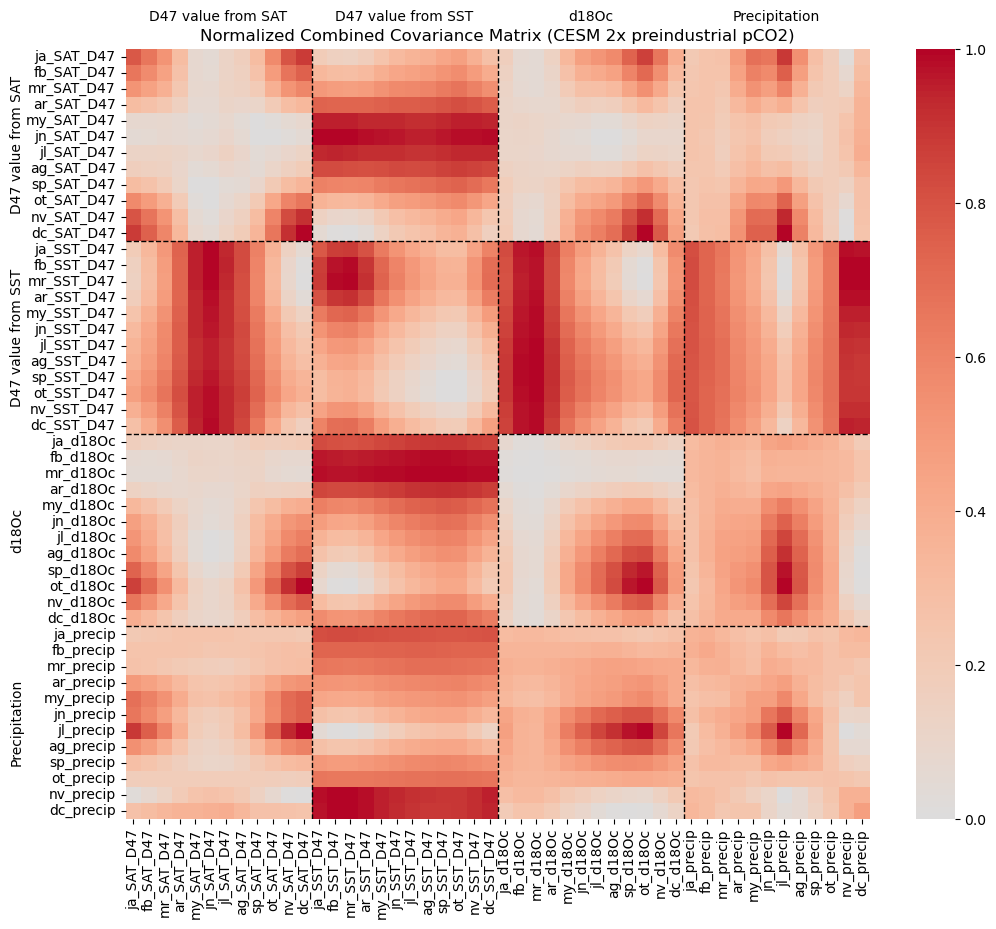

In [17]:
# Normalize each submatrix independently for better visualization
def normalize_matrix(matrix):
    min_val = np.min(matrix)
    max_val = np.max(matrix)
    return (matrix - min_val) / (max_val - min_val)

# Extract the relevant columns for SAT, SST D47, d18Oc, and precipitation
SAT_D47_CESM_2PIC_columns_monthly = [f"{month}_SAT_D47" for month in months]
SST_D47_CESM_2PIC_columns_monthly = [f"{month}_SST_D47" for month in months]
d18Oc_CESM_2PIC_columns_monthly = [f"{month}_d18Oc" for month in months]
precip_CESM_2PIC_columns_monthly = [f"{month}_precip" for month in months]

# Combine the relevant columns into a single dataframe
combined_data_CESM_2PIC_monthly = Lutetian_CESM_2PIC_model[SAT_D47_CESM_2PIC_columns_monthly + SST_D47_CESM_2PIC_columns_monthly + d18Oc_CESM_2PIC_columns_monthly + precip_CESM_2PIC_columns_monthly]

# Calculate the covariance matrix for the combined data
cov_combined_CESM_2PIC_monthly = np.cov(combined_data_CESM_2PIC_monthly.dropna(), rowvar=False)

# Extract the covariance matrices for SAT D47, SST D47, d18Oc, and precipitation
cov_CESM_2PIC_SAT_D47_monthly = cov_combined_CESM_2PIC_monthly[:len(months), :len(months)]
cov_CESM_2PIC_SST_D47_monthly = cov_combined_CESM_2PIC_monthly[len(months):2*len(months), len(months):2*len(months)]
cov_CESM_2PIC_d18Oc_monthly = cov_combined_CESM_2PIC_monthly[2*len(months):3*len(months), 2*len(months):3*len(months)]
cov_CESM_2PIC_precip_monthly = cov_combined_CESM_2PIC_monthly[3*len(months):, 3*len(months):]

# Extract the cross-covariance matrices
cross_cov_CESM_2PIC_SAT_SST_D47_monthly = cov_combined_CESM_2PIC_monthly[:len(months), len(months):2*len(months)]
cross_cov_CESM_2PIC_SAT_d18Oc_monthly = cov_combined_CESM_2PIC_monthly[:len(months), 2*len(months):3*len(months)]
cross_cov_CESM_2PIC_SAT_precip_monthly = cov_combined_CESM_2PIC_monthly[:len(months), 3*len(months):]
cross_cov_CESM_2PIC_SST_d18Oc_monthly = cov_combined_CESM_2PIC_monthly[len(months):2*len(months), 2*len(months):3*len(months)]
cross_cov_CESM_2PIC_SST_precip_monthly = cov_combined_CESM_2PIC_monthly[len(months):2*len(months), 3*len(months):]
cross_cov_CESM_2PIC_d18Oc_precip_monthly = cov_combined_CESM_2PIC_monthly[2*len(months):3*len(months), 3*len(months):]

# Normalize each submatrix
normalized_cov_CESM_2PIC_SAT_D47_monthly = normalize_matrix(cov_CESM_2PIC_SAT_D47_monthly)
normalized_cov_CESM_2PIC_SST_D47_monthly = normalize_matrix(cov_CESM_2PIC_SST_D47_monthly)
normalized_cov_CESM_2PIC_d18Oc_monthly = normalize_matrix(cov_CESM_2PIC_d18Oc_monthly)
normalized_cov_CESM_2PIC_precip_monthly = normalize_matrix(cov_CESM_2PIC_precip_monthly)

# Normalize each cross-covariance matrix
normalized_cross_cov_CESM_2PIC_SAT_SST_D47_monthly = normalize_matrix(cross_cov_CESM_2PIC_SAT_SST_D47_monthly)
normalized_cross_cov_CESM_2PIC_SAT_d18Oc_monthly = normalize_matrix(cross_cov_CESM_2PIC_SAT_d18Oc_monthly)
normalized_cross_cov_CESM_2PIC_SAT_precip_monthly = normalize_matrix(cross_cov_CESM_2PIC_SAT_precip_monthly)
normalized_cross_cov_CESM_2PIC_SST_d18Oc_monthly = normalize_matrix(cross_cov_CESM_2PIC_SST_d18Oc_monthly)
normalized_cross_cov_CESM_2PIC_SST_precip_monthly = normalize_matrix(cross_cov_CESM_2PIC_SST_precip_monthly)
normalized_cross_cov_CESM_2PIC_d18Oc_precip_monthly = normalize_matrix(cross_cov_CESM_2PIC_d18Oc_precip_monthly)

# Combine the normalized submatrices into a single normalized covariance matrix
normalized_cov_combined_CESM_2PIC_monthly = np.block([
    [normalized_cov_CESM_2PIC_SAT_D47_monthly, normalized_cross_cov_CESM_2PIC_SAT_SST_D47_monthly, normalized_cross_cov_CESM_2PIC_SAT_d18Oc_monthly, normalized_cross_cov_CESM_2PIC_SAT_precip_monthly],
    [normalized_cross_cov_CESM_2PIC_SAT_SST_D47_monthly.T, normalized_cov_CESM_2PIC_SST_D47_monthly, normalized_cross_cov_CESM_2PIC_SST_d18Oc_monthly, normalized_cross_cov_CESM_2PIC_SST_precip_monthly],
    [normalized_cross_cov_CESM_2PIC_SAT_d18Oc_monthly.T, normalized_cross_cov_CESM_2PIC_SST_d18Oc_monthly.T, normalized_cov_CESM_2PIC_d18Oc_monthly, normalized_cross_cov_CESM_2PIC_d18Oc_precip_monthly],
    [normalized_cross_cov_CESM_2PIC_SAT_precip_monthly.T, normalized_cross_cov_CESM_2PIC_SST_precip_monthly.T, normalized_cross_cov_CESM_2PIC_d18Oc_precip_monthly.T, normalized_cov_CESM_2PIC_precip_monthly]
])

# Plot the heatmap of the normalized combined covariance matrix
plt.figure(figsize=(12, 10))
sns.heatmap(
    normalized_cov_combined_CESM_2PIC_monthly,
    annot=False,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    xticklabels=SAT_D47_CESM_2PIC_columns_monthly + SST_D47_CESM_2PIC_columns_monthly + d18Oc_CESM_2PIC_columns_monthly + precip_CESM_2PIC_columns_monthly,
    yticklabels=SAT_D47_CESM_2PIC_columns_monthly + SST_D47_CESM_2PIC_columns_monthly + d18Oc_CESM_2PIC_columns_monthly + precip_CESM_2PIC_columns_monthly
)

# Add titles to the axes per parameter
plt.axvline(x=len(SAT_D47_CESM_2PIC_columns_monthly), color='black', linestyle='--', linewidth=1)
plt.axvline(x=len(SAT_D47_CESM_2PIC_columns_monthly) + len(SST_D47_CESM_2PIC_columns_monthly), color='black', linestyle='--', linewidth=1)
plt.axvline(x=len(SAT_D47_CESM_2PIC_columns_monthly) + len(SST_D47_CESM_2PIC_columns_monthly) + len(d18Oc_CESM_2PIC_columns_monthly), color='black', linestyle='--', linewidth=1)

plt.axhline(y=len(SAT_D47_CESM_2PIC_columns_monthly), color='black', linestyle='--', linewidth=1)
plt.axhline(y=len(SAT_D47_CESM_2PIC_columns_monthly) + len(SST_D47_CESM_2PIC_columns_monthly), color='black', linestyle='--', linewidth=1)
plt.axhline(y=len(SAT_D47_CESM_2PIC_columns_monthly) + len(SST_D47_CESM_2PIC_columns_monthly) + len(d18Oc_CESM_2PIC_columns_monthly), color='black', linestyle='--', linewidth=1)

# Add parameter labels
plt.text(len(SAT_D47_CESM_2PIC_columns_monthly) / 2, -2, 'D47 value from SAT', ha='center', va='center', fontsize=10)
plt.text(len(SAT_D47_CESM_2PIC_columns_monthly) + len(SST_D47_CESM_2PIC_columns_monthly) / 2, -2, 'D47 value from SST', ha='center', va='center', fontsize=10)
plt.text(len(SAT_D47_CESM_2PIC_columns_monthly) + len(SST_D47_CESM_2PIC_columns_monthly) + len(d18Oc_CESM_2PIC_columns_monthly) / 2, -2, 'd18Oc', ha='center', va='center', fontsize=10)
plt.text(len(SAT_D47_CESM_2PIC_columns_monthly) + len(SST_D47_CESM_2PIC_columns_monthly) + len(d18Oc_CESM_2PIC_columns_monthly) + len(precip_CESM_2PIC_columns_monthly) / 2, -2, 'Precipitation', ha='center', va='center', fontsize=10)

plt.text(-7, len(SAT_D47_CESM_2PIC_columns_monthly) / 2, 'D47 value from SAT', ha='center', va='center', rotation=90, fontsize=10)
plt.text(-7, len(SAT_D47_CESM_2PIC_columns_monthly) + len(SST_D47_CESM_2PIC_columns_monthly) / 2, 'D47 value from SST', ha='center', va='center', rotation=90, fontsize=10)
plt.text(-7, len(SAT_D47_CESM_2PIC_columns_monthly) + len(SST_D47_CESM_2PIC_columns_monthly) + len(d18Oc_CESM_2PIC_columns_monthly) / 2, 'd18Oc', ha='center', va='center', rotation=90, fontsize=10)
plt.text(-7, len(SAT_D47_CESM_2PIC_columns_monthly) + len(SST_D47_CESM_2PIC_columns_monthly) + len(d18Oc_CESM_2PIC_columns_monthly) + len(precip_CESM_2PIC_columns_monthly) / 2, 'Precipitation', ha='center', va='center', rotation=90, fontsize=10)

plt.title("Normalized Combined Covariance Matrix (CESM 2x preindustrial pCO2)")
plt.show()

### Then for the difference between 2x and 4x preindustrial pCO2

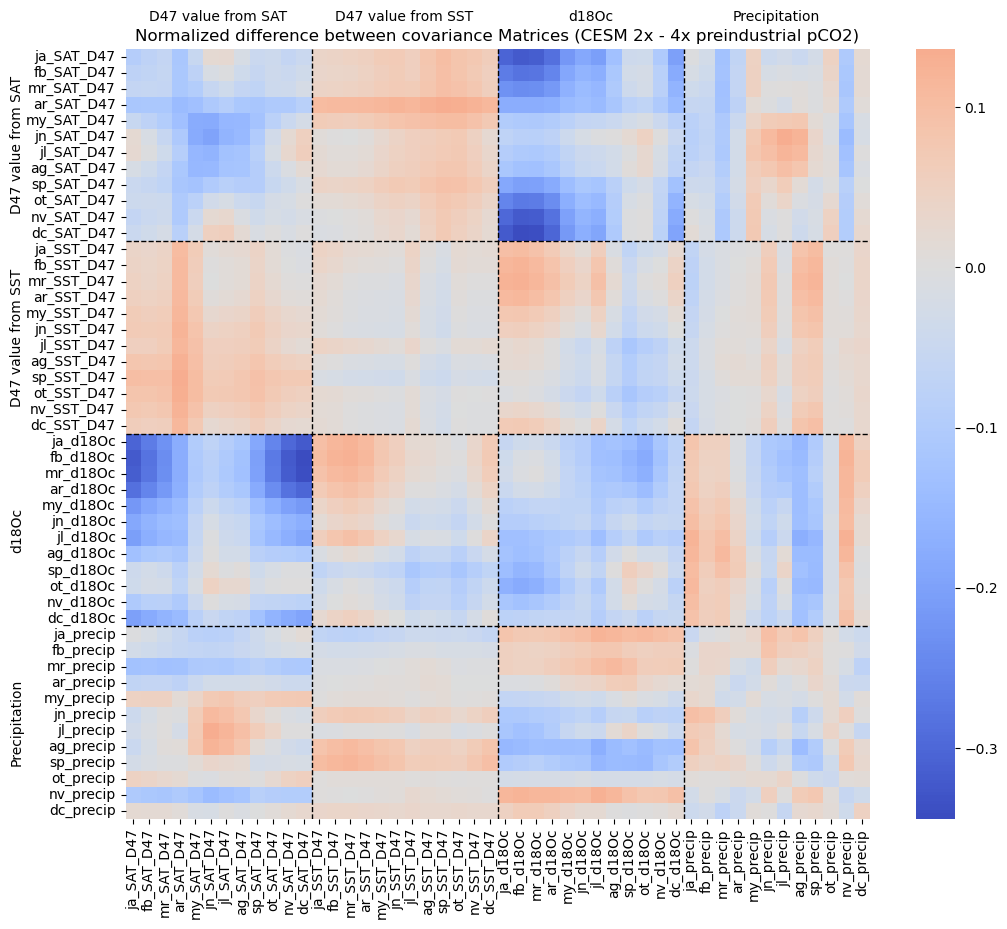

In [18]:
# Calculate the difference between the two normalized covariance matrices
normalized_cov_combined_2_4_PIC_diff_monthly = normalized_cov_combined_CESM_2PIC_monthly - normalized_cov_combined_CESM_4PIC_monthly

# Plot the heatmap of the normalized combined covariance matrix
plt.figure(figsize=(12, 10))
sns.heatmap(
    normalized_cov_combined_2_4_PIC_diff_monthly,
    annot=False,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    xticklabels=SAT_D47_CESM_2PIC_columns_monthly + SST_D47_CESM_2PIC_columns_monthly + d18Oc_CESM_2PIC_columns_monthly + precip_CESM_2PIC_columns_monthly,
    yticklabels=SAT_D47_CESM_2PIC_columns_monthly + SST_D47_CESM_2PIC_columns_monthly + d18Oc_CESM_2PIC_columns_monthly + precip_CESM_2PIC_columns_monthly
)

# Add titles to the axes per parameter
plt.axvline(x=len(SAT_D47_CESM_2PIC_columns_monthly), color='black', linestyle='--', linewidth=1)
plt.axvline(x=len(SAT_D47_CESM_2PIC_columns_monthly) + len(SST_D47_CESM_2PIC_columns_monthly), color='black', linestyle='--', linewidth=1)
plt.axvline(x=len(SAT_D47_CESM_2PIC_columns_monthly) + len(SST_D47_CESM_2PIC_columns_monthly) + len(d18Oc_CESM_2PIC_columns_monthly), color='black', linestyle='--', linewidth=1)

plt.axhline(y=len(SAT_D47_CESM_2PIC_columns_monthly), color='black', linestyle='--', linewidth=1)
plt.axhline(y=len(SAT_D47_CESM_2PIC_columns_monthly) + len(SST_D47_CESM_2PIC_columns_monthly), color='black', linestyle='--', linewidth=1)
plt.axhline(y=len(SAT_D47_CESM_2PIC_columns_monthly) + len(SST_D47_CESM_2PIC_columns_monthly) + len(d18Oc_CESM_2PIC_columns_monthly), color='black', linestyle='--', linewidth=1)

# Add parameter labels
plt.text(len(SAT_D47_CESM_2PIC_columns_monthly) / 2, -2, 'D47 value from SAT', ha='center', va='center', fontsize=10)
plt.text(len(SAT_D47_CESM_2PIC_columns_monthly) + len(SST_D47_CESM_2PIC_columns_monthly) / 2, -2, 'D47 value from SST', ha='center', va='center', fontsize=10)
plt.text(len(SAT_D47_CESM_2PIC_columns_monthly) + len(SST_D47_CESM_2PIC_columns_monthly) + len(d18Oc_CESM_2PIC_columns_monthly) / 2, -2, 'd18Oc', ha='center', va='center', fontsize=10)
plt.text(len(SAT_D47_CESM_2PIC_columns_monthly) + len(SST_D47_CESM_2PIC_columns_monthly) + len(d18Oc_CESM_2PIC_columns_monthly) + len(precip_CESM_2PIC_columns_monthly) / 2, -2, 'Precipitation', ha='center', va='center', fontsize=10)

plt.text(-7, len(SAT_D47_CESM_2PIC_columns_monthly) / 2, 'D47 value from SAT', ha='center', va='center', rotation=90, fontsize=10)
plt.text(-7, len(SAT_D47_CESM_2PIC_columns_monthly) + len(SST_D47_CESM_2PIC_columns_monthly) / 2, 'D47 value from SST', ha='center', va='center', rotation=90, fontsize=10)
plt.text(-7, len(SAT_D47_CESM_2PIC_columns_monthly) + len(SST_D47_CESM_2PIC_columns_monthly) + len(d18Oc_CESM_2PIC_columns_monthly) / 2, 'd18Oc', ha='center', va='center', rotation=90, fontsize=10)
plt.text(-7, len(SAT_D47_CESM_2PIC_columns_monthly) + len(SST_D47_CESM_2PIC_columns_monthly) + len(d18Oc_CESM_2PIC_columns_monthly) + len(precip_CESM_2PIC_columns_monthly) / 2, 'Precipitation', ha='center', va='center', rotation=90, fontsize=10)

plt.title("Normalized difference between covariance Matrices (CESM 2x - 4x preindustrial pCO2)")
plt.show()

## Create combined monthly state vector

In [19]:
# Combine the prior means of D47 and SAT into a single state vector
mu_prior_CESM_4PIC_monthly_combined = np.concatenate((mu_prior_CESM_4PIC_SST_D47_monthly, mu_prior_CESM_4PIC_SAT_D47_monthly, mu_prior_CESM_4PIC_d18Oc_monthly, mu_prior_CESM_4PIC_precip_monthly))
mu_prior_CESM_2PIC_monthly_combined = np.concatenate((mu_prior_CESM_2PIC_SST_D47_monthly, mu_prior_CESM_2PIC_SAT_D47_monthly, mu_prior_CESM_2PIC_d18Oc_monthly, mu_prior_CESM_2PIC_precip_monthly))

# Combine the covariance matrices of D47 values of SST and SAT, including the cross-covariance
cov_prior_CESM_4PIC_monthly_combined = cov_combined_CESM_4PIC_monthly.copy()
cov_prior_CESM_2PIC_monthly_combined = cov_combined_CESM_2PIC_monthly.copy()

# OBSERVATIONS
## Load clumped data for updating
### Monthly data from Paris Basin Campanile giganteum paper (Van Horebeek et al. 2025)

In [20]:
# Load seasonal measurements and format them into a dictionary
# This is precompiled seasonal data per specimen and therefore does not come with a time uncertainty
Lutetian_seasonally_aggregated_data = pd.read_csv('Lutetian case/D47_season_data_calc.csv') # Load the data for seasonal averages
Lutetian_seasonally_aggregated_data_dict = Lutetian_seasonally_aggregated_data.to_dict('records') # Convert to dictionary with column headers as keys

# Add an entry for the time uncertainty (which is always zero in this case, because data is already aggregated monthly)
for record in Lutetian_seasonally_aggregated_data_dict:
    record["Season_err"] = 0 # Set the time uncertainty to zero
    record["D47_se"] = record["D47_SD"] / np.sqrt(record["count"]) # Calculate the standard error of the D47 value

print(Lutetian_seasonally_aggregated_data_dict[0]) # Print to check the structure of the data

{'Season': 'summer', 'Whorl...P.or.T': 'AW', 'X': 'AX', 'D47_mean': 0.589860492, 'D47_SD': 0.042653301, 'count': 62, 'd18O': -2.150527044, 'd18O_SD': 0.312787802, 'T': 27.892776, 'CL95': 0.010920335, 'CL95_T': 3.824099323, 'd18Osw': -0.27016391, 'DOY': 203.6572, 'Tmin': 24.20918351, 'Tmax': 31.71674359, 'dwmin': -1.11891794, 'dwmax': 0.610934613, 'Season_err': 0, 'D47_se': 0.005416974643977352}


### Raw data at the sample level

In [21]:
# Load measurements and format them into a dictionary
# These are the actual individual D47 and d18Oc measurements and ShellChron outcomes and thus come with a time uncertainty which can be propagated.
Lutetian_D47_data = pd.read_csv('Lutetian case/Campanile_sample_data_calc2.csv') # Load data for individual D47 and d18Oc measurements and ShellChron outcomes
Lutetian_data_dict = Lutetian_D47_data.to_dict('records') # Convert to dictionary with column headers as keys

# Add an entry for the time uncertainty (which is always zero in this case, because there is no time uncertainty in the raw data)
for record in Lutetian_data_dict:
    # Handle missing values and convert from days to months and seasons
    shell_chron_doy_err = record.get("DOY_SD", np.nan)  # Get value, default to NaN if missing
    if pd.isna(shell_chron_doy_err):  # Check if the value is NaN
        record["Month_err"] = 0 # Set the time uncertainty to zero
        record["Season_err"] = 0 # Set the time uncertainty to zero
        record["no_err"] = 0 # Set the time uncertainty to zero
    else:
        record["Month_err"] = shell_chron_doy_err / 365 * 12  # Convert days to months
        record["Season_err"] = shell_chron_doy_err / 365 * 4 # Convert days to seasons
        record["no_err"] = 0 # Set the time uncertainty to zero for no error
    # Assign the D47 value and its standard deviation
    record["D47_SD"] = 0.029 # Assign external standard deviation to the D47 value (based on reproducibility of IAEA-C2 measurements)
    record["season_score"] = np.floor(((record["DOY"] + 45) % 365) / 365 * 4) # Calculate the season score from DOY value (winter = 0, spring = 1, summer = 2, autumn = 3). Shift two months to align with the seasons defined in paper.
    record["month_score"] = np.floor(((record["DOY"]) % 365) / 365 * 12) # Calculate the month score from DOY value (January = 0, February = 1, ..., December = 11).

print(Lutetian_data_dict[0]) # Print to check the structure of the data

{'ID': 'AB002', 'D': 5.0, 'Run': nan, 'Row': nan, 'Sample.intensity': nan, 'X49.parameter': nan, 'D47_raw': nan, 'D47_SD': 0.029, 'D47_final': nan, 'Temperature': nan, 'd18O': -1.5, 'd13C': 2.15, 'Whorl': nan, 'sample_nr': nan, 'Year': nan, 'season_manual': nan, 'd18O_SD': 0.1, 'day': 145.316271, 'DOY_SD': nan, 'season_label': nan, 'T_d18O': nan, 'DOY': 145.316271, 'Season': nan, 'Month_err': 0, 'Season_err': 0, 'no_err': 0, 'season_score': 2.0, 'month_score': 4.0}


## Aggregate proxy data to monthly bins

In [22]:
# Aggregate and summarize proxy data per month, tracking mean and propagated SE for D47 and d18O separately
monthly_agg = []
for month in range(12):
    month_records = [record for record in Lutetian_data_dict if int(record["month_score"]) == month]
    entry = {
        "month_score": month,
        "D47_mean": np.nanmean([rec.get("D47_final") for rec in month_records if not pd.isna(rec.get("D47_final"))]),
        "D47_SD": np.sqrt(np.nansum([rec.get("D47_SD", np.nan) ** 2 for rec in month_records if not pd.isna(rec.get("D47_SD")) and not pd.isna(rec.get("D47_final"))])) / max(1, len([rec for rec in month_records if not pd.isna(rec.get("D47_SD")) and not pd.isna(rec.get("D47_final"))])),
        "d18O": np.nanmean([rec.get("d18O") for rec in month_records if not pd.isna(rec.get("d18O"))]),
        "d18O_SD": np.sqrt(np.nansum([rec.get("d18O_SD", np.nan) ** 2 for rec in month_records if not pd.isna(rec.get("d18O_SD")) and not pd.isna(rec.get("d18O"))])) / max(1, len([rec for rec in month_records if not pd.isna(rec.get("d18O_SD")) and not pd.isna(rec.get("d18O"))])),
        "Month_err": 0
    }
    monthly_agg.append(entry)
Lutetian_data_monthly_aggregated_df = pd.DataFrame(monthly_agg)
Lutetian_data_monthly_aggregated_dict = Lutetian_data_monthly_aggregated_df.to_dict("records")

print(Lutetian_data_monthly_aggregated_dict[0]) # Print to check the structure of the data
print(Lutetian_data_monthly_aggregated_dict[0]) # Print to check the structure of the data

{'month_score': 0, 'D47_mean': 0.6315000000000001, 'D47_SD': 0.0145, 'd18O': 0.016000000000000014, 'd18O_SD': 0.0447213595499958, 'Month_err': 0}
{'month_score': 0, 'D47_mean': 0.6315000000000001, 'D47_SD': 0.0145, 'd18O': 0.016000000000000014, 'd18O_SD': 0.0447213595499958, 'Month_err': 0}


C:\Users\nwi213\AppData\Local\Temp\ipykernel_9476\1428035188.py:7: RuntimeWarning: Mean of empty slice
  "D47_mean": np.nanmean([rec.get("D47_final") for rec in month_records if not pd.isna(rec.get("D47_final"))]),


## Prepare measurement and observation matrices

### Define a wrapped normal distribution to allow uncertainty in the time domain to flow around the year

In [23]:
# Function to calculate wrapped normal distribution weights
def wrapped_normal_pdf(x, mean, sd, num_bins):
    # Calculate the normal PDF for each bin
    pdf = stats.norm.pdf(x, loc = mean, scale = sd)
    # Wrap around the bins
    for i in range(1, num_bins):
        pdf += stats.norm.pdf(x + i * num_bins, loc = mean, scale = sd)
        pdf += stats.norm.pdf(x - i * num_bins, loc = mean, scale = sd)
    # Normalize the weights to ensure the sum equals 1
    pdf /= pdf.sum()
    return pdf

## Observations aggregated by season

### Measurement matrix for monthly-averaged D47 and d18Oc values

In [24]:
# Extract measurements and uncertainties from the dictionary
D47_measurements = [measurement["D47_mean"] for measurement in Lutetian_data_monthly_aggregated_dict] # Extract the D47 values from monthly aggregated data
d18Oc_measurements = [measurement["d18O"] for measurement in Lutetian_data_monthly_aggregated_dict] # Extract the d18Oc values from monthly aggregated data
D47_measurements_se = [measurement["D47_SD"] ** 2 for measurement in Lutetian_data_monthly_aggregated_dict] # Square the standard deviation to get the variance
d18Oc_measurements_se = [measurement["d18O_SD"] ** 2 for measurement in Lutetian_data_monthly_aggregated_dict] # Square the standard deviation to get the variance

# OPTIONAL: Lower boundary d18Oc variance at 0.01 (equivalent to 0.1 per mil measurement uncertainty)
d18Oc_measurements_se = [max(uncertainty, 0.01) for uncertainty in d18Oc_measurements_se]  # Ensure the uncertainty variance is at least 0.01

# Create the measurement matrix Z
Z = np.array(D47_measurements + d18Oc_measurements).reshape(-1, 1) # Combine D47 and d18Oc measurements into a single matrix

# Create the measurement uncertainty matrix R (diagonal matrix)
R = np.diag(D47_measurements_se + d18Oc_measurements_se) # Combine the variances of D47 and d18Oc measurements into a single diagonal matrix

# Number of seasonally averaged measurements
N_measurements = len(Z) # Get the number of aggregated measurements

### Observation matrix for season- and monthly-averaged D47 and d18Oc data from seasonally aggregated proxy measurements

In [25]:
# Create the observation matrix H for seasonal data based on seasonally aggregated data
H = np.zeros((N_measurements, len(mu_prior_CESM_4PIC_monthly_combined)))

# Fill the monthly observation matrix H with ones at the positions corresponding to the measurements
half_monthly = int(N_measurements / 2)
for i, measurement in enumerate(Lutetian_data_monthly_aggregated_dict):
    month_index = int(measurement["month_score"])
    # First half: D47 (SST)
    H[i, month_index] = 1
    # Second half: d18Oc (SSS)
    H[i + half_monthly, month_index + 24] = 1

print(H)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# DEFINE UPDATING FUNCTIONS

## Create updating function (Kalman filter)
- Include updating of second variable (SAT) through cross-covariance
- Use block updating

Input:
- Prior means (mu_prior)
- Prior covariance matrix (P)
- Observation matrix (H)
- Measurement matrix (Z)
- Uncertainty matrix (R)

Output:
- Posterior means (mu_post)
- Posterior covariance matrix (P_post)

In [26]:
def kalman_update_block(
    mu_prior: np.ndarray,
    cov_prior: np.ndarray,
    Z: np.ndarray,
    R: np.ndarray,
    H: np.ndarray,
    debug_print: bool = False
):
    """
    Perform a Kalman update step for a block of observations.

    Parameters:
    mu_prior (np.ndarray): The prior mean vector.
    cov_prior (np.ndarray): The prior covariance matrix.
    Z (np.ndarray): The measurement matrix.
    R (np.ndarray): The measurement noise covariance matrix.
    H (np.ndarray): The observation matrix.
    debug_print (bool): If True, print debug statements.

    Returns:
    mu_posterior (np.ndarray): The posterior mean vector.
    cov_posterior (np.ndarray): The posterior covariance matrix.
    """
    if debug_print:
        # Print shapes of key variables for debugging
        print("Shape of cov_prior:", cov_prior.shape)
        print("Shape of H:", H.shape)
        print("Shape of R:", R.shape)
        print("Shape of mu_prior:", mu_prior.shape)
        print("Shape of Z:", Z.shape)

    # Compute the Kalman gain
    K = cov_prior @ H.T @ np.linalg.inv(H @ cov_prior @ H.T + R)
    if debug_print:
        print("K matrix:", K)
        print("Shape of K:", K.shape)

    # In-between steps for debugging
    Y_hat = H @ mu_prior  # Compute the predicted observation
    if debug_print:
        print("Y_hat:", Y_hat)
        print("Shape of Y_hat:", Y_hat.shape)
    innovation = Z - Y_hat.reshape(-1, 1)  # Compute the innovation
    if debug_print:
        print("Innovation:", innovation)
        print("Shape of innovation:", innovation.shape)
    # Replace NaN values in innovation with zeros
    innovation = np.nan_to_num(innovation, nan=0.0)
    kalman_gain = (K @ innovation).flatten()
    if debug_print:
        print("Kalman gain:", kalman_gain)
        print("Shape of kalman_gain:", kalman_gain.shape)

    # Update the posterior mean estimate
    mu_posterior = mu_prior + kalman_gain.flatten()

    # Update the posterior covariance estimate
    cov_posterior = cov_prior - K @ H @ cov_prior

    return mu_posterior, cov_posterior

## Create function to track the statistics of the likelihood (combining just the reconstruction data)

In [27]:
# UPDATED SCRIPT TO ACCOMMODATE MULTIPLE VARIABLES
# Create function to keep track of the likelihood statistics and data

def likelihood_statistics_multi(
    weighted_sum,
    effective_weights_total,
    n_update,
    data_library,
    measurement,
    timestamp,
    timestamp_sd,
    Variable_names = ["Variable_name1", "Variable_name2"],
    Variable_names_SDs = ["Variable_name_SD1", "Variable_name_SD2"]
):
    """
    Incrementally updates the likelihood statistics for seasonal data.

    Parameters:
    - weighted_sum: list
        List tracking the mean times the effective weight for each time bin and variable.
    - effective_weights_total: list
        List tracking the sum of effective weights for each time bin and variable.
    - n_update: list
        List tracking the number of datapoints for each time bin and variable.
    - data_library: dict
        Dictionary tracking individual data points and their uncertainties.
    - measurement: dict
        A single measurement containing data on multiple variables.
    - timestamp: str
        Key in the measurement dictionary for the timestamp (0-based index).
    - timestamp_sd: float
        Standard deviation of uncertainty in the timestamp.
    - Variable_name: list of str
        Key in the measurement dictionary for the variables (e.g. d18Os, D47).
    - Variable_name_SD: list of str
        Key in the measurement dictionary for the standard deviation on the variables (e.g. d18Os, D47).
    """
    # Check if at least one combination of variable name and its SD is present in the measurement
    found = False
    for var_name, var_sd_name in zip(Variable_names, Variable_names_SDs):
        if var_name in measurement and var_sd_name in measurement:
            found = True
            break

    if timestamp in measurement and found:
        # Extract the time and data values from the measurement
        time = measurement[timestamp]
        time_sd = measurement[timestamp_sd]
        # Loop through all variable/SD pairs
        for var_name, var_sd_name in zip(Variable_names, Variable_names_SDs):
            if var_name in measurement and var_sd_name in measurement:
                data_val = measurement[var_name]
                data_sd = measurement[var_sd_name]
                
                # Check if the data is valid
                if not np.isnan(data_val) and not np.isnan(data_sd):
                    # Calculate the weight (inverse of variance)
                    weight = 1 / (data_sd ** 2)

                    # Determine the number of bins
                    num_bins_seasonal = int(len(weighted_sum) / len(Variable_names))
                    # Ensure num_bins_seasonal is an integer
                    bin_indices = np.arange(num_bins_seasonal, dtype=np.float64)

                    # Calculate the probability density for each bin
                    if time_sd == 0:  # Catch cases where the time uncertainty is zero (or unknown)
                        probabilities = np.zeros(num_bins_seasonal, dtype=np.float64)
                        bin_index = int(time) % num_bins_seasonal  # Ensure the bin index is within range
                        probabilities[bin_index] = 1  # Set the probability to 1 for the correct bin
                    else:
                        probabilities = stats.norm.pdf(bin_indices, loc=time, scale=time_sd)  # For non-zero time uncertainty, use a normal distribution
                        probabilities /= probabilities.sum()  # Normalize to ensure the sum of probabilities is 1

                    for i, prob in enumerate(probabilities):  # Loop over all possible bin numbers in the probability vector
                        bin_index = i % num_bins_seasonal  # Wrap around to the first bin if it overflows

                        # Update the weighted sums and sample count
                        effective_weight = weight * prob
                        var_idx = Variable_names.index(var_name)  # Find the index of the variable
                        idx = int(var_idx * num_bins_seasonal + bin_index)  # Unique index for (variable, bin)
                        if weighted_sum[idx] is None:
                            weighted_sum[idx] = 0
                            effective_weights_total[idx] = 0
                        weighted_sum[idx] = weighted_sum[idx] + data_val * effective_weight
                        effective_weights_total[idx] = effective_weights_total[idx] + effective_weight

                    # Update n_update for the correct variable and bin
                    var_idx = Variable_names.index(var_name) # Find the index of the variable
                    n_update[var_idx * num_bins_seasonal + (int(time) % num_bins_seasonal)] += 1  # update sample number per bin and variable

                    # Track individual data points and their uncertainties
                    key = (var_name, int(time)) # Store individual data points in a dictionary with (variable, time) as key
                    if key not in data_library:
                        data_library[key] = []  # Initialize the list for a new (time, var_name) pair
                    data_library[key].append((time_sd, data_val, data_sd))
    return weighted_sum, effective_weights_total, n_update, data_library # Return the updated values

# EXECUTE UPDATING FUNCTIONS - MONTHLY

## Update monthly priors from CESM 4x preindustrial pCO2 with aggregated data
* Data and model outcomes aggregated in 12 months
* No sclero-dating uncertainty
* D47 Data aggregated per specimen and per month

In [28]:
# Apply Kalman function to update the prior with monthly data including updating the prec estimates
# Update the monthly D47 and prec prior with all measurements using block updating
monthly_aggregated_data = {} # Keep track of datapoints per season
n_update_CESM_4PIC = np.concatenate([mu_prior_CESM_4PIC_SST_D47_monthly * 0, mu_prior_CESM_4PIC_d18Oc_monthly * 0]) # Vector to store sample size per season for confidence interval plotting
weighted_sum_CESM_4PIC = np.concatenate([mu_prior_CESM_4PIC_SST_D47_monthly * 0, mu_prior_CESM_4PIC_d18Oc_monthly * 0]) # Vector to store mean temperature per season for confidence interval plotting
effective_weights_total_CESM_4PIC = np.concatenate([mu_prior_CESM_4PIC_SST_D47_monthly * 0, mu_prior_CESM_4PIC_d18Oc_monthly * 0]) # Vector to store temperature uncertainty per season for confidence interval plotting
mu_likelihood = np.concatenate([mu_prior_CESM_4PIC_SST_D47_monthly * 0, mu_prior_CESM_4PIC_d18Oc_monthly * 0]) # Vector to store mean temperature per season for confidence interval plotting
std_likelihood = np.concatenate([mu_prior_CESM_4PIC_SST_D47_monthly * 0, mu_prior_CESM_4PIC_d18Oc_monthly * 0]) # Vector to store temperature uncertainty per season for confidence interval plotting
var_names = ["D47_mean", "d18O"] # List of variable names which are updated
var_SD_names = ["D47_SD", "d18O_SD"] # List of names of variable uncertainties which are updated

# Update the prior with monthly data using the Kalman filter in block updating form
mu_post_CESM_4PIC, cov_post_CESM_4PIC = kalman_update_block(
    mu_prior_CESM_4PIC_monthly_combined,
    cov_prior_CESM_4PIC_monthly_combined,
    Z,
    R,
    H
)

# Extract the updated mean values from the combined state vector
mu_post_CESM_4PIC_SST_D47 = mu_post_CESM_4PIC[:len(mu_prior_CESM_4PIC_SST_D47_monthly)]
mu_post_CESM_4PIC_SAT_D47 = mu_post_CESM_4PIC[len(mu_prior_CESM_4PIC_SST_D47_monthly):2*len(mu_prior_CESM_4PIC_SST_D47_monthly)]
mu_post_CESM_4PIC_d18Oc = mu_post_CESM_4PIC[2*len(mu_prior_CESM_4PIC_SST_D47_monthly):3*len(mu_prior_CESM_4PIC_SST_D47_monthly)]
mu_post_CESM_4PIC_precip = mu_post_CESM_4PIC[3*len(mu_prior_CESM_4PIC_d18Oc_monthly):]

# Extract the updated covariance matrices from the combined covariance matrix
cov_post_CESM_4PIC_SST_D47 = cov_post_CESM_4PIC[:len(mu_prior_CESM_4PIC_SST_D47_monthly), :len(mu_prior_CESM_4PIC_SST_D47_monthly)]
cov_post_CESM_4PIC_SAT_D47 = cov_post_CESM_4PIC[len(mu_prior_CESM_4PIC_SST_D47_monthly):2*len(mu_prior_CESM_4PIC_SST_D47_monthly), len(mu_prior_CESM_4PIC_SST_D47_monthly):2*len(mu_prior_CESM_4PIC_SST_D47_monthly)]
cov_post_CESM_4PIC_d18Oc = cov_post_CESM_4PIC[2*len(mu_prior_CESM_4PIC_SST_D47_monthly):3*len(mu_prior_CESM_4PIC_SST_D47_monthly), 2*len(mu_prior_CESM_4PIC_SST_D47_monthly):3*len(mu_prior_CESM_4PIC_SST_D47_monthly)]
cov_post_CESM_4PIC_precip = cov_post_CESM_4PIC[3*len(mu_prior_CESM_4PIC_d18Oc_monthly):, 3*len(mu_prior_CESM_4PIC_d18Oc_monthly):]

for measurement in Lutetian_data_monthly_aggregated_dict: # Loop over measurements    
    # Track and update likelihood statistics
    weighted_sum_CESM_4PIC, effective_weights_total_CESM_4PIC, n_update_CESM_4PIC, monthly_aggregated_data = likelihood_statistics_multi(
        weighted_sum_CESM_4PIC,
        effective_weights_total_CESM_4PIC,
        n_update_CESM_4PIC,
        monthly_aggregated_data,
        measurement,
        timestamp = "month_score",
        timestamp_sd = "Month_err",
        Variable_names = var_names,
        Variable_names_SDs = var_SD_names
    )

# Normalize the weighted_sum_CESM_4PIC to obtain weighted mean
# Calculate inverse square root of the effective_weights_total_CESM_4PIC to contain the weighted standard deviation
# Print likelihood statistics
print("Likelihood statistics:")
num_vars = len(var_names)  # number of variables (e.g., D47, d18O)
num_bins_monthly = int(len(weighted_sum_CESM_4PIC) / num_vars)

for var_idx, var_name in enumerate(var_names):
    print(f"Results for variable: {var_name}")
    for bin_idx in range(num_bins_monthly):
        idx = var_idx * num_bins_monthly + bin_idx
        if effective_weights_total_CESM_4PIC[idx] is not None and effective_weights_total_CESM_4PIC[idx] != 0:
            mu_likelihood[idx] = weighted_sum_CESM_4PIC[idx] / effective_weights_total_CESM_4PIC[idx]
            std_likelihood[idx] = np.sqrt(1 / effective_weights_total_CESM_4PIC[idx])
        else:
            # If there are no data points for this bin, set the likelihood to NaN
            mu_likelihood[idx] = np.nan
            std_likelihood[idx] = np.nan
        print(f"  Bin {bin_idx + 1}:")
        print(f"    Weighted Average: {mu_likelihood[idx]}")
        print(f"    Aggregated Uncertainty: {std_likelihood[idx]}")
        print(f"    Number of Data Points: {n_update_CESM_4PIC[idx]}")
    print()

print("Original Prior Mean SST-D47 monthly:\n", mu_prior_CESM_4PIC_SST_D47_monthly_original)
print("Original Prior Standard Deviation SST-D47 monthly:\n", np.sqrt(np.diag(cov_prior_CESM_4PIC_SST_D47_monthly_original)))
print("Updated Posterior Mean SST-D47 monthly:\n", mu_post_CESM_4PIC_SST_D47)
print("Updated Posterior Standard Deviation SST-D47 monthly:\n", np.sqrt(np.diag(cov_post_CESM_4PIC_SST_D47)))
print("Original Prior Mean SAT-D47 monthly:\n", mu_prior_CESM_4PIC_SAT_monthly_original)
print("Original Prior Standard Deviation SAT-D47 monthly:\n", np.sqrt(np.diag(cov_prior_CESM_4PIC_SAT_monthly_original)))
print("Updated Posterior Mean SAT-D47 monthly:\n", mu_post_CESM_4PIC_SAT_D47)
print("Updated Posterior Standard Deviation SAT-D47 monthly:\n", np.sqrt(np.diag(cov_post_CESM_4PIC_SAT_D47)))
print("Original Prior Mean d18Oc monthly:\n", mu_prior_CESM_4PIC_d18Oc_monthly_original)
print("Original Prior Standard Deviation d18Oc monthly:\n", np.sqrt(np.diag(cov_prior_CESM_4PIC_d18Oc_monthly_original)))
print("Updated Posterior Mean d18Oc monthly:\n", mu_post_CESM_4PIC_d18Oc)
print("Updated Posterior Standard Deviation d18Oc monthly:\n", np.sqrt(np.diag(cov_post_CESM_4PIC_d18Oc)))
print("Original Prior Mean precipitation monthly:\n", mu_prior_CESM_4PIC_precip_monthly_original)
print("Original Prior Standard Deviation precipitation monthly:\n", np.sqrt(np.diag(cov_prior_CESM_4PIC_precip_monthly_original)))
print("Updated Posterior Mean precipitation monthly:\n", mu_post_CESM_4PIC_precip)
print("Updated Posterior Standard Deviation precipitation monthly:\n", np.sqrt(np.diag(cov_post_CESM_4PIC_precip)))

Likelihood statistics:
Results for variable: D47_mean
  Bin 1:
    Weighted Average: 0.6315000000000001
    Aggregated Uncertainty: 0.0145
    Number of Data Points: 1.0
  Bin 2:
    Weighted Average: 0.5964285714285714
    Aggregated Uncertainty: 0.01096096971726759
    Number of Data Points: 1.0
  Bin 3:
    Weighted Average: 0.6065
    Aggregated Uncertainty: 0.010253048327204941
    Number of Data Points: 1.0
  Bin 4:
    Weighted Average: nan
    Aggregated Uncertainty: nan
    Number of Data Points: 0.0
  Bin 5:
    Weighted Average: 0.5749687499999999
    Aggregated Uncertainty: 0.0051265241636024705
    Number of Data Points: 1.0
  Bin 6:
    Weighted Average: 0.5925625
    Aggregated Uncertainty: 0.00725
    Number of Data Points: 1.0
  Bin 7:
    Weighted Average: 0.5888260869565218
    Aggregated Uncertainty: 0.004275816728492018
    Number of Data Points: 1.0
  Bin 8:
    Weighted Average: nan
    Aggregated Uncertainty: nan
    Number of Data Points: 0.0
  Bin 9:
    Weigh

## Update monthly priors from CESM 2x preindustrial pCO2 with aggregated data
* Data and model outcomes aggregated in 12 months
* No sclero-dating uncertainty
* D47 Data aggregated per specimen and per month

In [29]:
# Apply Kalman function to update the prior with monthly data including updating the prec estimates
# Update the monthly D47 and prec prior with all measurements using block updating
monthly_aggregated_data = {} # Keep track of datapoints per season
n_update_CESM_2PIC = np.concatenate([mu_prior_CESM_2PIC_SST_D47_monthly * 0, mu_prior_CESM_2PIC_d18Oc_monthly * 0]) # Vector to store sample size per season for confidence interval plotting
weighted_sum_CESM_2PIC = np.concatenate([mu_prior_CESM_2PIC_SST_D47_monthly * 0, mu_prior_CESM_2PIC_d18Oc_monthly * 0]) # Vector to store mean temperature per season for confidence interval plotting
effective_weights_total_CESM_2PIC = np.concatenate([mu_prior_CESM_2PIC_SST_D47_monthly * 0, mu_prior_CESM_2PIC_d18Oc_monthly * 0]) # Vector to store temperature uncertainty per season for confidence interval plotting
mu_likelihood = np.concatenate([mu_prior_CESM_2PIC_SST_D47_monthly * 0, mu_prior_CESM_2PIC_d18Oc_monthly * 0]) # Vector to store mean temperature per season for confidence interval plotting
std_likelihood = np.concatenate([mu_prior_CESM_2PIC_SST_D47_monthly * 0, mu_prior_CESM_2PIC_d18Oc_monthly * 0]) # Vector to store temperature uncertainty per season for confidence interval plotting
var_names = ["D47_mean", "d18O"] # List of variable names which are updated
var_SD_names = ["D47_SD", "d18O_SD"] # List of names of variable uncertainties which are updated

# Update the prior with monthly data using the Kalman filter in block updating form
mu_post_CESM_2PIC, cov_post_CESM_2PIC = kalman_update_block(
    mu_prior_CESM_2PIC_monthly_combined,
    cov_prior_CESM_2PIC_monthly_combined,
    Z,
    R,
    H
)

# Extract the updated mean values from the combined state vector
mu_post_CESM_2PIC_SST_D47 = mu_post_CESM_2PIC[:len(mu_prior_CESM_2PIC_SST_D47_monthly)]
mu_post_CESM_2PIC_SAT_D47 = mu_post_CESM_2PIC[len(mu_prior_CESM_2PIC_SST_D47_monthly):2*len(mu_prior_CESM_2PIC_SST_D47_monthly)]
mu_post_CESM_2PIC_d18Oc = mu_post_CESM_2PIC[2*len(mu_prior_CESM_2PIC_SST_D47_monthly):3*len(mu_prior_CESM_2PIC_SST_D47_monthly)]
mu_post_CESM_2PIC_precip = mu_post_CESM_2PIC[3*len(mu_prior_CESM_2PIC_d18Oc_monthly):]

# Extract the updated covariance matrices from the combined covariance matrix
cov_post_CESM_2PIC_SST_D47 = cov_post_CESM_2PIC[:len(mu_prior_CESM_2PIC_SST_D47_monthly), :len(mu_prior_CESM_2PIC_SST_D47_monthly)]
cov_post_CESM_2PIC_SAT_D47 = cov_post_CESM_2PIC[len(mu_prior_CESM_2PIC_SST_D47_monthly):2*len(mu_prior_CESM_2PIC_SST_D47_monthly), len(mu_prior_CESM_2PIC_SST_D47_monthly):2*len(mu_prior_CESM_2PIC_SST_D47_monthly)]
cov_post_CESM_2PIC_d18Oc = cov_post_CESM_2PIC[2*len(mu_prior_CESM_2PIC_SST_D47_monthly):3*len(mu_prior_CESM_2PIC_SST_D47_monthly), 2*len(mu_prior_CESM_2PIC_SST_D47_monthly):3*len(mu_prior_CESM_2PIC_SST_D47_monthly)]
cov_post_CESM_2PIC_precip = cov_post_CESM_2PIC[3*len(mu_prior_CESM_2PIC_d18Oc_monthly):, 3*len(mu_prior_CESM_2PIC_d18Oc_monthly):]

for measurement in Lutetian_data_monthly_aggregated_dict: # Loop over measurements    
    # Track and update likelihood statistics
    weighted_sum_CESM_2PIC, effective_weights_total_CESM_2PIC, n_update_CESM_2PIC, monthly_aggregated_data = likelihood_statistics_multi(
        weighted_sum_CESM_2PIC,
        effective_weights_total_CESM_2PIC,
        n_update_CESM_2PIC,
        monthly_aggregated_data,
        measurement,
        timestamp = "month_score",
        timestamp_sd = "Month_err",
        Variable_names = var_names,
        Variable_names_SDs = var_SD_names
    )

# Normalize the weighted_sum_CESM_2PIC to obtain weighted mean
# Calculate inverse square root of the effective_weights_total_CESM_2PIC to contain the weighted standard deviation
# Print likelihood statistics
print("Likelihood statistics:")
num_vars = len(var_names)  # number of variables (e.g., D47, d18O)
num_bins_monthly = int(len(weighted_sum_CESM_2PIC) / num_vars)

for var_idx, var_name in enumerate(var_names):
    print(f"Results for variable: {var_name}")
    for bin_idx in range(num_bins_monthly):
        idx = var_idx * num_bins_monthly + bin_idx
        if effective_weights_total_CESM_2PIC[idx] is not None and effective_weights_total_CESM_2PIC[idx] != 0:
            mu_likelihood[idx] = weighted_sum_CESM_2PIC[idx] / effective_weights_total_CESM_2PIC[idx]
            std_likelihood[idx] = np.sqrt(1 / effective_weights_total_CESM_2PIC[idx])
        else:
            # If there are no data points for this bin, set the likelihood to NaN
            mu_likelihood[idx] = np.nan
            std_likelihood[idx] = np.nan
        print(f"  Bin {bin_idx + 1}:")
        print(f"    Weighted Average: {mu_likelihood[idx]}")
        print(f"    Aggregated Uncertainty: {std_likelihood[idx]}")
        print(f"    Number of Data Points: {n_update_CESM_2PIC[idx]}")
    print()

print("Original Prior Mean SST-D47 monthly:\n", mu_prior_CESM_2PIC_SST_D47_monthly_original)
print("Original Prior Standard Deviation SST-D47 monthly:\n", np.sqrt(np.diag(cov_prior_CESM_2PIC_SST_D47_monthly_original)))
print("Updated Posterior Mean SST-D47 monthly:\n", mu_post_CESM_2PIC_SST_D47)
print("Updated Posterior Standard Deviation SST-D47 monthly:\n", np.sqrt(np.diag(cov_post_CESM_2PIC_SST_D47)))
print("Original Prior Mean SAT-D47 monthly:\n", mu_prior_CESM_2PIC_SAT_monthly_original)
print("Original Prior Standard Deviation SAT-D47 monthly:\n", np.sqrt(np.diag(cov_prior_CESM_2PIC_SAT_monthly_original)))
print("Updated Posterior Mean SAT-D47 monthly:\n", mu_post_CESM_2PIC_SAT_D47)
print("Updated Posterior Standard Deviation SAT-D47 monthly:\n", np.sqrt(np.diag(cov_post_CESM_2PIC_SAT_D47)))
print("Original Prior Mean d18Oc monthly:\n", mu_prior_CESM_2PIC_d18Oc_monthly_original)
print("Original Prior Standard Deviation d18Oc monthly:\n", np.sqrt(np.diag(cov_prior_CESM_2PIC_d18Oc_monthly_original)))
print("Updated Posterior Mean d18Oc monthly:\n", mu_post_CESM_2PIC_d18Oc)
print("Updated Posterior Standard Deviation d18Oc monthly:\n", np.sqrt(np.diag(cov_post_CESM_2PIC_d18Oc)))
print("Original Prior Mean precipitation monthly:\n", mu_prior_CESM_2PIC_precip_monthly_original)
print("Original Prior Standard Deviation precipitation monthly:\n", np.sqrt(np.diag(cov_prior_CESM_2PIC_precip_monthly_original)))
print("Updated Posterior Mean precipitation monthly:\n", mu_post_CESM_2PIC_precip)
print("Updated Posterior Standard Deviation precipitation monthly:\n", np.sqrt(np.diag(cov_post_CESM_2PIC_precip)))

Likelihood statistics:
Results for variable: D47_mean
  Bin 1:
    Weighted Average: 0.6315000000000001
    Aggregated Uncertainty: 0.0145
    Number of Data Points: 1.0
  Bin 2:
    Weighted Average: 0.5964285714285714
    Aggregated Uncertainty: 0.01096096971726759
    Number of Data Points: 1.0
  Bin 3:
    Weighted Average: 0.6065
    Aggregated Uncertainty: 0.010253048327204941
    Number of Data Points: 1.0
  Bin 4:
    Weighted Average: nan
    Aggregated Uncertainty: nan
    Number of Data Points: 0.0
  Bin 5:
    Weighted Average: 0.5749687499999999
    Aggregated Uncertainty: 0.0051265241636024705
    Number of Data Points: 1.0
  Bin 6:
    Weighted Average: 0.5925625
    Aggregated Uncertainty: 0.00725
    Number of Data Points: 1.0
  Bin 7:
    Weighted Average: 0.5888260869565218
    Aggregated Uncertainty: 0.004275816728492018
    Number of Data Points: 1.0
  Bin 8:
    Weighted Average: nan
    Aggregated Uncertainty: nan
    Number of Data Points: 0.0
  Bin 9:
    Weigh

## Plot monthly posteriors in D47 and d18Oc domain for both 2x and 4x preindustrial pCO2 scenarios

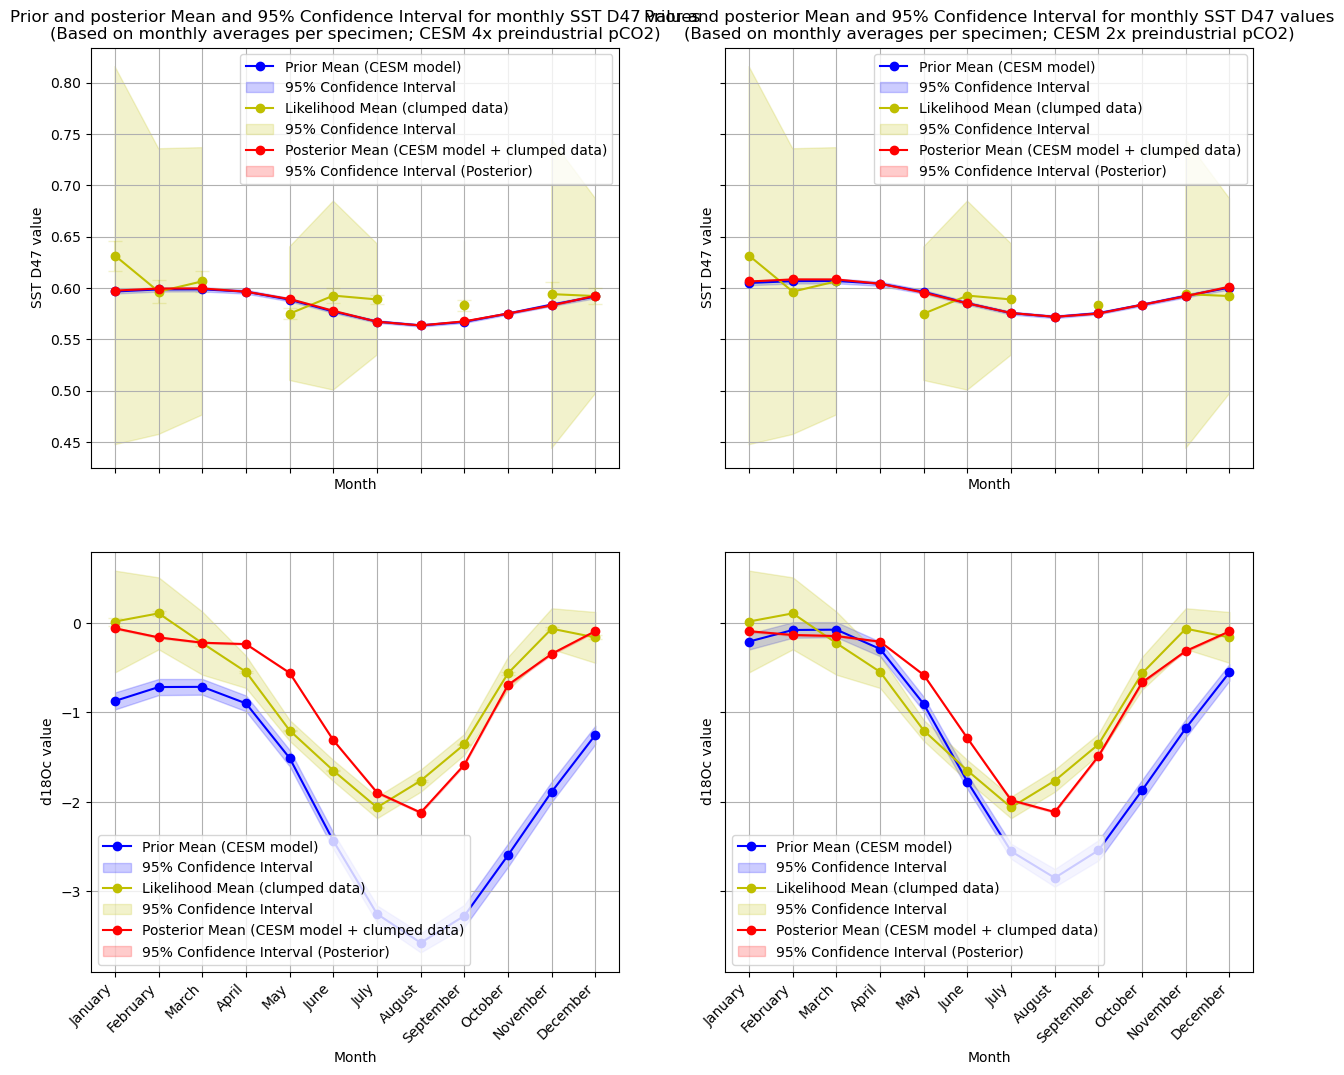

In [30]:
# Initialize subplots for monthly results
fig, axs = plt.subplots(2, 2, figsize=(15, 12), sharex=True, sharey="row")

# --- D47 ---

# --- CESM 4x preindustrial pCO2 scenario ---

# Plot the updated monthly posterior for SST_D47
std_post_CESM_4PIC_SST_D47 = np.sqrt(np.diag(cov_post_CESM_4PIC_SST_D47))
std_post_CESM_2PIC_SST_D47 = np.sqrt(np.diag(cov_post_CESM_2PIC_SST_D47))
std_prior_CESM_4PIC_SST_D47_monthly_original = np.sqrt(np.diag(cov_prior_CESM_4PIC_SST_D47_monthly_original))
std_prior_CESM_2PIC_SST_D47_monthly_original = np.sqrt(np.diag(cov_prior_CESM_2PIC_SST_D47_monthly_original))
var_start_D47_monthly = var_names.index("D47_mean") * num_bins_monthly # Determine the start index for the D47 variable
var_end_D47_monthly = var_start_D47_monthly + num_bins_monthly # Determine the end index for the D47 variable
n_update_CESM_4PIC_D47 = n_update_CESM_4PIC[var_start_D47_monthly:var_end_D47_monthly]  # Extract the number of updates for D47
n_update_CESM_2PIC_D47 = n_update_CESM_2PIC[var_start_D47_monthly:var_end_D47_monthly]  # Extract the number of updates for D47

# PRIOR
axs[0, 0].plot(months_scale, mu_prior_CESM_4PIC_SST_D47_monthly_original, label='Prior Mean (CESM model)', color='b', marker='o')
axs[0, 0].fill_between(
    months_scale,
    mu_prior_CESM_4PIC_SST_D47_monthly_original - stats.t.ppf(1 - 0.025, n_models_CESM_4PIC_monthly) * std_prior_CESM_4PIC_SST_D47_monthly_original / np.sqrt(n_models_CESM_4PIC_monthly),
    mu_prior_CESM_4PIC_SST_D47_monthly_original + stats.t.ppf(1 - 0.025, n_models_CESM_4PIC_monthly) * std_prior_CESM_4PIC_SST_D47_monthly_original / np.sqrt(n_models_CESM_4PIC_monthly),
    color='b',
    alpha=0.2,
    label='95% Confidence Interval'
)

# LIKELIHOOD
# Determine the start and end indices for the selected variable to parse information from the likelihood statistics
axs[0, 0].plot(months_scale, mu_likelihood[var_start_D47_monthly:var_end_D47_monthly], label='Likelihood Mean (clumped data)', color='y', marker='o')
axs[0, 0].fill_between(
    months_scale,
    mu_likelihood[var_start_D47_monthly:var_end_D47_monthly] - stats.t.ppf(1 - 0.025, n_update_CESM_4PIC_D47) * std_likelihood[var_start_D47_monthly:var_end_D47_monthly] / np.sqrt(n_update_CESM_4PIC_D47),
    mu_likelihood[var_start_D47_monthly:var_end_D47_monthly] + stats.t.ppf(1 - 0.025, n_update_CESM_4PIC_D47) * std_likelihood[var_start_D47_monthly:var_end_D47_monthly] / np.sqrt(n_update_CESM_4PIC_D47),
    color='y',
    alpha=0.2,
    label='95% Confidence Interval'
)
for measurement in Lutetian_data_monthly_aggregated_dict:
    axs[0, 0].plot(measurement["month_score"] + 1, measurement["D47_mean"], color="y", marker="o", alpha=0.2)
    axs[0, 0].errorbar(measurement["month_score"] + 1, measurement["D47_mean"], yerr=measurement["D47_SD"], color="y", alpha=0.2, capsize=5)

# POSTERIOR
axs[0, 0].plot(months_scale, mu_post_CESM_4PIC_SST_D47, label='Posterior Mean (CESM model + clumped data)', color='r', marker='o')
axs[0, 0].fill_between(
    months_scale,
    mu_post_CESM_4PIC_SST_D47 - stats.t.ppf(1 - 0.025, (n_update_CESM_4PIC_D47 + n_models_CESM_4PIC_monthly)) * std_post_CESM_4PIC_SST_D47 / np.sqrt(n_update_CESM_4PIC_D47 + n_models_CESM_4PIC_monthly),
    mu_post_CESM_4PIC_SST_D47 + stats.t.ppf(1 - 0.025, (n_update_CESM_4PIC_D47 + n_models_CESM_4PIC_monthly)) * std_post_CESM_4PIC_SST_D47 / np.sqrt(n_update_CESM_4PIC_D47 + n_models_CESM_4PIC_monthly),
    color='r',
    alpha=0.2,
    label='95% Confidence Interval (Posterior)'
)

# Formatting
axs[0, 0].set_xticks(months_scale, month_names)
axs[0, 0].set_title('Prior and posterior Mean and 95% Confidence Interval for monthly SST D47 values\n(Based on monthly averages per specimen; CESM 4x preindustrial pCO2)')
axs[0, 0].set_xlabel('Month')
axs[0, 0].set_ylabel('SST D47 value')
axs[0, 0].legend()
axs[0, 0].grid(True)

# --- CESM 2x preindustrial pCO2 scenario ---

# PRIOR
axs[0, 1].plot(months_scale, mu_prior_CESM_2PIC_SST_D47_monthly_original, label='Prior Mean (CESM model)', color='b', marker='o')
axs[0, 1].fill_between(
    months_scale,
    mu_prior_CESM_2PIC_SST_D47_monthly_original - stats.t.ppf(1 - 0.025, n_models_CESM_2PIC_monthly) * std_prior_CESM_2PIC_SST_D47_monthly_original / np.sqrt(n_models_CESM_2PIC_monthly),
    mu_prior_CESM_2PIC_SST_D47_monthly_original + stats.t.ppf(1 - 0.025, n_models_CESM_2PIC_monthly) * std_prior_CESM_2PIC_SST_D47_monthly_original / np.sqrt(n_models_CESM_2PIC_monthly),
    color='b',
    alpha=0.2,
    label='95% Confidence Interval'
)

# LIKELIHOOD
axs[0, 1].plot(months_scale, mu_likelihood[var_start_D47_monthly:var_end_D47_monthly], label='Likelihood Mean (clumped data)', color='y', marker='o')
axs[0, 1].fill_between(
    months_scale,
    mu_likelihood[var_start_D47_monthly:var_end_D47_monthly] - stats.t.ppf(1 - 0.025, n_update_CESM_2PIC_D47) * std_likelihood[var_start_D47_monthly:var_end_D47_monthly] / np.sqrt(n_update_CESM_2PIC_D47),
    mu_likelihood[var_start_D47_monthly:var_end_D47_monthly] + stats.t.ppf(1 - 0.025, n_update_CESM_2PIC_D47) * std_likelihood[var_start_D47_monthly:var_end_D47_monthly] / np.sqrt(n_update_CESM_2PIC_D47),
    color='y',
    alpha=0.2,
    label='95% Confidence Interval'
)

# POSTERIOR
axs[0, 1].plot(months_scale, mu_post_CESM_2PIC_SST_D47, label='Posterior Mean (CESM model + clumped data)', color='r', marker='o')
axs[0, 1].fill_between(
    months_scale,
    mu_post_CESM_2PIC_SST_D47 - stats.t.ppf(1 - 0.025, (n_update_CESM_2PIC_D47 + n_models_CESM_2PIC_monthly)) * std_post_CESM_2PIC_SST_D47 / np.sqrt(n_update_CESM_2PIC_D47 + n_models_CESM_2PIC_monthly),
    mu_post_CESM_2PIC_SST_D47 + stats.t.ppf(1 - 0.025, (n_update_CESM_2PIC_D47 + n_models_CESM_2PIC_monthly)) * std_post_CESM_2PIC_SST_D47 / np.sqrt(n_update_CESM_2PIC_D47 + n_models_CESM_2PIC_monthly),
    color='r',
    alpha=0.2,
    label='95% Confidence Interval (Posterior)'
)

# Formatting
axs[0, 1].set_xticks(months_scale, month_names)
axs[0, 1].set_title('Prior and posterior Mean and 95% Confidence Interval for monthly SST D47 values\n(Based on monthly averages per specimen; CESM 2x preindustrial pCO2)')
axs[0, 1].set_xlabel('Month')
axs[0, 1].set_ylabel('SST D47 value')
axs[0, 1].legend()
axs[0, 1].grid(True)

# ---d18Oc---

# --- CESM 4x preindustrial pCO2 scenario ---

# Plot the updated monthly posterior for d18Oc
std_post_CESM_4PIC_d18Oc = np.sqrt(np.diag(cov_post_CESM_4PIC_d18Oc))
std_post_CESM_2PIC_d18Oc = np.sqrt(np.diag(cov_post_CESM_2PIC_d18Oc))
std_prior_CESM_4PIC_d18Oc_monthly_original = np.sqrt(np.diag(cov_prior_CESM_4PIC_d18Oc_monthly_original))
std_prior_CESM_2PIC_d18Oc_monthly_original = np.sqrt(np.diag(cov_prior_CESM_2PIC_d18Oc_monthly_original))
var_start_d18Oc_monthly = var_names.index("d18O") * num_bins_monthly # Determine the start index for the d18Oc variable
var_end_d18Oc_monthly = var_start_d18Oc_monthly + num_bins_monthly # Determine the end index for the d18Oc variable
n_update_CESM_4PIC_d18Oc = n_update_CESM_4PIC[var_start_d18Oc_monthly:var_end_d18Oc_monthly]  # Extract the number of updates for d18Oc
n_update_CESM_2PIC_d18Oc = n_update_CESM_2PIC[var_start_d18Oc_monthly:var_end_d18Oc_monthly]  # Extract the number of updates for d18Oc

# PRIOR
axs[1, 0].plot(months_scale, mu_prior_CESM_4PIC_d18Oc_monthly_original, label='Prior Mean (CESM model)', color='b', marker='o')
axs[1, 0].fill_between(
    months_scale,
    mu_prior_CESM_4PIC_d18Oc_monthly_original - stats.t.ppf(1 - 0.025, n_models_CESM_4PIC_monthly) * std_prior_CESM_4PIC_d18Oc_monthly_original / np.sqrt(n_models_CESM_4PIC_monthly),
    mu_prior_CESM_4PIC_d18Oc_monthly_original + stats.t.ppf(1 - 0.025, n_models_CESM_4PIC_monthly) * std_prior_CESM_4PIC_d18Oc_monthly_original / np.sqrt(n_models_CESM_4PIC_monthly),
    color='b',
    alpha=0.2,
    label='95% Confidence Interval'
)

# LIKELIHOOD
# Determine the start and end indices for the selected variable
axs[1, 0].plot(months_scale, mu_likelihood[var_start_d18Oc_monthly:var_end_d18Oc_monthly], label='Likelihood Mean (clumped data)', color='y', marker='o')
axs[1, 0].fill_between(
    months_scale,
    mu_likelihood[var_start_d18Oc_monthly:var_end_d18Oc_monthly] - stats.t.ppf(1 - 0.025, n_update_CESM_4PIC_d18Oc) * std_likelihood[var_start_d18Oc_monthly:var_end_d18Oc_monthly] / np.sqrt(n_update_CESM_4PIC_d18Oc),
    mu_likelihood[var_start_d18Oc_monthly:var_end_d18Oc_monthly] + stats.t.ppf(1 - 0.025, n_update_CESM_4PIC_d18Oc) * std_likelihood[var_start_d18Oc_monthly:var_end_d18Oc_monthly] / np.sqrt(n_update_CESM_4PIC_d18Oc),
    color='y',
    alpha=0.2,
    label='95% Confidence Interval'
)
for measurement in Lutetian_data_monthly_aggregated_dict:
    axs[1, 0].plot(measurement["month_score"] + 1, measurement["d18O"], color="y", marker="o", alpha=0.2)
    axs[1, 0].errorbar(measurement["month_score"] + 1, measurement["d18O"], yerr=measurement["d18O_SD"], color="y", alpha=0.2, capsize=5)

# POSTERIOR
axs[1, 0].plot(months_scale, mu_post_CESM_4PIC_d18Oc, label='Posterior Mean (CESM model + clumped data)', color='r', marker='o')
axs[1, 0].fill_between(
    months_scale,
    mu_post_CESM_4PIC_d18Oc - stats.t.ppf(1 - 0.025, (n_update_CESM_4PIC_d18Oc + n_models_CESM_4PIC_monthly)) * std_post_CESM_4PIC_d18Oc / np.sqrt(n_update_CESM_4PIC_d18Oc + n_models_CESM_4PIC_monthly),
    mu_post_CESM_4PIC_d18Oc + stats.t.ppf(1 - 0.025, (n_update_CESM_4PIC_d18Oc + n_models_CESM_4PIC_monthly)) * std_post_CESM_4PIC_d18Oc / np.sqrt(n_update_CESM_4PIC_d18Oc + n_models_CESM_4PIC_monthly),
    color='r',
    alpha=0.2,
    label='95% Confidence Interval (Posterior)'
)

# Formatting
axs[1, 0].set_xticks(months_scale, month_names, rotation=45, ha='right')
axs[1, 0].set_xlabel('Month')
axs[1, 0].set_ylabel('d18Oc value')
axs[1, 0].legend()
axs[1, 0].grid(True)

# --- CESM 2x preindustrial pCO2 scenario ---

# PRIOR
axs[1, 1].plot(months_scale, mu_prior_CESM_2PIC_d18Oc_monthly_original, label='Prior Mean (CESM model)', color='b', marker='o')
axs[1, 1].fill_between(
    months_scale,
    mu_prior_CESM_2PIC_d18Oc_monthly_original - stats.t.ppf(1 - 0.025, n_models_CESM_2PIC_monthly) * std_prior_CESM_2PIC_d18Oc_monthly_original / np.sqrt(n_models_CESM_2PIC_monthly),
    mu_prior_CESM_2PIC_d18Oc_monthly_original + stats.t.ppf(1 - 0.025, n_models_CESM_2PIC_monthly) * std_prior_CESM_2PIC_d18Oc_monthly_original / np.sqrt(n_models_CESM_2PIC_monthly),
    color='b',
    alpha=0.2,
    label='95% Confidence Interval'
)

# LIKELIHOOD
axs[1, 1].plot(months_scale, mu_likelihood[var_start_d18Oc_monthly:var_end_d18Oc_monthly], label='Likelihood Mean (clumped data)', color='y', marker='o')
axs[1, 1].fill_between(
    months_scale,
    mu_likelihood[var_start_d18Oc_monthly:var_end_d18Oc_monthly] - stats.t.ppf(1 - 0.025, n_update_CESM_2PIC_d18Oc) * std_likelihood[var_start_d18Oc_monthly:var_end_d18Oc_monthly] / np.sqrt(n_update_CESM_2PIC_d18Oc),
    mu_likelihood[var_start_d18Oc_monthly:var_end_d18Oc_monthly] + stats.t.ppf(1 - 0.025, n_update_CESM_2PIC_d18Oc) * std_likelihood[var_start_d18Oc_monthly:var_end_d18Oc_monthly] / np.sqrt(n_update_CESM_2PIC_d18Oc),
    color='y',
    alpha=0.2,
    label='95% Confidence Interval'
)

# POSTERIOR
axs[1, 1].plot(months_scale, mu_post_CESM_2PIC_d18Oc, label='Posterior Mean (CESM model + clumped data)', color='r', marker='o')
axs[1, 1].fill_between(
    months_scale,
    mu_post_CESM_2PIC_d18Oc - stats.t.ppf(1 - 0.025, (n_update_CESM_2PIC_d18Oc + n_models_CESM_2PIC_monthly)) * std_post_CESM_2PIC_d18Oc / np.sqrt(n_update_CESM_2PIC_d18Oc + n_models_CESM_2PIC_monthly),
    mu_post_CESM_2PIC_d18Oc + stats.t.ppf(1 - 0.025, (n_update_CESM_2PIC_d18Oc + n_models_CESM_2PIC_monthly)) * std_post_CESM_2PIC_d18Oc / np.sqrt(n_update_CESM_2PIC_d18Oc + n_models_CESM_2PIC_monthly),
    color='r',
    alpha=0.2,
    label='95% Confidence Interval (Posterior)'
)

# Formatting
axs[1, 1].set_xticks(months_scale, month_names, rotation=45, ha='right')
axs[1, 1].set_xlabel('Month')
axs[1, 1].set_ylabel('d18Oc value')
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.show()

# PLOT PRIOR AND LIKELIHOOD FOR MANUSCRIPT

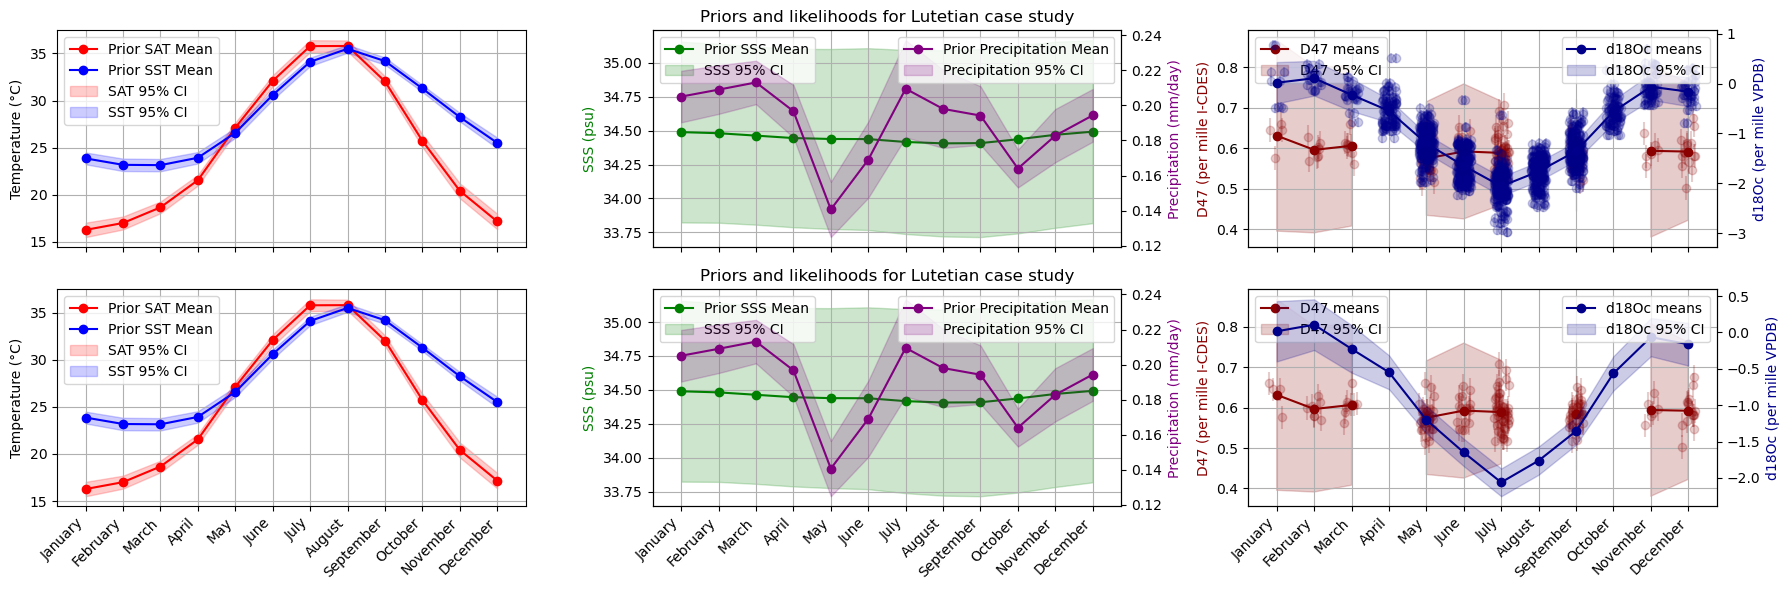

In [31]:
# Set dimensions of data
n_models_monthly = len(Lutetian_CESM_4PIC_model["Cell"])  # Find the total number of models

# Create list of month names
months = ['ja', 'fb', 'mr', 'ar', 'my', 'jn', 'jl', 'ag', 'sp', 'ot', 'nv', 'dc']

# Create a monthly scale for the x-axis
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']  # List full month names
months_scale = np.arange(len(months)) + 1  # Create monthly scale

# Create the figure and axes
fig, axes = plt.subplots(2, 3, figsize=(18, 6), sharex=True)

# Start with DA based on CESM model outcomes with 4x preindustrial pCO2 forcing

# Panel 1: Plot the prior distribution for SST and SAT
axes[0, 0].plot(months_scale, mu_prior_CESM_4PIC_SAT_monthly, label='Prior SAT Mean', marker='o', color='r')
axes[0, 0].plot(months_scale, mu_prior_CESM_4PIC_SST_monthly, label='Prior SST Mean', marker='o', color='b')

# Add 95% confidence intervals for SAT
axes[0, 0].fill_between(
    months_scale,
    mu_prior_CESM_4PIC_SAT_monthly - stats.t.ppf(1 - 0.025, n_models_CESM_4PIC_monthly) * std_prior_CESM_4PIC_SAT_monthly / np.sqrt(n_models_CESM_4PIC_monthly),
    mu_prior_CESM_4PIC_SAT_monthly + stats.t.ppf(1 - 0.025, n_models_CESM_4PIC_monthly) * std_prior_CESM_4PIC_SAT_monthly / np.sqrt(n_models_CESM_4PIC_monthly),
    alpha=0.2, color='r', label='SAT 95% CI'
)

# Add 95% confidence intervals for SST
axes[0, 0].fill_between(
    months_scale,
    mu_prior_CESM_4PIC_SST_monthly - stats.t.ppf(1 - 0.025, n_models_CESM_4PIC_monthly) * std_prior_CESM_4PIC_SST_monthly / np.sqrt(n_models_CESM_4PIC_monthly),
    mu_prior_CESM_4PIC_SST_monthly + stats.t.ppf(1 - 0.025, n_models_CESM_4PIC_monthly) * std_prior_CESM_4PIC_SST_monthly / np.sqrt(n_models_CESM_4PIC_monthly),
    alpha=0.2, color='b', label='SST 95% CI'
)

# axes[0].set_title('Prior Mean and 95% Confidence Interval for Monthly SST & SAT Values')
axes[0, 0].set_ylabel('Temperature (°C)')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Panel 2: Plot the prior distribution for SSS and precipitation
axes[0, 1].plot(months_scale, mu_prior_CESM_4PIC_SSS_monthly, label='Prior SSS Mean', marker='o', color='g')
ax2 = axes[0, 1].twinx()  # Create a secondary y-axis for precipitation
ax2.plot(months_scale, mu_prior_CESM_4PIC_precip_monthly, label='Prior Precipitation Mean', marker='o', color='purple')

# Add 95% confidence intervals for SSS
axes[0, 1].fill_between(
    months_scale,
    mu_prior_CESM_4PIC_SSS_monthly - stats.t.ppf(1 - 0.025, n_models_CESM_4PIC_monthly) * std_prior_CESM_4PIC_SSS_monthly / np.sqrt(n_models_CESM_4PIC_monthly),
    mu_prior_CESM_4PIC_SSS_monthly + stats.t.ppf(1 - 0.025, n_models_CESM_4PIC_monthly) * std_prior_CESM_4PIC_SSS_monthly / np.sqrt(n_models_CESM_4PIC_monthly),
    alpha=0.2, color='g', label='SSS 95% CI'
)

# Add 95% confidence intervals for precipitation
ax2.fill_between(
    months_scale,
    mu_prior_CESM_4PIC_precip_monthly - stats.t.ppf(1 - 0.025, n_models_CESM_4PIC_monthly) * std_prior_CESM_4PIC_precip_monthly / np.sqrt(n_models_CESM_4PIC_monthly),
    mu_prior_CESM_4PIC_precip_monthly + stats.t.ppf(1 - 0.025, n_models_CESM_4PIC_monthly) * std_prior_CESM_4PIC_precip_monthly / np.sqrt(n_models_CESM_4PIC_monthly),
    alpha=0.2, color='purple', label='Precipitation 95% CI'
)

axes[0, 1].set_ylabel('SSS (psu)', color='g')
ax2.set_ylabel('Precipitation (mm/day)', color='purple')
axes[0, 1].set_title('Priors and likelihoods for Lutetian case study')
axes[0, 1].legend(loc='upper left')
ax2.legend(loc='upper right')
axes[0, 1].grid(True)

# Panel 3: Plot the likelihood distribution for D47 and d18Oc measurements
# Plot individual (non-aggregated) measurements with uncertainties
ax3 = axes[0, 2].twinx()  # secondary y-axis for d18Oc

# Plot D47 likelihood
# Determine the start and end indices for the selected variable to parse information from the likelihood statistics
axes[0, 2].plot(months_scale, mu_likelihood[var_start_D47_monthly:var_end_D47_monthly], marker='o', label='D47 means', color='darkred')
axes[0, 2].fill_between(
    months_scale,
    mu_likelihood[var_start_D47_monthly:var_end_D47_monthly] - 1.96 * np.sqrt(std_likelihood[var_start_D47_monthly:var_end_D47_monthly]),
    mu_likelihood[var_start_D47_monthly:var_end_D47_monthly] + 1.96 * np.sqrt(std_likelihood[var_start_D47_monthly:var_end_D47_monthly]),
    color='darkred',
    alpha=0.2,
    label='D47 95% CI'
)
for measurement in Lutetian_data_dict:
    x_jitter = measurement["month_score"] + 1 + np.random.uniform(-0.2, 0.2)
    axes[0, 2].plot(x_jitter, measurement["D47_final"], color="darkred", marker="o", alpha=0.2)
    axes[0, 2].errorbar(x_jitter, measurement["D47_final"], yerr=measurement["D47_SD"], color="darkred", alpha=0.2)

# Plot d18Oc likelihood
# Determine the start and end indices for the selected variable
ax3.plot(months_scale, mu_likelihood[var_start_d18Oc_monthly:var_end_d18Oc_monthly], marker='o', label='d18Oc means', color='darkblue')
ax3.fill_between(
    months_scale,
    mu_likelihood[var_start_d18Oc_monthly:var_end_d18Oc_monthly] - 1.96 * np.sqrt(std_likelihood[var_start_d18Oc_monthly:var_end_d18Oc_monthly]),
    mu_likelihood[var_start_d18Oc_monthly:var_end_d18Oc_monthly] + 1.96 * np.sqrt(std_likelihood[var_start_d18Oc_monthly:var_end_d18Oc_monthly]),
    color='darkblue',
    alpha=0.2,
    label='d18Oc 95% CI'
)
for measurement in Lutetian_data_dict:
    x_jitter = measurement["month_score"] + 1 + np.random.uniform(-0.2, 0.2)
    ax3.plot(x_jitter, measurement["d18O"], color="darkblue", marker="o", alpha=0.2)
    ax3.errorbar(x_jitter, measurement["d18O"], yerr=measurement["d18O_SD"], color="darkblue", alpha=0.2)

axes[0, 2].set_ylabel('D47 (per mille I-CDES)', color='darkred')
ax3.set_ylabel('d18Oc (per mille VPDB)', color='darkblue')
axes[0, 2].legend(loc='upper left')
ax3.legend(loc='upper right')
axes[0, 2].grid(True)

# # Update the x-axis with month names
axes[0, 0].set_xticks(months_scale)
axes[0, 0].set_xticklabels(month_names, rotation=45, ha="right")
axes[0, 1].set_xticklabels(month_names, rotation=45, ha="right")
axes[0, 2].set_xticklabels(month_names, rotation=45, ha="right")

# Fill lower row of plot with DA outcomes based on CESM model with 2x preindustrial pCO2 forcing

# Panel 1: Plot the prior distribution for SST and SAT
axes[1, 0].plot(months_scale, mu_prior_CESM_4PIC_SAT_monthly, label='Prior SAT Mean', marker='o', color='r')
axes[1, 0].plot(months_scale, mu_prior_CESM_4PIC_SST_monthly, label='Prior SST Mean', marker='o', color='b')

# Add 95% confidence intervals for SAT
axes[1, 0].fill_between(
    months_scale,
    mu_prior_CESM_4PIC_SAT_monthly - stats.t.ppf(1 - 0.025, n_models_CESM_4PIC_monthly) * std_prior_CESM_4PIC_SAT_monthly / np.sqrt(n_models_CESM_4PIC_monthly),
    mu_prior_CESM_4PIC_SAT_monthly + stats.t.ppf(1 - 0.025, n_models_CESM_4PIC_monthly) * std_prior_CESM_4PIC_SAT_monthly / np.sqrt(n_models_CESM_4PIC_monthly),
    alpha=0.2, color='r', label='SAT 95% CI'
)

# Add 95% confidence intervals for SST
axes[1, 0].fill_between(
    months_scale,
    mu_prior_CESM_4PIC_SST_monthly - stats.t.ppf(1 - 0.025, n_models_CESM_4PIC_monthly) * std_prior_CESM_4PIC_SST_monthly / np.sqrt(n_models_CESM_4PIC_monthly),
    mu_prior_CESM_4PIC_SST_monthly + stats.t.ppf(1 - 0.025, n_models_CESM_4PIC_monthly) * std_prior_CESM_4PIC_SST_monthly / np.sqrt(n_models_CESM_4PIC_monthly),
    alpha=0.2, color='b', label='SST 95% CI'
)

# axes[0].set_title('Prior Mean and 95% Confidence Interval for Monthly SST & SAT Values')
axes[1, 0].set_ylabel('Temperature (°C)')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Panel 2: Plot the prior distribution for SSS and precipitation
axes[1, 1].plot(months_scale, mu_prior_CESM_4PIC_SSS_monthly, label='Prior SSS Mean', marker='o', color='g')
ax4 = axes[1, 1].twinx()  # Create a secondary y-axis for precipitation
ax4.plot(months_scale, mu_prior_CESM_4PIC_precip_monthly, label='Prior Precipitation Mean', marker='o', color='purple')

# Add 95% confidence intervals for SSS
axes[1, 1].fill_between(
    months_scale,
    mu_prior_CESM_4PIC_SSS_monthly - stats.t.ppf(1 - 0.025, n_models_CESM_4PIC_monthly) * std_prior_CESM_4PIC_SSS_monthly / np.sqrt(n_models_CESM_4PIC_monthly),
    mu_prior_CESM_4PIC_SSS_monthly + stats.t.ppf(1 - 0.025, n_models_CESM_4PIC_monthly) * std_prior_CESM_4PIC_SSS_monthly / np.sqrt(n_models_CESM_4PIC_monthly),
    alpha=0.2, color='g', label='SSS 95% CI'
)

# Add 95% confidence intervals for precipitation
ax4.fill_between(
    months_scale,
    mu_prior_CESM_4PIC_precip_monthly - stats.t.ppf(1 - 0.025, n_models_CESM_4PIC_monthly) * std_prior_CESM_4PIC_precip_monthly / np.sqrt(n_models_CESM_4PIC_monthly),
    mu_prior_CESM_4PIC_precip_monthly + stats.t.ppf(1 - 0.025, n_models_CESM_4PIC_monthly) * std_prior_CESM_4PIC_precip_monthly / np.sqrt(n_models_CESM_4PIC_monthly),
    alpha=0.2, color='purple', label='Precipitation 95% CI'
)

axes[1, 1].set_ylabel('SSS (psu)', color='g')
ax4.set_ylabel('Precipitation (mm/day)', color='purple')
axes[1, 1].set_title('Priors and likelihoods for Lutetian case study')
axes[1, 1].legend(loc='upper left')
ax4.legend(loc='upper right')
axes[1, 1].grid(True)

# Panel 3: Plot the likelihood distribution for D47 and d18Oc measurements
# Plot individual (non-aggregated) measurements with uncertainties
ax5 = axes[1, 2].twinx()  # secondary y-axis for d18Oc

# Plot D47 likelihood
# Determine the start and end indices for the selected variable to parse information from the likelihood statistics
axes[1, 2].plot(months_scale, mu_likelihood[var_start_D47_monthly:var_end_D47_monthly], marker='o', label='D47 means', color='darkred')
axes[1, 2].fill_between(
    months_scale,
    mu_likelihood[var_start_D47_monthly:var_end_D47_monthly] - 1.96 * np.sqrt(std_likelihood[var_start_D47_monthly:var_end_D47_monthly]),
    mu_likelihood[var_start_D47_monthly:var_end_D47_monthly] + 1.96 * np.sqrt(std_likelihood[var_start_D47_monthly:var_end_D47_monthly]),
    color='darkred',
    alpha=0.2,
    label='D47 95% CI'
)
for measurement in Lutetian_data_dict:
    x_jitter = measurement["month_score"] + 1 + np.random.uniform(-0.2, 0.2)
    axes[1, 2].plot(x_jitter, measurement["D47_final"], color="darkred", marker="o", alpha=0.2)
    axes[1, 2].errorbar(x_jitter, measurement["D47_final"], yerr=measurement["D47_SD"], color="darkred", alpha=0.2)

# Plot d18Oc likelihood
# Determine the start and end indices for the selected variable
ax5.plot(months_scale, mu_likelihood[var_start_d18Oc_monthly:var_end_d18Oc_monthly], marker='o', label='d18Oc means', color='darkblue')
ax5.fill_between(
    months_scale,
    mu_likelihood[var_start_d18Oc_monthly:var_end_d18Oc_monthly] - 1.96 * np.sqrt(std_likelihood[var_start_d18Oc_monthly:var_end_d18Oc_monthly]),
    mu_likelihood[var_start_d18Oc_monthly:var_end_d18Oc_monthly] + 1.96 * np.sqrt(std_likelihood[var_start_d18Oc_monthly:var_end_d18Oc_monthly]),
    color='darkblue',
    alpha=0.2,
    label='d18Oc 95% CI'
)
for measurement in Lutetian_data_dict:
    x_jitter = measurement["month_score"] + 1 + np.random.uniform(-0.2, 0.2)
    ax3.plot(x_jitter, measurement["d18O"], color="darkblue", marker="o", alpha=0.2)
    ax3.errorbar(x_jitter, measurement["d18O"], yerr=measurement["d18O_SD"], color="darkblue", alpha=0.2)

axes[1, 2].set_ylabel('D47 (per mille I-CDES)', color='darkred')
ax5.set_ylabel('d18Oc (per mille VPDB)', color='darkblue')
axes[1, 2].legend(loc='upper left')
ax5.legend(loc='upper right')
axes[1, 2].grid(True)

# # Update the x-axis with month names
axes[1, 0].set_xticks(months_scale)
axes[1, 0].set_xticklabels(month_names, rotation=45, ha="right")
axes[1, 1].set_xticklabels(month_names, rotation=45, ha="right")
axes[1, 2].set_xticklabels(month_names, rotation=45, ha="right")

# Set tight layout
plt.tight_layout()

# POSTERIOR - MONTHLY

## Monthly posterior in temperature and salinity domains with aggregated data
* Data and model outcomes assembled per month
* Ignore sclero-dating uncertainty
* D47 data aggregated in monthly bins prior to assembly

### Convert monthly prior, likelihood and posterior to temperature and salinity and plot

To calculate the covariance matrices for d18Ow based on covariance between d18Oc values for the equations of Grossman and Ku and Lecuyer et al. the following approach is followed:
* Original formula: T = B - A * (d18Oc - d18Ow) (+ 0.27 for Grossman and Ku, but this term is irrelavant for covariance; A and B different per calibration equation)
First solve for d18Ow:
* d18Ow (in VSMOW) = d18Oc - (B - T) / A (+ 0.27)
* Partial derivative 1: d(d18Ow)/d(d18Oc) = 1
* Partial derivative 2: d(d18Ow)/d(T) = 1 / A
* cov(d18Ow) = d(d18Ow)/d(d18Oc) ^ 2 * cov(d18Oc) + d(d18Ow)/d(d18Oc) * d(d18Ow)/d(T) * crosscov(d18Oc, T) * transpose(crosscov(d18Oc, T)) + d(d18Ow)/d(T) ^ 2 * cov(T)

In [32]:
# Function to propagate covariance on d18Ow in case of linear d18Oc-d18Ow-T equation
def propagate_cov_d18Ow_linear(cov_c, cov_T, cov_cT, A):
    """
    Propagate covariance for:
        w = c - (B - T)/A (+ 0.27)
    where A and B are scalars and the term 0.27 is used to convert between SMOW and VSMOW, but only A is relevant for covariance

    Inputs:
        cov_c  : (n,n) covariance matrix of d18Oc
        cov_T  : (n,n) covariance matrix of T
        cov_cT : (n,n) cross-covariance matrix Cov(c,T)
        A      : scalar (slope)

    Returns:
        cov_w : (n,n) covariance matrix of d18Ow
    """

    dwdc = 1.0
    dwdT = 1.0 / A

    cov_w = (
        dwdc**2 * cov_c
        + dwdc * dwdT * (cov_cT + cov_cT.T)
        + dwdT**2 * cov_T
    )

    return cov_w

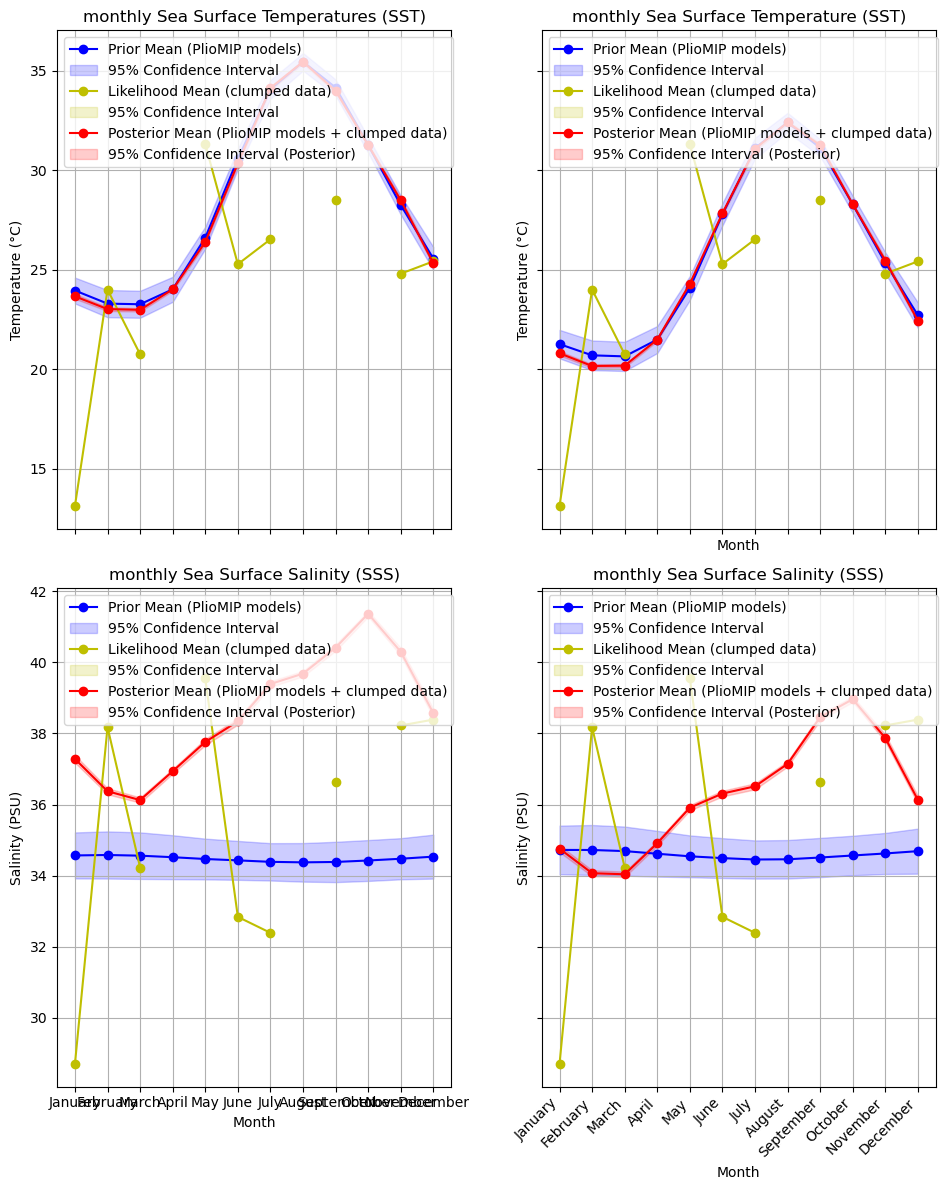

In [40]:
# Convert prior D47 to temp
mu_prior_CESM_4PIC_SST_D47_monthly_T = D47c.OGLS23.T47(D47 = mu_prior_CESM_4PIC_SST_D47_monthly_original, sD47 = cov_prior_CESM_4PIC_SST_D47_monthly_original, return_covar = True)[0]
mu_prior_CESM_2PIC_SST_D47_monthly_T = D47c.OGLS23.T47(D47 = mu_prior_CESM_2PIC_SST_D47_monthly_original, sD47 = cov_prior_CESM_2PIC_SST_D47_monthly_original, return_covar = True)[0]
cov_prior_CESM_4PIC_SST_D47_monthly_T = D47c.OGLS23.T47(D47 = mu_prior_CESM_4PIC_SST_D47_monthly_original, sD47 = cov_prior_CESM_4PIC_SST_D47_monthly_original, return_covar = True)[1]
cov_prior_CESM_2PIC_SST_D47_monthly_T = D47c.OGLS23.T47(D47 = mu_prior_CESM_2PIC_SST_D47_monthly_original, sD47 = cov_prior_CESM_2PIC_SST_D47_monthly_original, return_covar = True)[1]

# Convert prior d18Oc and temperature to d18Ow
mu_prior_CESM_4PIC_d18Ow_monthly_T = mu_prior_CESM_4PIC_d18Oc_monthly_original - (20.6 - mu_prior_CESM_4PIC_SST_D47_monthly_T) / 4.34 + 0.27
mu_prior_CESM_2PIC_d18Ow_monthly_T = mu_prior_CESM_2PIC_d18Oc_monthly_original - (20.6 - mu_prior_CESM_2PIC_SST_D47_monthly_T) / 4.34 + 0.27
# Calculate d18Oc-SST cross-covariance matrix
cross_cov_prior_CESM_4PIC_d18Oc_SST_monthly = np.cov(Lutetian_CESM_4PIC_model[SST_D47_CESM_4PIC_columns_monthly + d18Oc_CESM_4PIC_columns_monthly].dropna(), rowvar=False)[len(SST_D47_CESM_4PIC_columns_monthly):, :len(SST_D47_CESM_4PIC_columns_monthly)]
cross_cov_prior_CESM_2PIC_d18Oc_SST_monthly = np.cov(Lutetian_CESM_2PIC_model[SST_D47_CESM_2PIC_columns_monthly + d18Oc_CESM_2PIC_columns_monthly].dropna(), rowvar=False)[len(SST_D47_CESM_2PIC_columns_monthly):, :len(SST_D47_CESM_2PIC_columns_monthly)]
# Propagate covariance
cov_prior_CESM_4PIC_d18Ow_monthly_T = propagate_cov_d18Ow_linear(cov_prior_CESM_4PIC_d18Oc_monthly_original, cov_prior_CESM_4PIC_SST_D47_monthly_T, cross_cov_prior_CESM_4PIC_d18Oc_SST_monthly, 4.34)
cov_prior_CESM_2PIC_d18Ow_monthly_T = propagate_cov_d18Ow_linear(cov_prior_CESM_2PIC_d18Oc_monthly_original, cov_prior_CESM_2PIC_SST_D47_monthly_T, cross_cov_prior_CESM_2PIC_d18Oc_SST_monthly, 4.34)

# Convert prior d18Ow to SSS
mu_prior_CESM_4PIC_SSS_d18Ow_monthly_T = (mu_prior_CESM_4PIC_d18Ow_monthly_T + 9.300) / 0.274
mu_prior_CESM_2PIC_SSS_d18Ow_monthly_T = (mu_prior_CESM_2PIC_d18Ow_monthly_T + 9.300) / 0.274
cov_prior_CESM_4PIC_SSS_d18Ow_monthly_T = cov_prior_CESM_4PIC_d18Ow_monthly_T / (0.274 ** 2)
cov_prior_CESM_2PIC_SSS_d18Ow_monthly_T = cov_prior_CESM_2PIC_d18Ow_monthly_T / (0.274 ** 2)

# Convert likelihood D47 to temp
# FIXME: likelihood vectors contain NAs, need to handle that properly
mu_likelihood_T = D47c.OGLS23.T47(D47 = mu_likelihood[var_start_D47_monthly:var_end_D47_monthly], sD47 = std_likelihood[var_start_D47_monthly:var_end_D47_monthly], return_covar = True)[0]
cov_likelihood_T = D47c.OGLS23.T47(D47 = mu_likelihood[var_start_D47_monthly:var_end_D47_monthly], sD47 = std_likelihood[var_start_D47_monthly:var_end_D47_monthly], return_covar = True)[1]

# Convert likelihood d18Oc and temperature to d18Ow (curently not implemented in data tracking function)
mu_likelihood_d18Ow_T = mu_likelihood[var_start_d18Oc_monthly:var_end_d18Oc_monthly] - (20.6 - mu_likelihood_T) / 4.34 + 0.27
std_likelihood_d18Ow_T = np.sqrt(
    np.diag(
        propagate_cov_d18Ow_linear(
            np.diag(std_likelihood[var_start_d18Oc_monthly:var_end_d18Oc_monthly] ** 2),
            cov_likelihood_T,
            cross_cov_prior_CESM_4PIC_d18Oc_SST_monthly,
            4.34
        )
    )
)

# Convert likelihood d18Ow to SSS (currently not implemented in data tracking function)
mu_likelihood_SSS_d18Ow_T = (mu_likelihood_d18Ow_T + 9.300) / 0.274
std_likelihood_SSS_d18Ow_T = std_likelihood_d18Ow_T / (0.274 ** 2)

# Convert posterior D47 to temp
mu_post_CESM_4PIC_SST_D47_T = D47c.OGLS23.T47(D47 = mu_post_CESM_4PIC_SST_D47, sD47 = cov_post_CESM_4PIC_SST_D47, return_covar = True)[0]
mu_post_CESM_2PIC_SST_D47_T = D47c.OGLS23.T47(D47 = mu_post_CESM_2PIC_SST_D47, sD47 = cov_post_CESM_2PIC_SST_D47, return_covar = True)[0]
cov_post_CESM_4PIC_SST_D47_T = D47c.OGLS23.T47(D47 = mu_post_CESM_4PIC_SST_D47, sD47 = cov_post_CESM_4PIC_SST_D47, return_covar = True)[1]
cov_post_CESM_2PIC_SST_D47_T = D47c.OGLS23.T47(D47 = mu_post_CESM_2PIC_SST_D47, sD47 = cov_post_CESM_2PIC_SST_D47, return_covar = True)[1]

# Convert posterior d18Oc and temperature to d18Ow
mu_post_CESM_4PIC_d18Ow_T = mu_post_CESM_4PIC_d18Oc - (20.6 - mu_post_CESM_4PIC_SST_D47_T) / 4.34 + 0.27
mu_post_CESM_2PIC_d18Ow_T = mu_post_CESM_2PIC_d18Oc - (20.6 - mu_post_CESM_2PIC_SST_D47_T) / 4.34 + 0.27
# Propagate covariance
cov_post_CESM_4PIC_d18Ow_T = propagate_cov_d18Ow_linear(
    cov_post_CESM_4PIC_d18Oc,
    cov_post_CESM_4PIC_SST_D47_T,
    cross_cov_prior_CESM_4PIC_d18Oc_SST_monthly,
    4.34
)
cov_post_CESM_2PIC_d18Ow_T = propagate_cov_d18Ow_linear(
    cov_post_CESM_2PIC_d18Oc,
    cov_post_CESM_2PIC_SST_D47_T,
    cross_cov_prior_CESM_2PIC_d18Oc_SST_monthly,
    4.34
)

# Convert posterior d18Ow to SSS
mu_post_CESM_4PIC_SSS_d18Ow_T = (mu_post_CESM_4PIC_d18Ow_T + 9.300) / 0.274
mu_post_CESM_2PIC_SSS_d18Ow_T = (mu_post_CESM_2PIC_d18Ow_T + 9.300) / 0.274
cov_post_CESM_4PIC_SSS_d18Ow_T = cov_post_CESM_4PIC_d18Ow_T / (0.274 ** 2)
cov_post_CESM_2PIC_SSS_d18Ow_T = cov_post_CESM_2PIC_d18Ow_T / (0.274 ** 2)

# Plot in temperature domain
std_prior_CESM_4PIC_SST_D47_monthly_T = np.sqrt(np.diag(cov_prior_CESM_4PIC_SST_D47_monthly_T))
std_prior_CESM_2PIC_SST_D47_monthly_T = np.sqrt(np.diag(cov_prior_CESM_2PIC_SST_D47_monthly_T))
std_prior_CESM_4PIC_SSS_d18Ow_monthly_T = np.sqrt(np.diag(cov_prior_CESM_4PIC_SSS_d18Ow_monthly_T))
std_prior_CESM_2PIC_SSS_d18Ow_monthly_T = np.sqrt(np.diag(cov_prior_CESM_2PIC_SSS_d18Ow_monthly_T))
std_likelihood_T = np.sqrt(np.diag(cov_likelihood_T))
std_post_CESM_4PIC_SST_D47_T = np.sqrt(np.diag(cov_post_CESM_4PIC_SST_D47_T))
std_post_CESM_2PIC_SST_D47_T = np.sqrt(np.diag(cov_post_CESM_2PIC_SST_D47_T))
std_post_CESM_4PIC_SSS_d18Ow_T = np.sqrt(np.diag(cov_post_CESM_4PIC_SSS_d18Ow_T))
std_post_CESM_2PIC_SSS_d18Ow_T = np.sqrt(np.diag(cov_post_CESM_2PIC_SSS_d18Ow_T))

# Initiate plot
fig, axs = plt.subplots(2, 2, figsize=(10, 12), sharex=True, sharey="row")

# Start with DA based on CESM model outcomes with 4x preindustrial pCO2 forcing

# FIRST PANEL: SST Results
# PRIOR
axs[0, 0].plot(months_scale, mu_prior_CESM_4PIC_SST_D47_monthly_T, label='Prior Mean (PlioMIP models)', color='b', marker='o')
axs[0, 0].fill_between(months_scale,
    mu_prior_CESM_4PIC_SST_D47_monthly_T - stats.t.ppf(1 - 0.025, n_models_CESM_4PIC_monthly) * std_prior_CESM_4PIC_SST_D47_monthly_T / np.sqrt(n_models_CESM_4PIC_monthly),
    mu_prior_CESM_4PIC_SST_D47_monthly_T + stats.t.ppf(1 - 0.025, n_models_CESM_4PIC_monthly) * std_prior_CESM_4PIC_SST_D47_monthly_T / np.sqrt(n_models_CESM_4PIC_monthly),
    color='b', alpha=0.2, label='95% Confidence Interval')

# LIKELIHOOD
axs[0, 0].plot(months_scale, mu_likelihood_T, label='Likelihood Mean (clumped data)', color='y', marker='o')
axs[0, 0].fill_between(months_scale,
    mu_likelihood_T - stats.t.ppf(1 - 0.025, n_update_CESM_4PIC_D47) * std_likelihood_T / np.sqrt(n_update_CESM_4PIC_D47),
    mu_likelihood_T + stats.t.ppf(1 - 0.025, n_update_CESM_4PIC_D47) * std_likelihood_T / np.sqrt(n_update_CESM_4PIC_D47),
    color='y', alpha=0.2, label='95% Confidence Interval')

# POSTERIOR
axs[0, 0].plot(months_scale, mu_post_CESM_4PIC_SST_D47_T, label='Posterior Mean (PlioMIP models + clumped data)', color='r', marker='o')
axs[0, 0].fill_between(months_scale,
    mu_post_CESM_4PIC_SST_D47_T - stats.t.ppf(1 - 0.025, (n_update_CESM_4PIC_D47 + n_models_CESM_4PIC_monthly)) * std_post_CESM_4PIC_SST_D47_T / np.sqrt(n_update_CESM_4PIC_D47 + n_models_CESM_4PIC_monthly),
    mu_post_CESM_4PIC_SST_D47_T + stats.t.ppf(1 - 0.025, (n_update_CESM_4PIC_D47 + n_models_CESM_4PIC_monthly)) * std_post_CESM_4PIC_SST_D47_T / np.sqrt(n_update_CESM_4PIC_D47 + n_models_CESM_4PIC_monthly),
    color='r', alpha=0.2, label='95% Confidence Interval (Posterior)')

# Layout for SST panel
axs[0, 0].set_title('monthly Sea Surface Temperatures (SST)')
axs[0, 0].set_ylabel('Temperature (°C)')
axs[0, 0].legend(loc='upper left')
axs[0, 0].grid(True)
axs[0, 0].set_xticks(months_scale, month_names, rotation=45, ha="right")

# SECOND PANEL: SSS Results
# PRIOR
axs[1, 0].plot(months_scale, mu_prior_CESM_4PIC_SSS_d18Ow_monthly_T, label='Prior Mean (PlioMIP models)', color='b', marker='o')
axs[1, 0].fill_between(months_scale,
    mu_prior_CESM_4PIC_SSS_d18Ow_monthly_T - stats.t.ppf(1 - 0.025, n_models_CESM_4PIC_monthly) * std_prior_CESM_4PIC_SSS_d18Ow_monthly_T / np.sqrt(n_models_CESM_4PIC_monthly),
    mu_prior_CESM_4PIC_SSS_d18Ow_monthly_T + stats.t.ppf(1 - 0.025, n_models_CESM_4PIC_monthly) * std_prior_CESM_4PIC_SSS_d18Ow_monthly_T / np.sqrt(n_models_CESM_4PIC_monthly),
    color='b', alpha=0.2, label='95% Confidence Interval')

# LIKELIHOOD
axs[1, 0].plot(months_scale, mu_likelihood_SSS_d18Ow_T, label='Likelihood Mean (clumped data)', color='y', marker='o')
axs[1, 0].fill_between(months_scale,
    mu_likelihood_SSS_d18Ow_T - stats.t.ppf(1 - 0.025, n_update_CESM_4PIC_d18Oc) * std_likelihood_SSS_d18Ow_T / np.sqrt(n_update_CESM_4PIC_d18Oc),
    mu_likelihood_SSS_d18Ow_T + stats.t.ppf(1 - 0.025, n_update_CESM_4PIC_d18Oc) * std_likelihood_SSS_d18Ow_T / np.sqrt(n_update_CESM_4PIC_d18Oc),
    color='y', alpha=0.2, label='95% Confidence Interval')

# POSTERIOR
axs[1, 0].plot(months_scale, mu_post_CESM_4PIC_SSS_d18Ow_T, label='Posterior Mean (PlioMIP models + clumped data)', color='r', marker='o')
axs[1, 0].fill_between(months_scale,
    mu_post_CESM_4PIC_SSS_d18Ow_T - stats.t.ppf(1 - 0.025, (n_update_CESM_4PIC_d18Oc + n_models_CESM_4PIC_monthly)) * std_post_CESM_4PIC_SSS_d18Ow_T / np.sqrt(n_update_CESM_4PIC_d18Oc + n_models_CESM_4PIC_monthly),
    mu_post_CESM_4PIC_SSS_d18Ow_T + stats.t.ppf(1 - 0.025, (n_update_CESM_4PIC_d18Oc + n_models_CESM_4PIC_monthly)) * std_post_CESM_4PIC_SSS_d18Ow_T / np.sqrt(n_update_CESM_4PIC_d18Oc + n_models_CESM_4PIC_monthly),
    color='r', alpha=0.2, label='95% Confidence Interval (Posterior)')

# Layout for SSS panel
axs[1, 0].set_title('monthly Sea Surface Salinity (SSS)')
axs[1, 0].set_xlabel('Month')
axs[1, 0].set_ylabel('Salinity (PSU)')
axs[1, 0].legend(loc='upper left')
axs[1, 0].grid(True)

# Then THIRD and FOURTH PANELS would be similar but for the 2x preindustrial pCO2 forcing results

# FIRST PANEL: SST Results for 2x pCO2
# PRIOR
axs[0, 1].plot(months_scale, mu_prior_CESM_2PIC_SST_D47_monthly_T, label='Prior Mean (PlioMIP models)', color='b', marker='o')
axs[0, 1].fill_between(months_scale,
    mu_prior_CESM_2PIC_SST_D47_monthly_T - stats.t.ppf(1 - 0.025, n_models_CESM_2PIC_monthly) * std_prior_CESM_2PIC_SST_D47_monthly_T / np.sqrt(n_models_CESM_2PIC_monthly),
    mu_prior_CESM_2PIC_SST_D47_monthly_T + stats.t.ppf(1 - 0.025, n_models_CESM_2PIC_monthly) * std_prior_CESM_2PIC_SST_D47_monthly_T / np.sqrt(n_models_CESM_2PIC_monthly),
    color='b', alpha=0.2, label='95% Confidence Interval')

# LIKELIHOOD
axs[0, 1].plot(months_scale, mu_likelihood_T, label='Likelihood Mean (clumped data)', color='y', marker='o')
axs[0, 1].fill_between(months_scale,
    mu_likelihood_T - stats.t.ppf(1 - 0.025, n_update_CESM_2PIC_D47) * std_likelihood_T / np.sqrt(n_update_CESM_2PIC_D47),
    mu_likelihood_T + stats.t.ppf(1 - 0.025, n_update_CESM_2PIC_D47) * std_likelihood_T / np.sqrt(n_update_CESM_2PIC_D47),
    color='y', alpha=0.2, label='95% Confidence Interval')

# POSTERIOR
axs[0, 1].plot(months_scale, mu_post_CESM_2PIC_SST_D47_T, label='Posterior Mean (PlioMIP models + clumped data)', color='r', marker='o')
axs[0, 1].fill_between(months_scale,
    mu_post_CESM_2PIC_SST_D47_T - stats.t.ppf(1 - 0.025, (n_update_CESM_2PIC_D47 + n_models_CESM_2PIC_monthly)) * std_post_CESM_2PIC_SST_D47_T / np.sqrt(n_update_CESM_2PIC_D47 + n_models_CESM_2PIC_monthly),
    mu_post_CESM_2PIC_SST_D47_T + stats.t.ppf(1 - 0.025, (n_update_CESM_2PIC_D47 + n_models_CESM_2PIC_monthly)) * std_post_CESM_2PIC_SST_D47_T / np.sqrt(n_update_CESM_2PIC_D47 + n_models_CESM_2PIC_monthly),
    color='r', alpha=0.2, label='95% Confidence Interval (Posterior)')

# Layout for SST panel
axs[0, 1].set_title('monthly Sea Surface Temperature (SST)')
axs[0, 1].set_xlabel('Month')
axs[0, 1].set_ylabel('Temperature (°C)')
axs[0, 1].legend(loc='upper left')
axs[0, 1].grid(True)

# FOURTH PANEL: SSS Results for 2x pCO2
# PRIOR
axs[1, 1].plot(months_scale, mu_prior_CESM_2PIC_SSS_d18Ow_monthly_T, label='Prior Mean (PlioMIP models)', color='b', marker='o')
axs[1, 1].fill_between(months_scale,
    mu_prior_CESM_2PIC_SSS_d18Ow_monthly_T - stats.t.ppf(1 - 0.025, n_models_CESM_2PIC_monthly) * std_prior_CESM_2PIC_SSS_d18Ow_monthly_T / np.sqrt(n_models_CESM_2PIC_monthly),
    mu_prior_CESM_2PIC_SSS_d18Ow_monthly_T + stats.t.ppf(1 - 0.025, n_models_CESM_2PIC_monthly) * std_prior_CESM_2PIC_SSS_d18Ow_monthly_T / np.sqrt(n_models_CESM_2PIC_monthly),
    color='b', alpha=0.2, label='95% Confidence Interval')

# LIKELIHOOD
axs[1, 1].plot(months_scale, mu_likelihood_SSS_d18Ow_T, label='Likelihood Mean (clumped data)', color='y', marker='o')
axs[1, 1].fill_between(months_scale,
    mu_likelihood_SSS_d18Ow_T - stats.t.ppf(1 - 0.025, n_update_CESM_2PIC_d18Oc) * std_likelihood_SSS_d18Ow_T / np.sqrt(n_update_CESM_2PIC_d18Oc),
    mu_likelihood_SSS_d18Ow_T + stats.t.ppf(1 - 0.025, n_update_CESM_2PIC_d18Oc) * std_likelihood_SSS_d18Ow_T / np.sqrt(n_update_CESM_2PIC_d18Oc),
    color='y', alpha=0.2, label='95% Confidence Interval')

# POSTERIOR
axs[1, 1].plot(months_scale, mu_post_CESM_2PIC_SSS_d18Ow_T, label='Posterior Mean (PlioMIP models + clumped data)', color='r', marker='o')
axs[1, 1].fill_between(months_scale,
    mu_post_CESM_2PIC_SSS_d18Ow_T - stats.t.ppf(1 - 0.025, (n_update_CESM_2PIC_d18Oc + n_models_CESM_2PIC_monthly)) * std_post_CESM_2PIC_SSS_d18Ow_T / np.sqrt(n_update_CESM_2PIC_d18Oc + n_models_CESM_2PIC_monthly),
    mu_post_CESM_2PIC_SSS_d18Ow_T + stats.t.ppf(1 - 0.025, (n_update_CESM_2PIC_d18Oc + n_models_CESM_2PIC_monthly)) * std_post_CESM_2PIC_SSS_d18Ow_T / np.sqrt(n_update_CESM_2PIC_d18Oc + n_models_CESM_2PIC_monthly),
    color='r', alpha=0.2, label='95% Confidence Interval (Posterior)')

# Layout for SSS panel
axs[1, 1].set_title('monthly Sea Surface Salinity (SSS)')
axs[1, 1].set_xlabel('Month')
axs[1, 1].set_ylabel('Salinity (PSU)')
axs[1, 1].legend(loc='upper left')
axs[1, 1].grid(True)

# Shared x-axis labels
plt.xticks(months_scale, month_names, rotation=45, ha="right")
plt.tight_layout()
plt.show()


### Plot SAT and precipitation prior and posterior

In [ ]:
# Convert posterior D47 to temp
mu_post_SAT_D47_T = D47c.OGLS23.T47(D47 = mu_post_SAT_D47, sD47 = cov_post_SAT_D47, return_covar = True)[0]
cov_post_SAT_D47_T = D47c.OGLS23.T47(D47 = mu_post_SAT_D47, sD47 = cov_post_SAT_D47, return_covar = True)[1]

# Convert posterior SAT-D47 back to temperature
std_post_SAT_D47_T = np.nan_to_num(np.sqrt(np.diag(cov_post_SAT_D47_T)))

fig, axs = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

# --- SAT prior and posterior ---
# PRIOR
axs[0].plot(months_scale, mu_prior_SAT_monthly_original, label='Prior Mean (PlioMIP models)', color='b', marker='o')
axs[0].fill_between(
    months_scale,
    mu_prior_SAT_monthly_original - stats.t.ppf(1 - 0.025, n_models_CESM_4PIC_monthly) * std_prior_SAT_monthly / np.sqrt(n_models_CESM_4PIC_monthly),
    mu_prior_SAT_monthly_original + stats.t.ppf(1 - 0.025, n_models_CESM_4PIC_monthly) * std_prior_SAT_monthly / np.sqrt(n_models_CESM_4PIC_monthly),
    color='b', alpha=0.2, label='95% Confidence Interval'
)

# POSTERIOR
axs[0].plot(months_scale, mu_post_SAT_D47_T, label='Posterior Mean (PlioMIP models + clumped data)', color='r', marker='o')
axs[0].fill_between(
    months_scale,
    mu_post_SAT_D47_T - stats.t.ppf(1 - 0.025, (n_update_D47 + n_models_CESM_4PIC_monthly)) * std_post_SAT_D47_T / np.sqrt(n_update_D47 + n_models_CESM_4PIC_monthly),
    mu_post_SAT_D47_T + stats.t.ppf(1 - 0.025, (n_update_D47 + n_models_CESM_4PIC_monthly)) * std_post_SAT_D47_T / np.sqrt(n_update_D47 + n_models_CESM_4PIC_monthly),
    color='r', alpha=0.2, label='95% Confidence Interval (Posterior)'
)

axs[0].set_title('Posterior Mean and 95% Confidence Interval for monthly Surface Air Temperatures\n(Based on monthly averages per specimen)')
axs[0].set_ylabel('Temperature (°C)')
axs[0].set_ylim(0, 50)
axs[0].legend(loc='upper left')
axs[0].grid(True)

# --- Precipitation prior and posterior ---
# PRIOR
axs[1].plot(months_scale, mu_prior_precip_monthly_original, label='Prior Mean (PlioMIP models)', color='b', marker='o')
axs[1].fill_between(
    months_scale,
    mu_prior_precip_monthly_original - stats.t.ppf(1 - 0.025, n_models_CESM_4PIC_monthly) * std_prior_precip_monthly / np.sqrt(n_models_CESM_4PIC_monthly),
    mu_prior_precip_monthly_original + stats.t.ppf(1 - 0.025, n_models_CESM_4PIC_monthly) * std_prior_precip_monthly / np.sqrt(n_models_CESM_4PIC_monthly),
    color='b', alpha=0.2, label='95% Confidence Interval'
)

# POSTERIOR
axs[1].plot(months_scale, mu_post_precip, label='Posterior Mean (PlioMIP models + clumped data)', color='r', marker='o')
axs[1].fill_between(
    months_scale,
    mu_post_precip - stats.t.ppf(1 - 0.025, (n_update_D47 + n_models_CESM_4PIC_monthly)) * np.sqrt(np.diag(cov_post_precip)) / np.sqrt(n_update_D47 + n_models_CESM_4PIC_monthly),
    mu_post_precip + stats.t.ppf(1 - 0.025, (n_update_D47 + n_models_CESM_4PIC_monthly)) * np.sqrt(np.diag(cov_post_precip)) / np.sqrt(n_update_D47 + n_models_CESM_4PIC_monthly),
    color='r', alpha=0.2, label='95% Confidence Interval (Posterior)'
)

axs[1].set_title('Posterior Mean and 95% Confidence Interval for monthly Precipitation')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Precipitation (mm/day)')
axs[1].legend(loc='upper left')
axs[1].grid(True)

plt.xticks(months_scale, month_names, rotation=45, ha="right")
plt.tight_layout()
plt.show()

### Plot SAT, SST, SSS and precipitation posterior

In [ ]:
# Create a figure with two rows and two columns of subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# --- SST & SAT Prior and Posterior ---
# Prior SST & SAT
axes[0, 0].plot(months_scale, mu_prior_SST_monthly, label='Prior SST Mean', marker='o')
axes[0, 0].plot(months_scale, mu_prior_SAT_monthly, label='Prior SAT Mean', marker='o')
axes[0, 0].fill_between(
    months_scale,
    mu_prior_SST_monthly - stats.t.ppf(1 - 0.025, n_models_CESM_4PIC_monthly) * std_prior_SST_monthly / np.sqrt(n_models_CESM_4PIC_monthly),
    mu_prior_SST_monthly + stats.t.ppf(1 - 0.025, n_models_CESM_4PIC_monthly) * std_prior_SST_monthly / np.sqrt(n_models_CESM_4PIC_monthly),
    alpha=0.2, label='95% Confidence Interval (SST)'
)
axes[0, 0].fill_between(
    months_scale,
    mu_prior_SAT_monthly - stats.t.ppf(1 - 0.025, n_models_CESM_4PIC_monthly) * std_prior_SAT_monthly / np.sqrt(n_models_CESM_4PIC_monthly),
    mu_prior_SAT_monthly + stats.t.ppf(1 - 0.025, n_models_CESM_4PIC_monthly) * std_prior_SAT_monthly / np.sqrt(n_models_CESM_4PIC_monthly),
    alpha=0.2, label='95% Confidence Interval (SAT)'
)
axes[0, 0].set_xticks(months_scale)
axes[0, 0].set_xticklabels(month_names, rotation=45, ha="right")
axes[0, 0].set_title('Prior Mean and 95% CI for monthly SST & SAT')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Temperature (°C)')
axes[0, 0].set_ylim(0, 50)
axes[0, 0].legend(loc='upper left')
axes[0, 0].grid(True)

# Posterior SST & SAT
axes[0, 1].plot(months_scale, mu_post_SST_D47_T, label='Posterior SST Mean', marker='o')
axes[0, 1].plot(months_scale, mu_post_SAT_D47_T, label='Posterior SAT Mean', marker='o')
axes[0, 1].fill_between(
    months_scale,
    mu_post_SST_D47_T - stats.t.ppf(1 - 0.025, n_update_D47 + n_models_CESM_4PIC_monthly) * std_post_SST_D47_T / np.sqrt(n_update_D47 + n_models_CESM_4PIC_monthly),
    mu_post_SST_D47_T + stats.t.ppf(1 - 0.025, n_update_D47 + n_models_CESM_4PIC_monthly) * std_post_SST_D47_T / np.sqrt(n_update_D47 + n_models_CESM_4PIC_monthly),
    alpha=0.2, label='95% Confidence Interval (SST)'
)
axes[0, 1].fill_between(
    months_scale,
    mu_post_SAT_D47_T - stats.t.ppf(1 - 0.025, n_update_D47 + n_models_CESM_4PIC_monthly) * std_post_SAT_D47_T / np.sqrt(n_update_D47 + n_models_CESM_4PIC_monthly),
    mu_post_SAT_D47_T + stats.t.ppf(1 - 0.025, n_update_D47 + n_models_CESM_4PIC_monthly) * std_post_SAT_D47_T / np.sqrt(n_update_D47 + n_models_CESM_4PIC_monthly),
    alpha=0.2, label='95% Confidence Interval (SAT)'
)
axes[0, 1].set_xticks(months_scale)
axes[0, 1].set_xticklabels(month_names, rotation=45, ha="right")
axes[0, 1].set_title('Posterior Mean and 95% CI for monthly SST & SAT')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Temperature (°C)')
axes[0, 1].set_ylim(0, 50)
axes[0, 1].legend(loc='upper left')
axes[0, 1].grid(True)

# --- SSS & Precipitation Prior and Posterior (Shared Plot, Twin Axes) ---

# Get y-limits for SSS and precipitation (prior and posterior) to keep them consistent
sss_min = min(np.min(mu_prior_SSS_d18Ow_monthly_T - stats.t.ppf(1 - 0.025, n_models_CESM_4PIC_monthly) * std_prior_SSS_d18Ow_monthly_T / np.sqrt(n_models_CESM_4PIC_monthly)),
              np.min(mu_post_SSS_d18Ow_T - stats.t.ppf(1 - 0.025, n_update_D47 + n_models_CESM_4PIC_monthly) * std_post_SSS_d18Ow_T / np.sqrt(n_update_D47 + n_models_CESM_4PIC_monthly)))
sss_max = max(np.max(mu_prior_SSS_d18Ow_monthly_T + stats.t.ppf(1 - 0.025, n_models_CESM_4PIC_monthly) * std_prior_SSS_d18Ow_monthly_T / np.sqrt(n_models_CESM_4PIC_monthly)),
              np.max(mu_post_SSS_d18Ow_T + stats.t.ppf(1 - 0.025, n_update_D47 + n_models_CESM_4PIC_monthly) * std_post_SSS_d18Ow_T / np.sqrt(n_update_D47 + n_models_CESM_4PIC_monthly)))
precip_min = min(np.min(mu_prior_precip_monthly_original - stats.t.ppf(1 - 0.025, n_models_CESM_4PIC_monthly) * std_prior_precip_monthly / np.sqrt(n_models_CESM_4PIC_monthly)),
                 np.min(mu_post_precip - stats.t.ppf(1 - 0.025, n_update_D47 + n_models_CESM_4PIC_monthly) * np.sqrt(np.diag(cov_post_precip)) / np.sqrt(n_update_D47 + n_models_CESM_4PIC_monthly)))
precip_max = max(np.max(mu_prior_precip_monthly_original + stats.t.ppf(1 - 0.025, n_models_CESM_4PIC_monthly) * std_prior_precip_monthly / np.sqrt(n_models_CESM_4PIC_monthly)),
                 np.max(mu_post_precip + stats.t.ppf(1 - 0.025, n_update_D47 + n_models_CESM_4PIC_monthly) * np.sqrt(np.diag(cov_post_precip)) / np.sqrt(n_update_D47 + n_models_CESM_4PIC_monthly)))

# --- Prior SSS & Precipitation ---
ax1 = axes[1, 0]
ax2 = ax1.twinx()
lns1 = ax1.plot(months_scale, mu_prior_SSS_d18Ow_monthly_T, label='Prior SSS Mean', marker='o', color="green")
fill1 = ax1.fill_between(
    months_scale,
    mu_prior_SSS_d18Ow_monthly_T - stats.t.ppf(1 - 0.025, n_models_CESM_4PIC_monthly) * std_prior_SSS_d18Ow_monthly_T / np.sqrt(n_models_CESM_4PIC_monthly),
    mu_prior_SSS_d18Ow_monthly_T + stats.t.ppf(1 - 0.025, n_models_CESM_4PIC_monthly) * std_prior_SSS_d18Ow_monthly_T / np.sqrt(n_models_CESM_4PIC_monthly),
    color="green", alpha=0.2, label='95% CI (SSS)'
)
lns2 = ax2.plot(months_scale, mu_prior_precip_monthly_original, label='Prior Precip Mean', marker='o', color="purple")
fill2 = ax2.fill_between(
    months_scale,
    mu_prior_precip_monthly_original - stats.t.ppf(1 - 0.025, n_models_CESM_4PIC_monthly) * std_prior_precip_monthly / np.sqrt(n_models_CESM_4PIC_monthly),
    mu_prior_precip_monthly_original + stats.t.ppf(1 - 0.025, n_models_CESM_4PIC_monthly) * std_prior_precip_monthly / np.sqrt(n_models_CESM_4PIC_monthly),
    color="purple", alpha=0.2, label='95% CI (Precip)'
)
ax1.set_xticks(months_scale)
ax1.set_xticklabels(month_names, rotation=45, ha="right")
ax1.set_title('Prior Mean and 95% CI for monthly SSS & Precipitation')
ax1.set_xlabel('Month')
ax1.set_ylabel('Salinity (PSU)', color="green")
ax2.set_ylabel('Precipitation (mm/day)', color="purple")
ax1.set_ylim(sss_min, sss_max)
ax2.set_ylim(precip_min, precip_max)
lns = lns1 + [fill1] + lns2 + [fill2]
labels = [l.get_label() for l in lns1] + [fill1.get_label()] + [l.get_label() for l in lns2] + [fill2.get_label()]
ax1.legend(lns, labels, loc='upper left')
ax1.grid(True)

# --- Posterior SSS & Precipitation ---
ax1 = axes[1, 1]
ax2 = ax1.twinx()
lns1 = ax1.plot(months_scale, mu_post_SSS_d18Ow_T, label='Posterior SSS Mean', marker='o', color="green")
fill1 = ax1.fill_between(
    months_scale,
    mu_post_SSS_d18Ow_T - stats.t.ppf(1 - 0.025, n_update_D47 + n_models_CESM_4PIC_monthly) * std_post_SSS_d18Ow_T / np.sqrt(n_update_D47 + n_models_CESM_4PIC_monthly),
    mu_post_SSS_d18Ow_T + stats.t.ppf(1 - 0.025, n_update_D47 + n_models_CESM_4PIC_monthly) * std_post_SSS_d18Ow_T / np.sqrt(n_update_D47 + n_models_CESM_4PIC_monthly),
    color="green", alpha=0.2, label='95% CI (SSS)'
)
lns2 = ax2.plot(months_scale, mu_post_precip, label='Posterior Precip Mean', marker='o', color="purple")
fill2 = ax2.fill_between(
    months_scale,
    mu_post_precip - stats.t.ppf(1 - 0.025, n_update_D47 + n_models_CESM_4PIC_monthly) * np.sqrt(np.diag(cov_post_precip)) / np.sqrt(n_update_D47 + n_models_CESM_4PIC_monthly),
    mu_post_precip + stats.t.ppf(1 - 0.025, n_update_D47 + n_models_CESM_4PIC_monthly) * np.sqrt(np.diag(cov_post_precip)) / np.sqrt(n_update_D47 + n_models_CESM_4PIC_monthly),
    color="purple", alpha=0.2, label='95% CI (Precip)'
)
ax1.set_xticks(months_scale)
ax1.set_xticklabels(month_names, rotation=45, ha="right")
ax1.set_title('Posterior Mean and 95% CI for monthly SSS & Precipitation')
ax1.set_xlabel('Month')
ax1.set_ylabel('Salinity (PSU)', color="green")
ax2.set_ylabel('Precipitation (mm/day)', color="purple")
ax1.set_ylim(sss_min, sss_max)
ax2.set_ylim(precip_min, precip_max)
lns = lns1 + [fill1] + lns2 + [fill2]
labels = [l.get_label() for l in lns1] + [fill1.get_label()] + [l.get_label() for l in lns2] + [fill2.get_label()]
ax1.legend(lns, labels, loc='upper left')
ax1.grid(True)

# Add "n = x" labels below each x-tick for each subplot to show the number of model values or updates
# Prior SST & SAT
for i, month in enumerate(month_names):
    axes[0, 0].text(
        months_scale[i], axes[0, 0].get_ylim()[0] + 1.5,  # adjust location as needed
        f"n = {n_models_CESM_4PIC_monthly[i] if hasattr(n_models_CESM_4PIC_monthly, '__getitem__') else n_models_CESM_4PIC_monthly}",
        ha='center', va='top', fontsize=10
    )

# Posterior SST & SAT
for i, month in enumerate(month_names):
    axes[0, 1].text(
        months_scale[i], axes[0, 1].get_ylim()[0] + 1.5,
        f"n = {int(n_update_D47[i]) if hasattr(n_update_D47, '__getitem__') else n_update_D47}",
        ha='center', va='top', fontsize=10
    )

# Prior SSS & Precipitation
for i, month in enumerate(month_names):
    axes[1, 0].text(
        months_scale[i], axes[1, 0].get_ylim()[0] + 0.5,
        f"n = {n_models_CESM_4PIC_monthly[i] if hasattr(n_models_CESM_4PIC_monthly, '__getitem__') else n_models_CESM_4PIC_monthly}",
        ha='center', va='top', fontsize=10
    )

# Posterior SSS & Precipitation
for i, month in enumerate(month_names):
    axes[1, 1].text(
        months_scale[i], axes[1, 1].get_ylim()[0] + 0.5,
        f"n = {int(n_update_D47[i]) if hasattr(n_update_D47, '__getitem__') else n_update_D47}",
        ha='center', va='top', fontsize=10
    )
    
plt.tight_layout()
plt.show()

### Plot SAT, SST, SSS and precipitation posterior with uncertainty as 2 standard deviations

In [ ]:
# Extract the number of datapoints for each month from Lutetian_data_dict
n_update_monthly = np.array([len([d for d in Lutetian_data_dict if d['month_score'] == month]) for month in months_scale - 1])

# Create a figure with two rows and two columns of subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# --- SST & SAT Prior and Posterior ---
# Prior SST & SAT
axes[0, 0].plot(months_scale, mu_prior_SST_monthly, label='Prior SST Mean', marker='o')
axes[0, 0].plot(months_scale, mu_prior_SAT_monthly, label='Prior SAT Mean', marker='o')
axes[0, 0].fill_between(
    months_scale,
    mu_prior_SST_monthly - 2 * std_prior_SST_monthly,
    mu_prior_SST_monthly + 2 * std_prior_SST_monthly,
    alpha=0.2, label='+/- 2 standard deviations (SST)'
)
axes[0, 0].fill_between(
    months_scale,
    mu_prior_SAT_monthly - 2 * std_prior_SAT_monthly,
    mu_prior_SAT_monthly + 2 * std_prior_SAT_monthly,
    alpha=0.2, label='+/- 2 standard deviations (SAT)'
)
axes[0, 0].set_xticks(months_scale)
axes[0, 0].set_xticklabels(month_names, rotation=45, ha="right")
axes[0, 0].set_title('Prior Mean +/- 2 standard deviations for monthly SST & SAT')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Temperature (°C)')
axes[0, 0].set_ylim(0, 50)
axes[0, 0].legend(loc='upper left')
axes[0, 0].grid(True)

# Posterior SST & SAT
axes[0, 1].plot(months_scale, mu_post_SST_D47_T, label='Posterior SST Mean', marker='o')
axes[0, 1].plot(months_scale, mu_post_SAT_D47_T, label='Posterior SAT Mean', marker='o')
axes[0, 1].fill_between(
    months_scale,
    mu_post_SST_D47_T - 2 * std_post_SST_D47_T,
    mu_post_SST_D47_T + 2 * std_post_SST_D47_T,
    alpha=0.2, label='+/- 2 standard deviations (SST)'
)
axes[0, 1].fill_between(
    months_scale,
    mu_post_SAT_D47_T - 2 * std_post_SAT_D47_T,
    mu_post_SAT_D47_T + 2 * std_post_SAT_D47_T,
    alpha=0.2, label='+/- 2 standard deviations (SAT)'
)
axes[0, 1].set_xticks(months_scale)
axes[0, 1].set_xticklabels(month_names, rotation=45, ha="right")
axes[0, 1].set_title('Posterior Mean +/- 2 standard deviations for monthly SST & SAT')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Temperature (°C)')
axes[0, 1].set_ylim(0, 50)
axes[0, 1].legend(loc='upper left')
axes[0, 1].grid(True)

# --- SSS & Precipitation Prior and Posterior (Shared Plot, Twin Axes) ---

# Get y-limits for SSS and precipitation (prior and posterior) to keep them consistent
sss_min = min(np.min(mu_prior_SSS_d18Ow_monthly_T - 2 * std_prior_SSS_d18Ow_monthly_T),
              np.min(mu_post_SSS_d18Ow_T - 2 * std_post_SSS_d18Ow_T))
sss_max = max(np.max(mu_prior_SSS_d18Ow_monthly_T + 2 * std_prior_SSS_d18Ow_monthly_T),
              np.max(mu_post_SSS_d18Ow_T + 2 * std_post_SSS_d18Ow_T))
precip_min = min(np.min(mu_prior_precip_monthly_original - 2 * std_prior_precip_monthly),
                 np.min(mu_post_precip - 2 * np.sqrt(np.diag(cov_post_precip))))
precip_max = max(np.max(mu_prior_precip_monthly_original + 2 * std_prior_precip_monthly),
                 np.max(mu_post_precip + 2 * np.sqrt(np.diag(cov_post_precip))))

# --- Prior SSS & Precipitation ---
ax1 = axes[1, 0]
ax2 = ax1.twinx()
lns1 = ax1.plot(months_scale, mu_prior_SSS_d18Ow_monthly_T, label='Prior SSS Mean', marker='o', color="green")
fill1 = ax1.fill_between(
    months_scale,
    mu_prior_SSS_d18Ow_monthly_T - 2 * std_prior_SSS_d18Ow_monthly_T,
    mu_prior_SSS_d18Ow_monthly_T + 2 * std_prior_SSS_d18Ow_monthly_T,
    color="green", alpha=0.2, label='2 standard deviations (SSS)'
)
lns2 = ax2.plot(months_scale, mu_prior_precip_monthly_original, label='Prior Precip Mean', marker='o', color="purple")
fill2 = ax2.fill_between(
    months_scale,
    mu_prior_precip_monthly_original - 2 * std_prior_precip_monthly,
    mu_prior_precip_monthly_original + 2 * std_prior_precip_monthly,
    color="purple", alpha=0.2, label='2 standard deviations (Precip)'
)
ax1.set_xticks(months_scale)
ax1.set_xticklabels(month_names, rotation=45, ha="right")
ax1.set_title('Prior Mean +/- 2 standard deviations for monthly SSS & Precipitation')
ax1.set_xlabel('Month')
ax1.set_ylabel('Salinity (PSU)', color="green")
ax2.set_ylabel('Precipitation (mm/day)', color="purple")
ax1.set_ylim(sss_min, sss_max)
ax2.set_ylim(precip_min, precip_max)
lns = lns1 + [fill1] + lns2 + [fill2]
labels = [l.get_label() for l in lns1] + [fill1.get_label()] + [l.get_label() for l in lns2] + [fill2.get_label()]
ax1.legend(lns, labels, loc='upper left')
ax1.grid(True)

# --- Posterior SSS & Precipitation ---
ax1 = axes[1, 1]
ax2 = ax1.twinx()
lns1 = ax1.plot(months_scale, mu_post_SSS_d18Ow_T, label='Posterior SSS Mean', marker='o', color="green")
fill1 = ax1.fill_between(
    months_scale,
    mu_post_SSS_d18Ow_T - 2 * std_post_SSS_d18Ow_T,
    mu_post_SSS_d18Ow_T + 2 * std_post_SSS_d18Ow_T,
    color="green", alpha=0.2, label='2 standard deviations (SSS)'
)
lns2 = ax2.plot(months_scale, mu_post_precip, label='Posterior Precip Mean', marker='o', color="purple")
fill2 = ax2.fill_between(
    months_scale,
    mu_post_precip - 2 * np.sqrt(np.diag(cov_post_precip)),
    mu_post_precip + 2 * np.sqrt(np.diag(cov_post_precip)),
    color="purple", alpha=0.2, label='2 standard deviations (Precip)'
)
ax1.set_xticks(months_scale)
ax1.set_xticklabels(month_names, rotation=45, ha="right")
ax1.set_title('Posterior Mean +/- 2 standard deviations for monthly SSS & Precipitation')
ax1.set_xlabel('Month')
ax1.set_ylabel('Salinity (PSU)', color="green")
ax2.set_ylabel('Precipitation (mm/day)', color="purple")
ax1.set_ylim(sss_min, sss_max)
ax2.set_ylim(precip_min, precip_max)
lns = lns1 + [fill1] + lns2 + [fill2]
labels = [l.get_label() for l in lns1] + [fill1.get_label()] + [l.get_label() for l in lns2] + [fill2.get_label()]
ax1.legend(lns, labels, loc='upper left')
ax1.grid(True)

# Add "n = x" labels below each x-tick for each subplot to show the number of model values or updates
# Prior SST & SAT
for i, month in enumerate(month_names):
    axes[0, 0].text(
        months_scale[i], axes[0, 0].get_ylim()[0] + 1.5,  # adjust location as needed
        f"n = {n_models_CESM_4PIC_monthly[i] if hasattr(n_models_CESM_4PIC_monthly, '__getitem__') else n_models_CESM_4PIC_monthly}",
        ha='center', va='top', fontsize=10
    )

# Posterior SST & SAT
for i, month in enumerate(month_names):
    axes[0, 1].text(
        months_scale[i], axes[0, 1].get_ylim()[0] + 1.5,
        f"n = {int(n_update_monthly[i]) if hasattr(n_update_monthly, '__getitem__') else n_update_monthly}",
        ha='center', va='top', fontsize=10
    )

# Prior SSS & Precipitation
for i, month in enumerate(month_names):
    axes[1, 0].text(
        months_scale[i], axes[1, 0].get_ylim()[0] + 0.5,
        f"n = {n_models_CESM_4PIC_monthly[i] if hasattr(n_models_CESM_4PIC_monthly, '__getitem__') else n_models_CESM_4PIC_monthly}",
        ha='center', va='top', fontsize=10
    )

# Posterior SSS & Precipitation
for i, month in enumerate(month_names):
    axes[1, 1].text(
        months_scale[i], axes[1, 1].get_ylim()[0] + 0.5,
        f"n = {int(n_update_monthly[i]) if hasattr(n_update_monthly, '__getitem__') else n_update_monthly}",
        ha='center', va='top', fontsize=10
    )
    
plt.tight_layout()
plt.show()